In [1]:
import os
import nibabel as nib
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils.parametrize as parametrize
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

torch.set_default_tensor_type('torch.cuda.FloatTensor')
random_seed = 2022
torch.manual_seed(random_seed)

# Load data

In [2]:
def remove_norm(lst):
    '''Remove names starting with "norm_fmri_img"'''
    lst.sort()
    l = len(lst)
    if l%2:
        print('The list has an odd number of elements!')
        return None
    else:
        take = l // 2
        print(f'The length of the original list is {l}, and the lenth of the new list is {take}')
        return lst[:take]
    
### CN ###
dir_CN = '/blue/li.duan/zheng.yu/Research1/CN'
CN_img_names = os.listdir(dir_CN)

CN_img_names = remove_norm(CN_img_names) # Only keep main_images

### AD ###
dir_AD = '/blue/li.duan/zheng.yu/Research1/AD'
AD_img_names = os.listdir(dir_AD)

AD_img_names = remove_norm(AD_img_names) # Only keep main_images

### LMCI ###
# dir_LMCI = '/blue/li.duan/zheng.yu/Research1/LMCI'
# LMCI_img_names = os.listdir(dir_LMCI)

# LMCI_img_names = remove_norm(LMCI_img_names) # Only keep main_images

The length of the original list is 76, and the lenth of the new list is 38
The length of the original list is 52, and the lenth of the new list is 26


### CN

In [3]:
# Load data in CN group
imgs_data = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
for i in range(2,38,2):#range(3,39,2): (change to 1 above)
    name = CN_img_names[i]
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_CN, name)).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)
# imgs_data = []
# for name in CN_img_names[:32]:
#     imgs_data.append(nib.load(os.path.join(dir_CN, name)).get_fdata())
# imgs_data = [nib.load(os.path.join(dir_CN, name)).get_fdata() for name in CN_img_names]

torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])
torch.Size([14, 1, 91, 109, 91, 120])
torch.Size([15, 1, 91, 109, 91, 120])
torch.Size([16, 1, 91, 109, 91, 120])
torch.Size([17, 1, 91, 109, 91, 120])
torch.Size([18, 1, 91, 109, 91, 120])
torch.Size([19, 1, 91, 109, 91, 120])


### AD

In [3]:
# Load data in AD group
imgs_data = torch.tensor(nib.load(os.path.join(dir_AD, AD_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
for i in range(2,26,2):
    name = AD_img_names[i]
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_AD, name)).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)

torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])


### LMCI

In [ ]:
# Load data in LMCI group
imgs_data = torch.tensor(nib.load(os.path.join(dir_LMCI, LMCI_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
for name in LMCI_img_names[1:]:
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_LMCI, name)).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)

### CN + AD

In [3]:
# Load data in CN group
names = []
for i in range(len(CN_img_names)//2):
    if i==0:
        names.append(CN_img_names[0])
        imgs_data = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[0])).get_fdata()).unsqueeze(0).unsqueeze(0)
    else:
        names.append(CN_img_names[2*i])
        to_be_stacked = torch.tensor(nib.load(os.path.join(dir_CN, CN_img_names[2*i])).get_fdata()).unsqueeze(0).unsqueeze(0)
        to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
        imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
        print(imgs_data.shape)
print('CN finished!')
for i in range(len(AD_img_names)//2):
    names.append(AD_img_names[2*i])
    to_be_stacked = torch.tensor(nib.load(os.path.join(dir_AD, AD_img_names[2*i])).get_fdata()).unsqueeze(0).unsqueeze(0)
    to_be_stacked = to_be_stacked[...,:120] # All images must have the same times
    imgs_data = torch.cat((imgs_data, to_be_stacked), dim=0)
    print(imgs_data.shape)
print('AD finished!')
print(names)

torch.Size([2, 1, 91, 109, 91, 120])
torch.Size([3, 1, 91, 109, 91, 120])
torch.Size([4, 1, 91, 109, 91, 120])
torch.Size([5, 1, 91, 109, 91, 120])
torch.Size([6, 1, 91, 109, 91, 120])
torch.Size([7, 1, 91, 109, 91, 120])
torch.Size([8, 1, 91, 109, 91, 120])
torch.Size([9, 1, 91, 109, 91, 120])
torch.Size([10, 1, 91, 109, 91, 120])
torch.Size([11, 1, 91, 109, 91, 120])
torch.Size([12, 1, 91, 109, 91, 120])
torch.Size([13, 1, 91, 109, 91, 120])
torch.Size([14, 1, 91, 109, 91, 120])
torch.Size([15, 1, 91, 109, 91, 120])
torch.Size([16, 1, 91, 109, 91, 120])
torch.Size([17, 1, 91, 109, 91, 120])
torch.Size([18, 1, 91, 109, 91, 120])
torch.Size([19, 1, 91, 109, 91, 120])
CN finished!
torch.Size([20, 1, 91, 109, 91, 120])
torch.Size([21, 1, 91, 109, 91, 120])
torch.Size([22, 1, 91, 109, 91, 120])
torch.Size([23, 1, 91, 109, 91, 120])
torch.Size([24, 1, 91, 109, 91, 120])
torch.Size([25, 1, 91, 109, 91, 120])
torch.Size([26, 1, 91, 109, 91, 120])
torch.Size([27, 1, 91, 109, 91, 120])
torch.S

# Some helper functions

In [4]:
# Data normalization
def Data_Normalization(imgs_data):
    '''imgs_data: train_size x 1 x . x . x . x time'''
    '''mapping to [-1,1]'''
    max_values = torch.amax(imgs_data, dim=(1,2,3,4))
    min_values = torch.amin(imgs_data, dim=(1,2,3,4))
    for i in range(imgs_data.shape[0]):
        imgs_data[i] = 2 * ((imgs_data[i]-min_values[i])/(max_values[i]-min_values[i]) - 0.5)
    return imgs_data, max_values, min_values


# Data masking
def mask_img2(img, mask):
    '''masking an image; work even if there is nan'''
    for i in range(img.size(-1)):
        img[...,i][mask==0] = 0
    return img

def mask_img_list(lst, mask):
    '''masking a tensor consisting of a bunch of images'''
    for i in range(lst.shape[0]):
        lst[i] = mask_img2(lst[i], mask)
    return lst


# # Replacing nan with 0
# def replace_nan_with_0(img):
#     '''replace nan entries of an image with 0'''
#     img[torch.isnan(img)] = 0
#     return img

# def replace_nan_with_0_forlist(lst):
#     '''apply replace_nan_with_0 to a list of images'''
#     for i in range(len(lst)):
#         lst[i] = replace_nan_with_0(lst[i])
#     return lst


# Truncate time
def truncate_time(imgs_data, max_time=120):
    for i in range(imgs_data.shape[0]):
        imgs_data[i] = imgs_data[...,:max_time]
    return imgs_data



# Moving a list of tensors from GPU to CPU
def to_cpu(lst):
    return lst.cpu()


# Helper functions for using GPU
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True, dtype=torch.float)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

# Some hyperparameters

In [5]:
train_size = imgs_data.shape[0]
batch_size = 4
latent_dim = 10
z_dim = latent_dim
print(f'train size:{train_size}, batch size:{batch_size}, latent dimension:{latent_dim}, z dimension:{z_dim}')

train size:19, batch size:4, latent dimension:10, z dimension:10


In [6]:
sig_z = 1.
sig_h = 1.
sig_x = 1.
rho = 0.1
lambda_z = 10.#e-1

In [7]:
tol_time = 120

# IDs & labels for images

In [8]:
IDs = torch.tensor(np.arange(train_size), dtype=torch.long)
IDs

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18])

In [9]:
# Labels = torch.tensor(np.append(np.zeros(19), np.ones(13)), dtype=torch.long) # Only need this when using group-specific F but sharing other paramters
# Labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

# Training pipeline

In [9]:
def training_pipeline(imgs_data,
                      data_normalization=True, 
                      include_IDs=True, 
                      masking=False,
                      log_transform=False, epsilon=1e-6,
                      replace_nan_with_0=False,
                      move_to_cpu=False,
                      trunc_time=False):
    '''imgs_data: a tensor'''
#     if trunc_time:
#         imgs_data = truncate_time(imgs_data, 120)
    if replace_nan_with_0:#******************
        imgs_data = replace_nan_with_0_forlist(imgs_data)
    if masking:
        mask = torch.tensor(nib.load('mask.nii.gz').get_fdata()).unsqueeze(0)
        imgs_data = mask_img_list(imgs_data, mask)
    if log_transform:#******************
        imgs_data = [torch.log(item+epsilon) for item in imgs_data]
    if data_normalization:
        imgs_data, max_values, min_values = Data_Normalization(imgs_data)
    if move_to_cpu:
        imgs_data = to_cpu(imgs_data)
    if include_IDs:
        imgs_data = [[imgs_data[i], IDs[i]] for i in range(imgs_data.shape[0])]
    return imgs_data, max_values, min_values

In [10]:
train_ds, max_value, min_value = training_pipeline(imgs_data)
del imgs_data
torch.cuda.empty_cache()

# Data loader

In [11]:
print(device) # Make sure we are using GPU

train_loader = DataLoader(train_ds, batch_size, shuffle=True, generator=torch.Generator(device='cuda'))
train_loader = DeviceDataLoader(train_loader, device)

test_loader = DataLoader(train_ds, 1, shuffle=False)
test_loader = DeviceDataLoader(test_loader, device)

cuda


# Initializing $F$, $z^s$ and $h_0$

In [12]:
# F^c (c=0: CN, c=1: AD)
# num_group = 2
# F_mat = torch.rand(num_group, latent_dim, latent_dim)
F_mat = torch.rand(latent_dim, latent_dim)
F_mat_original = F_mat.clone().detach()
print(f'Shape of F:{F_mat.shape}, device:{F_mat.device}')

# z^s
z_vectors = torch.normal(mean=torch.zeros((train_size, z_dim)), std=sig_z).clone().detach().requires_grad_(True)
z_vectors_original = z_vectors.clone().detach()
#z_vectors = sig_z * torch.randn(train_size, z_dim, requires_grad=True)
print(f'Shape of z:{z_vectors.shape}, device:{z_vectors.device}')

# h_0
h0 = torch.rand(1, latent_dim)
#h0 = sig_h * torch.randn(1, latent_dim)
print(f'Shape of h_0:{h0.shape}, device:{h0.device}')
print(f'h0:{h0}')

Shape of F:torch.Size([10, 10]), device:cuda:0
Shape of z:torch.Size([19, 10]), device:cuda:0
Shape of h_0:torch.Size([1, 10]), device:cuda:0
h0:tensor([[0.1719, 0.1631, 0.8127, 0.3485, 0.5798, 0.9957, 0.4949, 0.0442, 0.1098,
         0.7062]])


In [14]:
F_mat

tensor([[ 9.9920e-01,  4.0454e-04,  3.4765e-04, -4.2949e-04,  5.6115e-04,
         -5.0259e-04,  2.3513e-05, -2.1513e-07,  7.4772e-06, -3.5087e-05],
        [ 4.0570e-04,  9.9778e-01, -3.2313e-04, -3.1701e-04,  7.9051e-05,
         -9.9463e-04,  7.9652e-04,  1.3007e-03,  1.0170e-03, -7.4786e-04],
        [ 3.4664e-04, -3.2159e-04,  9.9897e-01,  2.3104e-04, -7.8511e-04,
         -2.3944e-04, -3.2578e-04,  4.7388e-05,  4.0744e-04,  1.8277e-04],
        [-4.3572e-04, -3.2016e-04,  2.3646e-04,  9.9873e-01,  5.6165e-04,
         -1.5832e-03, -9.3963e-04,  3.2955e-05,  1.2010e-04,  2.8919e-05],
        [ 5.6065e-04,  7.8951e-05, -7.8907e-04,  5.4980e-04,  9.9741e-01,
          3.0288e-04, -6.4017e-04,  2.2058e-04,  2.7454e-04,  9.2141e-04],
        [-4.9863e-04, -9.8966e-04, -2.3916e-04, -1.5557e-03,  3.0156e-04,
          9.9711e-01, -5.3140e-04,  1.0836e-03,  8.5880e-04, -4.5567e-04],
        [ 2.1495e-05,  7.9495e-04, -3.2722e-04, -9.2133e-04, -6.3937e-04,
         -5.3326e-04,  9.9693e-0

In [15]:
F_mat

tensor([[ 9.9802e-01,  5.0381e-04,  1.4122e-04, -3.0775e-04, -8.1055e-05,
          9.4416e-04,  3.8430e-04, -3.3147e-04,  6.0405e-04,  7.6405e-04],
        [ 5.0185e-04,  9.9957e-01, -1.2935e-04,  2.2764e-04, -1.2608e-04,
         -1.8331e-05, -1.3413e-04, -8.5257e-05, -1.0266e-04, -1.9161e-04],
        [ 1.4350e-04, -1.2909e-04,  9.9957e-01,  4.4490e-04,  1.4578e-04,
         -2.9653e-04,  2.3719e-04, -2.0367e-05,  3.8278e-05, -2.6534e-05],
        [-3.1059e-04,  2.2817e-04,  4.4713e-04,  9.9937e-01, -1.1557e-04,
          2.9502e-04, -2.2219e-04,  7.9552e-05,  2.5846e-05,  2.1723e-04],
        [-8.3978e-05, -1.2518e-04,  1.4581e-04, -1.1510e-04,  9.9923e-01,
          5.0778e-04, -2.7995e-05,  4.7528e-05, -1.3739e-04,  4.8262e-04],
        [ 9.4497e-04, -1.9609e-05, -2.9668e-04,  2.9387e-04,  5.0781e-04,
          9.9900e-01,  3.2482e-05,  1.6321e-04, -2.8662e-04, -5.4273e-04],
        [ 3.9435e-04, -1.3806e-04,  2.4026e-04, -2.2327e-04, -2.7823e-05,
          2.9598e-05,  9.9967e-0

In [25]:
model_AD.F_mat

tensor([[ 9.9920e-01,  4.0454e-04,  3.4765e-04, -4.2949e-04,  5.6115e-04,
         -5.0259e-04,  2.3513e-05, -2.1513e-07,  7.4772e-06, -3.5087e-05],
        [ 4.0570e-04,  9.9778e-01, -3.2313e-04, -3.1701e-04,  7.9051e-05,
         -9.9463e-04,  7.9652e-04,  1.3007e-03,  1.0170e-03, -7.4786e-04],
        [ 3.4664e-04, -3.2159e-04,  9.9897e-01,  2.3104e-04, -7.8511e-04,
         -2.3944e-04, -3.2578e-04,  4.7388e-05,  4.0744e-04,  1.8277e-04],
        [-4.3572e-04, -3.2016e-04,  2.3646e-04,  9.9873e-01,  5.6165e-04,
         -1.5832e-03, -9.3963e-04,  3.2955e-05,  1.2010e-04,  2.8919e-05],
        [ 5.6065e-04,  7.8951e-05, -7.8907e-04,  5.4980e-04,  9.9741e-01,
          3.0288e-04, -6.4017e-04,  2.2058e-04,  2.7454e-04,  9.2141e-04],
        [-4.9863e-04, -9.8966e-04, -2.3916e-04, -1.5557e-03,  3.0156e-04,
          9.9711e-01, -5.3140e-04,  1.0836e-03,  8.5880e-04, -4.5567e-04],
        [ 2.1495e-05,  7.9495e-04, -3.2722e-04, -9.2133e-04, -6.3937e-04,
         -5.3326e-04,  9.9693e-0

In [12]:
# Load in F from a saved file
F_mat = torch.load(os.path.join('Recorded', 'F_mat_CN.pt'))

# z^s
z_vectors = torch.normal(mean=torch.zeros((train_size, z_dim)), std=sig_z).clone().detach().requires_grad_(True)
z_vectors_original = z_vectors.clone().detach()
#z_vectors = sig_z * torch.randn(train_size, z_dim, requires_grad=True)
print(f'Shape of z:{z_vectors.shape}, device:{z_vectors.device}')

# h_0
h0 = torch.rand(1, latent_dim)
#h0 = sig_h * torch.randn(1, latent_dim)
print(f'Shape of h_0:{h0.shape}, device:{h0.device}')
print(f'h0:{h0}')

Shape of z:torch.Size([38, 10]), device:cuda:0
Shape of h_0:torch.Size([1, 10]), device:cuda:0
h0:tensor([[0.0833, 0.2703, 0.1145, 0.8388, 0.7779, 0.9586, 0.2400, 0.5707, 0.1450,
         0.1709]])


In [13]:
# For reproducibility
h0 = torch.tensor([[0.1719, 0.1631, 0.8127, 0.3485, 0.5798, 0.9957, 0.4949, 0.0442, 0.1098, 0.7062]])
h0

tensor([[0.1719, 0.1631, 0.8127, 0.3485, 0.5798, 0.9957, 0.4949, 0.0442, 0.1098,
         0.7062]])

# Create the model

In [13]:
# class RecVAEModel(nn.Module):
#     def __init__(self, enc_out_dim=100, latent_dim=latent_dim, sqr_sig_x=sig_x, sqr_sig_h=sig_h, 
#                  lambda_z=lambda_z, F_mat=F_mat):
#         super().__init__()
        
#         self.sqr_sig_x = sqr_sig_x
#         self.sqr_sig_h = sqr_sig_h
#         self.latent_dim = latent_dim
#         self.lambda_z = lambda_z
#         self.F_mat = F_mat
        
#         # Encoder: from input(x) to one of the inputs of the hidden layer (enc_x)
#         # input: 1 x 91 x 109 x 91
#         self.encoder1 = nn.Sequential(
#             nn.Conv3d(1, 4, kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm3d(4),
#             nn.LeakyReLU(0.2, inplace = True)) # output: 4 x 45 x 54 x 45
        
#         self.encoder2 = nn.Sequential(
#             nn.Conv3d(4, 8, kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm3d(8),
#             nn.LeakyReLU(0.2, inplace = True)) # output: 8 x 22 x 27 x 22
        
#         self.encoder3 = nn.Sequential(
#             nn.Conv3d(8, 16, kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm3d(16),
#             nn.LeakyReLU(0.2, inplace = True)) # output: 16 x 11 x 13 x 11
        
#         self.encoder4 = nn.Sequential(
#             nn.Conv3d(16, 32, kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm3d(32),
#             nn.LeakyReLU(0.2, inplace = True)) # output: 32 x 5 x 6 x 5
        
#         self.encoder5 = nn.Sequential(
#             nn.Flatten(), 
#             nn.Linear(32*5*6*5, enc_out_dim),
#             nn.Tanh()) # output: enc_out_dim
        
        
#         # Hidden: from (enc_x,h_{t-1}) to h_t
#         self.hidden2mu = nn.Linear(enc_out_dim+latent_dim, latent_dim)
#         self.hidden2log_var = nn.Linear(enc_out_dim+latent_dim, latent_dim)
        
#         # Decoder: from h_t to mu_t
#         self.decoder1 = nn.Sequential(
#             nn.Linear(latent_dim, 32*5*6*5),
#             nn.Unflatten(1, (32, 5, 6, 5)),
#             nn.BatchNorm3d(32),
#             nn.LeakyReLU(0.2, inplace = True))
          
#         self.decoder2 = nn.Sequential(
#             nn.ConvTranspose3d(32, 16, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), 
#             nn.BatchNorm3d(16),
#             nn.LeakyReLU(0.2, inplace = True))
        
#         self.decoder3 = nn.Sequential(
#             nn.ConvTranspose3d(16, 8, kernel_size=4, stride=2, padding=1, output_padding=(0,1,0), bias=False), 
#             nn.BatchNorm3d(8),
#             nn.LeakyReLU(0.2, inplace = True))
        
#         self.decoder4 = nn.Sequential(
#             nn.ConvTranspose3d(8, 4, kernel_size=4, stride=2, padding=1, output_padding=(1,0,1), bias=False), 
#             nn.BatchNorm3d(4),
#             nn.LeakyReLU(0.2, inplace = True))
        
#         self.decoder5 = nn.Sequential(
#             nn.ConvTranspose3d(4, 1, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), 
#             nn.Tanh())
        
#         # F
#         # self.F = nn.Linear(latent_dim, latent_dim, bias=False)
#         # self.F_AD = nn.Linear(latent_dim, latent_dim, bias=False)
#         # self.F_CN = nn.Linear(latent_dim, latent_dim, bias=False)
                   
        
       
#     def g_transform(self, h_old, batch_labels):
#         # h_old shape: batch_size(cunrrently) x latent_dim
#         # batch_labels: 0 -> CN, 1 -> AD
#         # h_new = torch.matmul(h_old, F_mat)
#         h_old = h_old.unsqueeze(1)
#         h_new = torch.zeros(len(batch_labels), latent_dim)
#         for i in range(len(batch_labels)):
#             h_new[i] = torch.matmul(self.F_mat[batch_labels[i]], h_old[i].transpose(0,1)).transpose(0,1) # 1 x latent_dim
#         return h_new
    
    
#     def encode(self, x):
#         enc_x = self.encoder1(x)
#         enc_x = self.encoder2(enc_x)
#         enc_x = self.encoder3(enc_x)
#         enc_x = self.encoder4(enc_x)
#         enc_x = self.encoder5(enc_x)
#         return enc_x
    
    
#     def decode(self, h):
#         dec_h = self.decoder1(h)
#         dec_h = self.decoder2(dec_h)
#         dec_h = self.decoder3(dec_h)
#         dec_h = self.decoder4(dec_h)
#         dec_h = self.decoder5(dec_h)
#         return dec_h
        
    
#     def reparametrize(self, mu_h,log_var_h):
#         # Reparametrization Trick to allow gradients to backpropagate from the stochastic part of the model
#         sigma_h = torch.exp(log_var_h / 2)
#         z = torch.randn(size = (mu_h.size(0),mu_h.size(1)))
#         # z = z.type_as(mu_h) # Setting z to be .cuda when using GPU training
#         return mu_h + sigma_h*z
   
  
#     def updating_F(self, h_history_history, h0, rho):
#         # h_history_history: train_size x tol_time x latent_dim
#         rhoI = 2*sig_h**2*rho * torch.eye(latent_dim)
        
#         for c in range(num_group):
#             h_his_his_for_single_group = h_history_history[Labels==c]
#             Y_tilde = h_his_his_for_single_group.view(-1, latent_dim) # output: train_size*tol_time x latent_dim
#             for i in range(torch.sum(Labels==c)):
#                 new_h_history = torch.cat((h0, h_his_his_for_single_group[i][0:(tol_time-1)]), 0)
#                 h_his_his_for_single_group[i] = new_h_history
#             X_tilde = h_his_his_for_single_group.view(-1, latent_dim) # output: train_size*tol_time x latent_dim
            
#             # updating F
#             XX_tilde = torch.matmul(X_tilde.transpose(0,1), X_tilde)
#             XY_tilde = torch.matmul(X_tilde.transpose(0,1), Y_tilde)
#             self.F_mat[c] = torch.linalg.solve(XX_tilde+rhoI, XY_tilde).transpose(0,1)
        
    
#     def VAE(self, x, h, which_ones):
#         # encode x and h to get the mu and variance parameters for the latent space
#         enc_x = self.encode(x)
#         combined = torch.cat((enc_x, h), 1)
#         mu_h, log_var_h = self.hidden2mu(combined), self.hidden2log_var(combined)
        
#         # sample h
#         h = self.reparametrize(mu_h, log_var_h)
        
#         # add z^s
#         h_tilde = h + z_vectors[which_ones,:]
        
#         # decode
#         mu = self.decode(h_tilde)
#         return mu, h
    
    
#     def training_step(self, batch, h_0, which_ones, batch_labels):
#         '''h_0: batch_size x latent_dim'''
#         x_list, mu_history, h_history, gh_history = self(batch, h_0, which_ones, batch_labels)
        
#         temp = 2 * batch.size(0) * len(h_history)
#         # calculate loss
#         loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(x_list, mu_history)])
#         loss1 = loss1 / self.sqr_sig_x / temp
        
#         loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(h_history, gh_history)])
#         loss2 = loss2 / self.sqr_sig_h / temp
        
#         loss_F = rho * torch.sum(torch.pow(self.F_mat, 2))
#         #loss_F = rho * loss_F / temp
        
#         #loss_z = torch.sum(torch.pow(z_vectors, 2)) ### L2->L1
#         loss_z = torch.sum(torch.abs(z_vectors))
#         loss_z = self.lambda_z * loss_z
#         #loss3 = F.l1_loss(z_vectors, torch.zeros_like(z_vectors), reduction='sum')
        
#         loss = loss1 + loss2 + loss_z
        
#         return loss, {'loss1':loss1, 'loss2':loss2, 'loss_F':loss_F, 'loss_z':loss_z}, h_history
    
    
#     def forward(self, x, h_0, which_ones, batch_labels):
#         # which_ones is a list containing the IDs of all subjects in the current batch
#         #tol_time = x.size(-1) # x is of size batch_size*channel*x1*x2*x3*tol_time
#         x_list = [x[:,:,:,:,:,t] for t in range(tol_time)]
#         del x
#         h = h_0
#         h_history = []
#         gh_history = []
#         mu_history = []
#         for t in range(tol_time):
#             gh_history.append(self.g_transform(h, batch_labels))
#             #print(f't={t}:{torch.max(self.g_transform(h, batch_labels))}')
#             mu, h = self.VAE(x_list[t], h, which_ones)
#             #print(f't={t}:{torch.max(h)}')
#             h_history.append(h)
#             mu_history.append(mu)
#         return x_list, mu_history, h_history, gh_history
    

# model = RecVAEModel()

In [13]:
class RecVAEModel(nn.Module):
    def __init__(self, enc_out_dim=100, latent_dim=latent_dim, sqr_sig_x=sig_x, sqr_sig_h=sig_h, 
                 lambda_z=lambda_z, F_mat=F_mat):
        super().__init__()
        
        self.sqr_sig_x = sqr_sig_x
        self.sqr_sig_h = sqr_sig_h
        self.latent_dim = latent_dim
        self.lambda_z = lambda_z
        self.F_mat = F_mat
        
        # Encoder: from input(x) to one of the inputs of the hidden layer (enc_x)
        # input: 1 x 91 x 109 x 91
        self.encoder1 = nn.Sequential(
            nn.Conv3d(1, 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(4),
            nn.LeakyReLU(0.2, inplace = True)) # output: 4 x 45 x 54 x 45
        
        self.encoder2 = nn.Sequential(
            nn.Conv3d(4, 8, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(8),
            nn.LeakyReLU(0.2, inplace = True)) # output: 8 x 22 x 27 x 22
        
        self.encoder3 = nn.Sequential(
            nn.Conv3d(8, 16, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(16),
            nn.LeakyReLU(0.2, inplace = True)) # output: 16 x 11 x 13 x 11
        
        self.encoder4 = nn.Sequential(
            nn.Conv3d(16, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm3d(32),
            nn.LeakyReLU(0.2, inplace = True)) # output: 32 x 5 x 6 x 5
        
        self.encoder5 = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(32*5*6*5, enc_out_dim),
            nn.Tanh()) # output: enc_out_dim
        
        
        # Hidden: from (enc_x,h_{t-1}) to h_t
        self.hidden2mu = nn.Linear(enc_out_dim+latent_dim, latent_dim)
        self.hidden2log_var = nn.Linear(enc_out_dim+latent_dim, latent_dim)
        
        # Decoder: from h_t to mu_t
        self.decoder1 = nn.Sequential(
            nn.Linear(latent_dim, 32*5*6*5),
            nn.Unflatten(1, (32, 5, 6, 5)),
            nn.BatchNorm3d(32),
            nn.LeakyReLU(0.2, inplace = True))
          
        self.decoder2 = nn.Sequential(
            nn.ConvTranspose3d(32, 16, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), 
            nn.BatchNorm3d(16),
            nn.LeakyReLU(0.2, inplace = True))
        
        self.decoder3 = nn.Sequential(
            nn.ConvTranspose3d(16, 8, kernel_size=4, stride=2, padding=1, output_padding=(0,1,0), bias=False), 
            nn.BatchNorm3d(8),
            nn.LeakyReLU(0.2, inplace = True))
        
        self.decoder4 = nn.Sequential(
            nn.ConvTranspose3d(8, 4, kernel_size=4, stride=2, padding=1, output_padding=(1,0,1), bias=False), 
            nn.BatchNorm3d(4),
            nn.LeakyReLU(0.2, inplace = True))
        
        self.decoder5 = nn.Sequential(
            nn.ConvTranspose3d(4, 1, kernel_size=4, stride=2, padding=1, output_padding=1, bias=False), 
            nn.Tanh())
        
        # F
        # self.F = nn.Linear(latent_dim, latent_dim, bias=False)
        # self.F_AD = nn.Linear(latent_dim, latent_dim, bias=False)
        # self.F_CN = nn.Linear(latent_dim, latent_dim, bias=False)
                   
        
       
    def g_transform(self, h_old):
        # h_old shape: batch_size(cunrrently) x latent_dim
        return torch.matmul(h_old, self.F_mat.transpose(0,1))
    
    
    def encode(self, x):
        enc_x = self.encoder1(x)
        enc_x = self.encoder2(enc_x)
        enc_x = self.encoder3(enc_x)
        enc_x = self.encoder4(enc_x)
        enc_x = self.encoder5(enc_x)
        return enc_x
    
    
    def decode(self, h):
        dec_h = self.decoder1(h)
        dec_h = self.decoder2(dec_h)
        dec_h = self.decoder3(dec_h)
        dec_h = self.decoder4(dec_h)
        dec_h = self.decoder5(dec_h)
        return dec_h
        
    
    def reparametrize(self, mu_h,log_var_h):
        # Reparametrization Trick to allow gradients to backpropagate from the stochastic part of the model
        sigma_h = torch.exp(log_var_h / 2)
        z = torch.randn(size = (mu_h.size(0),mu_h.size(1)))
        # z = z.type_as(mu_h) # Setting z to be .cuda when using GPU training
        return mu_h + sigma_h*z
   
  
    def updating_F(self, h_history_history, h0, rho):
        # h_history_history: train_size x tol_time x latent_dim
        rhoI = 2*sig_h**2*rho * torch.eye(latent_dim)
        
        Y_tilde = h_history_history.view(-1, latent_dim) # output: train_size*tol_time x latent_dim
        for i in range(train_size):
            new_h_history = torch.cat((h0, h_history_history[i][0:(tol_time-1)]), 0)
            h_history_history[i] = new_h_history
        X_tilde = h_history_history.view(-1, latent_dim) # output: train_size*tol_time x latent_dim
            
        # updating F
        XX_tilde = torch.matmul(X_tilde.transpose(0,1), X_tilde)
        XY_tilde = torch.matmul(X_tilde.transpose(0,1), Y_tilde)
        self.F_mat = torch.linalg.solve(XX_tilde+rhoI, XY_tilde).transpose(0,1)
        
    
    def VAE(self, x, h, which_ones):
        # encode x and h to get the mu and variance parameters for the latent space
        enc_x = self.encode(x)
        combined = torch.cat((enc_x, h), 1)
        mu_h, log_var_h = self.hidden2mu(combined), self.hidden2log_var(combined)
        
        # sample h
        h = self.reparametrize(mu_h, log_var_h)
        
        # add z^s
        h_tilde = h + z_vectors[which_ones,:]
        
        # decode
        mu = self.decode(h_tilde)
        return mu, h
    
    
    def training_step(self, batch, h_0, which_ones):
        '''h_0: batch_size x latent_dim'''
        x_list, mu_history, h_history, gh_history = self(batch, h_0, which_ones)
        
        temp = 2 * batch.size(0) * len(h_history)
        # calculate loss
        loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(x_list, mu_history)])
        loss1 = loss1 / self.sqr_sig_x / temp
        
        loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(h_history, gh_history)])
        loss2 = loss2 / self.sqr_sig_h / temp
        
        loss_F = rho * torch.sum(torch.pow(self.F_mat, 2))
        #loss_F = rho * loss_F / temp
        
        #loss_z = torch.sum(torch.pow(z_vectors, 2)) ### L2->L1
        loss_z = torch.sum(torch.abs(z_vectors))
        loss_z = self.lambda_z * loss_z
        #loss3 = F.l1_loss(z_vectors, torch.zeros_like(z_vectors), reduction='sum')
        
        loss = loss1 + loss2 + loss_z
        
        return loss, {'loss1':loss1, 'loss2':loss2, 'loss_F':loss_F, 'loss_z':loss_z}, h_history
    
    
    def forward(self, x, h_0, which_ones):
        # which_ones is a list containing the IDs of all subjects in the current batch
        #tol_time = x.size(-1) # x is of size batch_size*channel*x1*x2*x3*tol_time
        x_list = [x[:,:,:,:,:,t] for t in range(tol_time)]
        del x
        h = h_0
        h_history = []
        gh_history = []
        mu_history = []
        for t in range(tol_time):
            gh_history.append(self.g_transform(h))
            #print(f't={t}:{torch.max(self.g_transform(h, batch_labels))}')
            mu, h = self.VAE(x_list[t], h, which_ones)
            #print(f't={t}:{torch.max(h)}')
            h_history.append(h)
            mu_history.append(mu)
        return x_list, mu_history, h_history, gh_history

In [14]:
model_CN = RecVAEModel(F_mat=F_mat)
#model_AD = RecVAEModel(F_mat=F_mat)

In [15]:
# def fit(epochs, lr, h0, model, rho=rho, train_loader=train_loader, opt_func=torch.optim.SGD):
#     train_loss_history = []
#     #optimizer = opt_func(model.parameters(), lr)
#     optimizer = opt_func([{'params': model.parameters()}, {'params': z_vectors}], lr)
#     h_history_history = torch.zeros(train_size, tol_time, latent_dim)
#     for epoch in range(epochs):
#         # Training Phase 
#         model.train()
#         for batch, batch_index in train_loader:
#             # print(f'z: {z_vectors}')
#             h_0 = h0.expand(batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
#             which_ones = IDs[batch_index.to(int)]
#             batch_labels = Labels[batch_index.to(int)]
        
#             loss, loss_dic, h_history = model.training_step(batch, h_0, which_ones, batch_labels)
        
#             # Updating h_history_history
#             h_history_history[which_ones] = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
            
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
            
#         if True:#epoch%10==0:
#             train_loss_history.append(loss)
#             print("Epoch [{}]: train loss: {:.2f} with loss1: {:.2f}, loss2: {:.2f}, loss_z: {:.4f}, loss_F: {:.4f}"
#                   .format(epoch, loss, loss_dic['loss1'], loss_dic['loss2'], loss_dic['loss_z'], loss_dic['loss_F']))
        
#         # Updating F
#         with torch.no_grad():
#             model.updating_F(h_history_history, h0, rho)
#     return {'train_loss_history': train_loss_history, 'all_h_history': h_history_history, 'last_index': which_ones}

In [15]:
def fit(epochs, lr, h0, model, rho=rho, train_loader=train_loader, opt_func=torch.optim.SGD):
    train_loss_history = []
    #optimizer = opt_func(model.parameters(), lr)
    optimizer = opt_func([{'params': model.parameters()}, {'params': z_vectors}], lr)
    h_history_history = torch.zeros(train_size, tol_time, latent_dim)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        for batch, batch_index in train_loader:
            # print(f'z: {z_vectors}')
            h_0 = h0.expand(batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
            which_ones = IDs[batch_index.to(int)]
        
            loss, loss_dic, h_history = model.training_step(batch, h_0, which_ones)
        
            # Updating h_history_history
            h_history_history[which_ones] = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        if True:#epoch%10==0:
            train_loss_history.append(loss)
            print("Epoch [{}]: train loss: {:.2f} with loss1: {:.2f}, loss2: {:.2f}, loss_z: {:.4f}, loss_F: {:.4f}"
                  .format(epoch, loss, loss_dic['loss1'], loss_dic['loss2'], loss_dic['loss_z'], loss_dic['loss_F']))
        
        # Updating F
        with torch.no_grad():
            model.updating_F(h_history_history, h0, rho)
    return {'train_loss_history': train_loss_history, 'all_h_history': h_history_history, 'last_index': which_ones}

In [16]:
history = fit(epochs=500, lr=1e-6, h0=h0, model=model_CN)

Epoch [0]: train loss: 116266.91 with loss1: 114859.88, loss2: 28.72, loss_z: 1378.3032, loss_F: 3.7294
Epoch [1]: train loss: 56362.03 with loss1: 54976.90, loss2: 6.99, loss_z: 1378.1362, loss_F: 0.9998
Epoch [2]: train loss: 30016.56 with loss1: 28634.29, loss2: 4.51, loss_z: 1377.7590, loss_F: 0.9998
Epoch [3]: train loss: 20169.33 with loss1: 18788.29, loss2: 3.67, loss_z: 1377.3737, loss_F: 0.9997
Epoch [4]: train loss: 21078.61 with loss1: 19698.20, loss2: 3.25, loss_z: 1377.1588, loss_F: 0.9996
Epoch [5]: train loss: 15208.12 with loss1: 13828.29, loss2: 2.92, loss_z: 1376.9110, loss_F: 0.9995
Epoch [6]: train loss: 18132.74 with loss1: 16753.18, loss2: 2.86, loss_z: 1376.7051, loss_F: 0.9995
Epoch [7]: train loss: 13142.82 with loss1: 11763.67, loss2: 2.63, loss_z: 1376.5222, loss_F: 0.9994
Epoch [8]: train loss: 12065.78 with loss1: 10687.07, loss2: 2.36, loss_z: 1376.3538, loss_F: 0.9994
Epoch [9]: train loss: 38078.40 with loss1: 36699.70, loss2: 2.51, loss_z: 1376.1969, lo

Epoch [82]: train loss: 8197.46 with loss1: 6828.13, loss2: 0.69, loss_z: 1368.6521, loss_F: 0.9980
Epoch [83]: train loss: 18015.45 with loss1: 16645.95, loss2: 0.94, loss_z: 1368.5576, loss_F: 0.9980
Epoch [84]: train loss: 7612.42 with loss1: 6243.26, loss2: 0.70, loss_z: 1368.4607, loss_F: 0.9981
Epoch [85]: train loss: 5784.15 with loss1: 4415.14, loss2: 0.66, loss_z: 1368.3513, loss_F: 0.9979
Epoch [86]: train loss: 7616.44 with loss1: 6247.52, loss2: 0.67, loss_z: 1368.2559, loss_F: 0.9980
Epoch [87]: train loss: 20483.46 with loss1: 19114.45, loss2: 0.85, loss_z: 1368.1641, loss_F: 0.9979
Epoch [88]: train loss: 6298.47 with loss1: 4929.73, loss2: 0.66, loss_z: 1368.0811, loss_F: 0.9980
Epoch [89]: train loss: 6692.50 with loss1: 5323.84, loss2: 0.69, loss_z: 1367.9755, loss_F: 0.9979
Epoch [90]: train loss: 18476.21 with loss1: 17107.48, loss2: 0.85, loss_z: 1367.8778, loss_F: 0.9980
Epoch [91]: train loss: 17680.97 with loss1: 16312.39, loss2: 0.80, loss_z: 1367.7797, loss_F:

Epoch [163]: train loss: 5925.34 with loss1: 4563.94, loss2: 0.45, loss_z: 1360.9512, loss_F: 0.9976
Epoch [164]: train loss: 5758.24 with loss1: 4396.92, loss2: 0.47, loss_z: 1360.8596, loss_F: 0.9975
Epoch [165]: train loss: 5375.51 with loss1: 4014.29, loss2: 0.45, loss_z: 1360.7632, loss_F: 0.9975
Epoch [166]: train loss: 5495.97 with loss1: 4134.84, loss2: 0.46, loss_z: 1360.6646, loss_F: 0.9976
Epoch [167]: train loss: 5576.85 with loss1: 4215.83, loss2: 0.45, loss_z: 1360.5706, loss_F: 0.9976
Epoch [168]: train loss: 5431.12 with loss1: 4070.20, loss2: 0.45, loss_z: 1360.4763, loss_F: 0.9975
Epoch [169]: train loss: 14944.83 with loss1: 13583.89, loss2: 0.56, loss_z: 1360.3813, loss_F: 0.9975
Epoch [170]: train loss: 6007.91 with loss1: 4647.17, loss2: 0.45, loss_z: 1360.2976, loss_F: 0.9976
Epoch [171]: train loss: 7761.50 with loss1: 6400.90, loss2: 0.41, loss_z: 1360.1976, loss_F: 0.9975
Epoch [172]: train loss: 14007.48 with loss1: 12646.79, loss2: 0.59, loss_z: 1360.1052, l

Epoch [244]: train loss: 4820.72 with loss1: 3466.89, loss2: 0.36, loss_z: 1353.4692, loss_F: 0.9976
Epoch [245]: train loss: 5190.52 with loss1: 3836.78, loss2: 0.37, loss_z: 1353.3767, loss_F: 0.9977
Epoch [246]: train loss: 12360.53 with loss1: 11006.79, loss2: 0.45, loss_z: 1353.2898, loss_F: 0.9978
Epoch [247]: train loss: 12158.10 with loss1: 10804.44, loss2: 0.47, loss_z: 1353.1948, loss_F: 0.9976
Epoch [248]: train loss: 4528.93 with loss1: 3175.51, loss2: 0.33, loss_z: 1353.1017, loss_F: 0.9976
Epoch [249]: train loss: 5146.36 with loss1: 3793.00, loss2: 0.35, loss_z: 1352.9999, loss_F: 0.9978
Epoch [250]: train loss: 4566.83 with loss1: 3213.55, loss2: 0.36, loss_z: 1352.9153, loss_F: 0.9976
Epoch [251]: train loss: 5108.82 with loss1: 3755.63, loss2: 0.37, loss_z: 1352.8173, loss_F: 0.9976
Epoch [252]: train loss: 5055.08 with loss1: 3701.96, loss2: 0.39, loss_z: 1352.7256, loss_F: 0.9978
Epoch [253]: train loss: 4634.87 with loss1: 3281.89, loss2: 0.35, loss_z: 1352.6299, l

Epoch [325]: train loss: 9933.64 with loss1: 8587.20, loss2: 0.43, loss_z: 1346.0159, loss_F: 0.9979
Epoch [326]: train loss: 4434.36 with loss1: 3088.09, loss2: 0.34, loss_z: 1345.9329, loss_F: 0.9980
Epoch [327]: train loss: 4878.02 with loss1: 3531.80, loss2: 0.38, loss_z: 1345.8379, loss_F: 0.9980
Epoch [328]: train loss: 6138.23 with loss1: 4792.11, loss2: 0.36, loss_z: 1345.7595, loss_F: 0.9980
Epoch [329]: train loss: 4377.21 with loss1: 3031.21, loss2: 0.34, loss_z: 1345.6665, loss_F: 0.9980
Epoch [330]: train loss: 5228.51 with loss1: 3882.61, loss2: 0.32, loss_z: 1345.5701, loss_F: 0.9981
Epoch [331]: train loss: 5520.95 with loss1: 4175.15, loss2: 0.33, loss_z: 1345.4692, loss_F: 0.9980
Epoch [332]: train loss: 11620.75 with loss1: 10274.95, loss2: 0.42, loss_z: 1345.3787, loss_F: 0.9979
Epoch [333]: train loss: 5964.55 with loss1: 4618.96, loss2: 0.32, loss_z: 1345.2744, loss_F: 0.9980
Epoch [334]: train loss: 4783.96 with loss1: 3438.44, loss2: 0.33, loss_z: 1345.1958, los

Epoch [407]: train loss: 4533.86 with loss1: 3195.01, loss2: 0.32, loss_z: 1338.5291, loss_F: 0.9984
Epoch [408]: train loss: 4549.59 with loss1: 3210.82, loss2: 0.34, loss_z: 1338.4385, loss_F: 0.9983
Epoch [409]: train loss: 4207.33 with loss1: 2868.70, loss2: 0.29, loss_z: 1338.3434, loss_F: 0.9984
Epoch [410]: train loss: 4341.34 with loss1: 3002.74, loss2: 0.33, loss_z: 1338.2631, loss_F: 0.9983
Epoch [411]: train loss: 9207.98 with loss1: 7869.39, loss2: 0.42, loss_z: 1338.1696, loss_F: 0.9985
Epoch [412]: train loss: 4045.44 with loss1: 2707.04, loss2: 0.33, loss_z: 1338.0712, loss_F: 0.9985
Epoch [413]: train loss: 4599.15 with loss1: 3260.82, loss2: 0.34, loss_z: 1337.9834, loss_F: 0.9984
Epoch [414]: train loss: 4567.23 with loss1: 3229.01, loss2: 0.34, loss_z: 1337.8851, loss_F: 0.9983
Epoch [415]: train loss: 4032.73 with loss1: 2694.64, loss2: 0.30, loss_z: 1337.7952, loss_F: 0.9983
Epoch [416]: train loss: 4574.73 with loss1: 3236.73, loss2: 0.30, loss_z: 1337.7012, loss_

Epoch [489]: train loss: 3844.01 with loss1: 2512.70, loss2: 0.28, loss_z: 1331.0330, loss_F: 0.9985
Epoch [490]: train loss: 6844.08 with loss1: 5512.74, loss2: 0.39, loss_z: 1330.9478, loss_F: 0.9987
Epoch [491]: train loss: 6793.93 with loss1: 5462.72, loss2: 0.36, loss_z: 1330.8516, loss_F: 0.9986
Epoch [492]: train loss: 4229.99 with loss1: 2898.98, loss2: 0.27, loss_z: 1330.7510, loss_F: 0.9984
Epoch [493]: train loss: 4355.52 with loss1: 3024.61, loss2: 0.27, loss_z: 1330.6488, loss_F: 0.9985
Epoch [494]: train loss: 8023.58 with loss1: 6692.61, loss2: 0.40, loss_z: 1330.5608, loss_F: 0.9986
Epoch [495]: train loss: 4171.68 with loss1: 2840.90, loss2: 0.31, loss_z: 1330.4678, loss_F: 0.9986
Epoch [496]: train loss: 4327.68 with loss1: 2997.01, loss2: 0.30, loss_z: 1330.3718, loss_F: 0.9986
Epoch [497]: train loss: 4809.77 with loss1: 3479.19, loss2: 0.30, loss_z: 1330.2826, loss_F: 0.9986
Epoch [498]: train loss: 4459.21 with loss1: 3128.74, loss2: 0.27, loss_z: 1330.1904, loss_

In [18]:
history = fit(epochs=500, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 4143.20 with loss1: 3148.77, loss2: 0.31, loss_z: 994.1145, loss_F: 0.9952
Epoch [1]: train loss: 4374.64 with loss1: 3380.26, loss2: 0.32, loss_z: 994.0636, loss_F: 0.9953
Epoch [2]: train loss: 3250.28 with loss1: 2255.95, loss2: 0.32, loss_z: 994.0133, loss_F: 0.9953
Epoch [3]: train loss: 2858.15 with loss1: 1863.86, loss2: 0.33, loss_z: 993.9611, loss_F: 0.9952
Epoch [4]: train loss: 3065.46 with loss1: 2071.18, loss2: 0.38, loss_z: 993.9075, loss_F: 0.9952
Epoch [5]: train loss: 2839.58 with loss1: 1845.34, loss2: 0.37, loss_z: 993.8611, loss_F: 0.9953
Epoch [6]: train loss: 2757.51 with loss1: 1763.37, loss2: 0.33, loss_z: 993.8122, loss_F: 0.9954
Epoch [7]: train loss: 3368.86 with loss1: 2374.75, loss2: 0.35, loss_z: 993.7616, loss_F: 0.9954
Epoch [8]: train loss: 2971.51 with loss1: 1977.47, loss2: 0.33, loss_z: 993.7103, loss_F: 0.9954
Epoch [9]: train loss: 3379.53 with loss1: 2385.51, loss2: 0.36, loss_z: 993.6620, loss_F: 0.9954
Epoch [10]: train lo

Epoch [83]: train loss: 2761.03 with loss1: 1770.59, loss2: 0.38, loss_z: 990.0599, loss_F: 0.9953
Epoch [84]: train loss: 2706.27 with loss1: 1715.93, loss2: 0.32, loss_z: 990.0118, loss_F: 0.9954
Epoch [85]: train loss: 2753.97 with loss1: 1763.69, loss2: 0.31, loss_z: 989.9655, loss_F: 0.9954
Epoch [86]: train loss: 2622.25 with loss1: 1632.02, loss2: 0.31, loss_z: 989.9122, loss_F: 0.9952
Epoch [87]: train loss: 2995.85 with loss1: 2005.66, loss2: 0.33, loss_z: 989.8621, loss_F: 0.9952
Epoch [88]: train loss: 2963.19 with loss1: 1973.00, loss2: 0.38, loss_z: 989.8115, loss_F: 0.9954
Epoch [89]: train loss: 3256.84 with loss1: 2266.76, loss2: 0.31, loss_z: 989.7666, loss_F: 0.9952
Epoch [90]: train loss: 3576.49 with loss1: 2586.43, loss2: 0.34, loss_z: 989.7211, loss_F: 0.9953
Epoch [91]: train loss: 3065.70 with loss1: 2075.73, loss2: 0.30, loss_z: 989.6727, loss_F: 0.9954
Epoch [92]: train loss: 3095.97 with loss1: 2106.05, loss2: 0.30, loss_z: 989.6255, loss_F: 0.9953
Epoch [93]

Epoch [166]: train loss: 2857.87 with loss1: 1871.58, loss2: 0.29, loss_z: 986.0021, loss_F: 0.9954
Epoch [167]: train loss: 2529.59 with loss1: 1543.33, loss2: 0.30, loss_z: 985.9564, loss_F: 0.9952
Epoch [168]: train loss: 2790.89 with loss1: 1804.66, loss2: 0.32, loss_z: 985.9064, loss_F: 0.9952
Epoch [169]: train loss: 3980.00 with loss1: 2993.86, loss2: 0.29, loss_z: 985.8567, loss_F: 0.9954
Epoch [170]: train loss: 2726.48 with loss1: 1740.38, loss2: 0.30, loss_z: 985.8056, loss_F: 0.9954
Epoch [171]: train loss: 2490.71 with loss1: 1504.67, loss2: 0.29, loss_z: 985.7549, loss_F: 0.9952
Epoch [172]: train loss: 2788.11 with loss1: 1802.10, loss2: 0.30, loss_z: 985.7036, loss_F: 0.9953
Epoch [173]: train loss: 3785.56 with loss1: 2799.60, loss2: 0.31, loss_z: 985.6550, loss_F: 0.9953
Epoch [174]: train loss: 3313.63 with loss1: 2327.73, loss2: 0.30, loss_z: 985.6061, loss_F: 0.9954
Epoch [175]: train loss: 3391.00 with loss1: 2405.14, loss2: 0.30, loss_z: 985.5600, loss_F: 0.9953


Epoch [248]: train loss: 2472.42 with loss1: 1490.14, loss2: 0.31, loss_z: 981.9701, loss_F: 0.9952
Epoch [249]: train loss: 2911.76 with loss1: 1929.56, loss2: 0.29, loss_z: 981.9220, loss_F: 0.9953
Epoch [250]: train loss: 3289.10 with loss1: 2306.93, loss2: 0.30, loss_z: 981.8755, loss_F: 0.9952
Epoch [251]: train loss: 2660.56 with loss1: 1678.41, loss2: 0.33, loss_z: 981.8228, loss_F: 0.9953
Epoch [252]: train loss: 3456.21 with loss1: 2474.12, loss2: 0.31, loss_z: 981.7734, loss_F: 0.9953
Epoch [253]: train loss: 2837.22 with loss1: 1855.16, loss2: 0.33, loss_z: 981.7255, loss_F: 0.9952
Epoch [254]: train loss: 2798.39 with loss1: 1816.41, loss2: 0.30, loss_z: 981.6794, loss_F: 0.9955
Epoch [255]: train loss: 2902.60 with loss1: 1920.68, loss2: 0.29, loss_z: 981.6296, loss_F: 0.9954
Epoch [256]: train loss: 2574.96 with loss1: 1593.07, loss2: 0.31, loss_z: 981.5818, loss_F: 0.9954
Epoch [257]: train loss: 2907.37 with loss1: 1925.54, loss2: 0.30, loss_z: 981.5331, loss_F: 0.9953


Epoch [330]: train loss: 3159.31 with loss1: 2181.08, loss2: 0.27, loss_z: 977.9583, loss_F: 0.9953
Epoch [331]: train loss: 3196.59 with loss1: 2218.38, loss2: 0.30, loss_z: 977.9077, loss_F: 0.9955
Epoch [332]: train loss: 2813.88 with loss1: 1835.74, loss2: 0.28, loss_z: 977.8594, loss_F: 0.9953
Epoch [333]: train loss: 3399.21 with loss1: 2421.10, loss2: 0.30, loss_z: 977.8138, loss_F: 0.9954
Epoch [334]: train loss: 2660.03 with loss1: 1681.99, loss2: 0.28, loss_z: 977.7656, loss_F: 0.9954
Epoch [335]: train loss: 2757.46 with loss1: 1779.45, loss2: 0.30, loss_z: 977.7161, loss_F: 0.9954
Epoch [336]: train loss: 2809.59 with loss1: 1831.64, loss2: 0.28, loss_z: 977.6674, loss_F: 0.9955
Epoch [337]: train loss: 2564.44 with loss1: 1586.48, loss2: 0.34, loss_z: 977.6213, loss_F: 0.9954
Epoch [338]: train loss: 2441.22 with loss1: 1463.35, loss2: 0.30, loss_z: 977.5729, loss_F: 0.9954
Epoch [339]: train loss: 2646.76 with loss1: 1668.94, loss2: 0.29, loss_z: 977.5242, loss_F: 0.9955


Epoch [412]: train loss: 2441.40 with loss1: 1467.17, loss2: 0.30, loss_z: 973.9380, loss_F: 0.9954
Epoch [413]: train loss: 2889.64 with loss1: 1915.47, loss2: 0.28, loss_z: 973.8893, loss_F: 0.9953
Epoch [414]: train loss: 3049.18 with loss1: 2075.04, loss2: 0.30, loss_z: 973.8398, loss_F: 0.9956
Epoch [415]: train loss: 2551.06 with loss1: 1576.97, loss2: 0.30, loss_z: 973.7888, loss_F: 0.9954
Epoch [416]: train loss: 3039.38 with loss1: 2065.34, loss2: 0.30, loss_z: 973.7415, loss_F: 0.9954
Epoch [417]: train loss: 2567.86 with loss1: 1593.91, loss2: 0.26, loss_z: 973.6908, loss_F: 0.9955
Epoch [418]: train loss: 2506.02 with loss1: 1532.08, loss2: 0.29, loss_z: 973.6411, loss_F: 0.9955
Epoch [419]: train loss: 2906.10 with loss1: 1932.22, loss2: 0.29, loss_z: 973.5931, loss_F: 0.9954
Epoch [420]: train loss: 2430.23 with loss1: 1456.38, loss2: 0.32, loss_z: 973.5428, loss_F: 0.9955
Epoch [421]: train loss: 2325.97 with loss1: 1352.20, loss2: 0.28, loss_z: 973.4952, loss_F: 0.9954


Epoch [494]: train loss: 2926.91 with loss1: 1956.72, loss2: 0.29, loss_z: 969.9014, loss_F: 0.9955
Epoch [495]: train loss: 2418.71 with loss1: 1448.55, loss2: 0.31, loss_z: 969.8529, loss_F: 0.9955
Epoch [496]: train loss: 2372.60 with loss1: 1402.51, loss2: 0.28, loss_z: 969.8032, loss_F: 0.9953
Epoch [497]: train loss: 2346.05 with loss1: 1376.01, loss2: 0.28, loss_z: 969.7574, loss_F: 0.9955
Epoch [498]: train loss: 2626.32 with loss1: 1656.36, loss2: 0.26, loss_z: 969.7071, loss_F: 0.9954
Epoch [499]: train loss: 2440.69 with loss1: 1470.75, loss2: 0.27, loss_z: 969.6602, loss_F: 0.9955


In [16]:
history = fit(epochs=1000, lr=1e-6, h0=h0, model=model_CN)

Epoch [0]: train loss: 116266.98 with loss1: 114859.96, loss2: 28.71, loss_z: 1378.3032, loss_F: 3.7294
Epoch [1]: train loss: 56323.43 with loss1: 54938.34, loss2: 6.96, loss_z: 1378.1362, loss_F: 0.9998
Epoch [2]: train loss: 29913.65 with loss1: 28531.56, loss2: 4.33, loss_z: 1377.7576, loss_F: 0.9998
Epoch [3]: train loss: 20175.48 with loss1: 18794.42, loss2: 3.68, loss_z: 1377.3712, loss_F: 0.9997
Epoch [4]: train loss: 21107.62 with loss1: 19727.19, loss2: 3.27, loss_z: 1377.1569, loss_F: 0.9996
Epoch [5]: train loss: 15185.17 with loss1: 13805.33, loss2: 2.94, loss_z: 1376.9092, loss_F: 0.9995
Epoch [6]: train loss: 18182.30 with loss1: 16802.71, loss2: 2.88, loss_z: 1376.7054, loss_F: 0.9995
Epoch [7]: train loss: 13076.57 with loss1: 11697.41, loss2: 2.63, loss_z: 1376.5216, loss_F: 0.9994
Epoch [8]: train loss: 12064.74 with loss1: 10685.97, loss2: 2.41, loss_z: 1376.3556, loss_F: 0.9994
Epoch [9]: train loss: 38106.73 with loss1: 36728.05, loss2: 2.48, loss_z: 1376.1997, lo

Epoch [82]: train loss: 8207.73 with loss1: 6838.41, loss2: 0.68, loss_z: 1368.6416, loss_F: 0.9980
Epoch [83]: train loss: 18042.88 with loss1: 16673.38, loss2: 0.95, loss_z: 1368.5476, loss_F: 0.9980
Epoch [84]: train loss: 7611.60 with loss1: 6242.45, loss2: 0.70, loss_z: 1368.4502, loss_F: 0.9981
Epoch [85]: train loss: 5766.86 with loss1: 4397.86, loss2: 0.66, loss_z: 1368.3417, loss_F: 0.9979
Epoch [86]: train loss: 7606.87 with loss1: 6237.95, loss2: 0.67, loss_z: 1368.2463, loss_F: 0.9980
Epoch [87]: train loss: 20426.21 with loss1: 19057.21, loss2: 0.85, loss_z: 1368.1541, loss_F: 0.9979
Epoch [88]: train loss: 6286.35 with loss1: 4917.63, loss2: 0.65, loss_z: 1368.0715, loss_F: 0.9980
Epoch [89]: train loss: 6681.22 with loss1: 5312.57, loss2: 0.69, loss_z: 1367.9645, loss_F: 0.9979
Epoch [90]: train loss: 18408.59 with loss1: 17039.88, loss2: 0.85, loss_z: 1367.8669, loss_F: 0.9980
Epoch [91]: train loss: 17633.60 with loss1: 16265.03, loss2: 0.80, loss_z: 1367.7684, loss_F:

Epoch [163]: train loss: 5944.20 with loss1: 4582.79, loss2: 0.46, loss_z: 1360.9463, loss_F: 0.9976
Epoch [164]: train loss: 5772.41 with loss1: 4411.09, loss2: 0.47, loss_z: 1360.8547, loss_F: 0.9975
Epoch [165]: train loss: 5380.25 with loss1: 4019.04, loss2: 0.45, loss_z: 1360.7590, loss_F: 0.9975
Epoch [166]: train loss: 5520.30 with loss1: 4159.18, loss2: 0.46, loss_z: 1360.6609, loss_F: 0.9975
Epoch [167]: train loss: 5586.01 with loss1: 4224.99, loss2: 0.45, loss_z: 1360.5667, loss_F: 0.9975
Epoch [168]: train loss: 5431.50 with loss1: 4070.58, loss2: 0.45, loss_z: 1360.4730, loss_F: 0.9975
Epoch [169]: train loss: 14946.37 with loss1: 13585.43, loss2: 0.56, loss_z: 1360.3785, loss_F: 0.9975
Epoch [170]: train loss: 5996.95 with loss1: 4636.21, loss2: 0.45, loss_z: 1360.2953, loss_F: 0.9976
Epoch [171]: train loss: 7773.92 with loss1: 6413.31, loss2: 0.41, loss_z: 1360.1967, loss_F: 0.9975
Epoch [172]: train loss: 14007.70 with loss1: 12647.01, loss2: 0.58, loss_z: 1360.1031, l

Epoch [244]: train loss: 4814.83 with loss1: 3461.01, loss2: 0.37, loss_z: 1353.4606, loss_F: 0.9976
Epoch [245]: train loss: 5192.76 with loss1: 3839.03, loss2: 0.37, loss_z: 1353.3674, loss_F: 0.9977
Epoch [246]: train loss: 12158.90 with loss1: 10805.17, loss2: 0.45, loss_z: 1353.2798, loss_F: 0.9978
Epoch [247]: train loss: 12124.46 with loss1: 10770.81, loss2: 0.46, loss_z: 1353.1847, loss_F: 0.9976
Epoch [248]: train loss: 4518.77 with loss1: 3165.35, loss2: 0.33, loss_z: 1353.0935, loss_F: 0.9976
Epoch [249]: train loss: 5177.27 with loss1: 3823.93, loss2: 0.35, loss_z: 1352.9915, loss_F: 0.9978
Epoch [250]: train loss: 4576.43 with loss1: 3223.17, loss2: 0.36, loss_z: 1352.9054, loss_F: 0.9976
Epoch [251]: train loss: 5090.77 with loss1: 3737.59, loss2: 0.37, loss_z: 1352.8086, loss_F: 0.9976
Epoch [252]: train loss: 5057.99 with loss1: 3704.88, loss2: 0.39, loss_z: 1352.7175, loss_F: 0.9978
Epoch [253]: train loss: 4645.15 with loss1: 3292.17, loss2: 0.36, loss_z: 1352.6227, l

Epoch [325]: train loss: 9944.57 with loss1: 8598.13, loss2: 0.43, loss_z: 1346.0071, loss_F: 0.9979
Epoch [326]: train loss: 4419.17 with loss1: 3072.90, loss2: 0.34, loss_z: 1345.9250, loss_F: 0.9980
Epoch [327]: train loss: 4881.87 with loss1: 3535.66, loss2: 0.38, loss_z: 1345.8295, loss_F: 0.9980
Epoch [328]: train loss: 6116.87 with loss1: 4770.76, loss2: 0.36, loss_z: 1345.7520, loss_F: 0.9980
Epoch [329]: train loss: 4370.81 with loss1: 3024.81, loss2: 0.34, loss_z: 1345.6584, loss_F: 0.9980
Epoch [330]: train loss: 5223.56 with loss1: 3877.67, loss2: 0.32, loss_z: 1345.5615, loss_F: 0.9981
Epoch [331]: train loss: 5529.00 with loss1: 4183.21, loss2: 0.33, loss_z: 1345.4608, loss_F: 0.9980
Epoch [332]: train loss: 11627.10 with loss1: 10281.31, loss2: 0.42, loss_z: 1345.3701, loss_F: 0.9980
Epoch [333]: train loss: 5879.70 with loss1: 4534.12, loss2: 0.32, loss_z: 1345.2655, loss_F: 0.9980
Epoch [334]: train loss: 4769.96 with loss1: 3424.44, loss2: 0.33, loss_z: 1345.1881, los

Epoch [407]: train loss: 4569.90 with loss1: 3231.05, loss2: 0.32, loss_z: 1338.5337, loss_F: 0.9984
Epoch [408]: train loss: 4534.59 with loss1: 3195.82, loss2: 0.34, loss_z: 1338.4418, loss_F: 0.9984
Epoch [409]: train loss: 4204.33 with loss1: 2865.69, loss2: 0.29, loss_z: 1338.3466, loss_F: 0.9985
Epoch [410]: train loss: 4345.82 with loss1: 3007.22, loss2: 0.33, loss_z: 1338.2656, loss_F: 0.9984
Epoch [411]: train loss: 9181.50 with loss1: 7842.91, loss2: 0.41, loss_z: 1338.1726, loss_F: 0.9985
Epoch [412]: train loss: 4063.38 with loss1: 2724.98, loss2: 0.33, loss_z: 1338.0713, loss_F: 0.9985
Epoch [413]: train loss: 4607.65 with loss1: 3269.33, loss2: 0.34, loss_z: 1337.9844, loss_F: 0.9984
Epoch [414]: train loss: 4581.21 with loss1: 3242.99, loss2: 0.34, loss_z: 1337.8856, loss_F: 0.9983
Epoch [415]: train loss: 4044.86 with loss1: 2706.77, loss2: 0.30, loss_z: 1337.7944, loss_F: 0.9984
Epoch [416]: train loss: 4577.07 with loss1: 3239.06, loss2: 0.30, loss_z: 1337.7036, loss_

Epoch [490]: train loss: 6855.86 with loss1: 5524.52, loss2: 0.39, loss_z: 1330.9480, loss_F: 0.9987
Epoch [491]: train loss: 6785.00 with loss1: 5453.79, loss2: 0.36, loss_z: 1330.8506, loss_F: 0.9986
Epoch [492]: train loss: 4216.47 with loss1: 2885.45, loss2: 0.27, loss_z: 1330.7500, loss_F: 0.9985
Epoch [493]: train loss: 4373.58 with loss1: 3042.67, loss2: 0.27, loss_z: 1330.6482, loss_F: 0.9985
Epoch [494]: train loss: 8021.08 with loss1: 6690.12, loss2: 0.40, loss_z: 1330.5598, loss_F: 0.9986
Epoch [495]: train loss: 4191.42 with loss1: 2860.64, loss2: 0.31, loss_z: 1330.4674, loss_F: 0.9986
Epoch [496]: train loss: 4318.65 with loss1: 2987.98, loss2: 0.30, loss_z: 1330.3721, loss_F: 0.9986
Epoch [497]: train loss: 4801.51 with loss1: 3470.92, loss2: 0.30, loss_z: 1330.2817, loss_F: 0.9986
Epoch [498]: train loss: 4413.28 with loss1: 3082.82, loss2: 0.27, loss_z: 1330.1892, loss_F: 0.9986
Epoch [499]: train loss: 7074.00 with loss1: 5743.54, loss2: 0.36, loss_z: 1330.1003, loss_

Epoch [572]: train loss: 4424.65 with loss1: 3100.88, loss2: 0.26, loss_z: 1323.5159, loss_F: 0.9989
Epoch [573]: train loss: 3735.66 with loss1: 2411.96, loss2: 0.27, loss_z: 1323.4207, loss_F: 0.9988
Epoch [574]: train loss: 4014.03 with loss1: 2690.42, loss2: 0.28, loss_z: 1323.3221, loss_F: 0.9986
Epoch [575]: train loss: 3426.00 with loss1: 2102.49, loss2: 0.27, loss_z: 1323.2396, loss_F: 0.9987
Epoch [576]: train loss: 3832.78 with loss1: 2509.37, loss2: 0.26, loss_z: 1323.1455, loss_F: 0.9987
Epoch [577]: train loss: 7574.78 with loss1: 6251.31, loss2: 0.42, loss_z: 1323.0466, loss_F: 0.9989
Epoch [578]: train loss: 5910.94 with loss1: 4587.64, loss2: 0.34, loss_z: 1322.9559, loss_F: 0.9988
Epoch [579]: train loss: 4344.76 with loss1: 3021.58, loss2: 0.32, loss_z: 1322.8672, loss_F: 0.9988
Epoch [580]: train loss: 3703.36 with loss1: 2380.32, loss2: 0.28, loss_z: 1322.7618, loss_F: 0.9988
Epoch [581]: train loss: 3997.70 with loss1: 2674.71, loss2: 0.32, loss_z: 1322.6694, loss_

Epoch [654]: train loss: 4326.76 with loss1: 3010.49, loss2: 0.26, loss_z: 1316.0122, loss_F: 0.9990
Epoch [655]: train loss: 5616.91 with loss1: 4300.62, loss2: 0.35, loss_z: 1315.9380, loss_F: 0.9990
Epoch [656]: train loss: 3683.99 with loss1: 2367.84, loss2: 0.30, loss_z: 1315.8497, loss_F: 0.9988
Epoch [657]: train loss: 3432.01 with loss1: 2115.99, loss2: 0.26, loss_z: 1315.7509, loss_F: 0.9989
Epoch [658]: train loss: 3178.57 with loss1: 1862.62, loss2: 0.29, loss_z: 1315.6577, loss_F: 0.9989
Epoch [659]: train loss: 3739.48 with loss1: 2423.64, loss2: 0.29, loss_z: 1315.5588, loss_F: 0.9990
Epoch [660]: train loss: 3781.80 with loss1: 2466.04, loss2: 0.31, loss_z: 1315.4608, loss_F: 0.9988
Epoch [661]: train loss: 4665.18 with loss1: 3349.52, loss2: 0.29, loss_z: 1315.3684, loss_F: 0.9990
Epoch [662]: train loss: 3667.77 with loss1: 2352.21, loss2: 0.28, loss_z: 1315.2849, loss_F: 0.9989
Epoch [663]: train loss: 4122.16 with loss1: 2806.69, loss2: 0.27, loss_z: 1315.1953, loss_

Epoch [738]: train loss: 3657.12 with loss1: 2348.41, loss2: 0.28, loss_z: 1308.4277, loss_F: 0.9990
Epoch [739]: train loss: 3229.30 with loss1: 1920.70, loss2: 0.27, loss_z: 1308.3350, loss_F: 0.9990
Epoch [740]: train loss: 3622.54 with loss1: 2314.01, loss2: 0.29, loss_z: 1308.2419, loss_F: 0.9990
Epoch [741]: train loss: 3663.90 with loss1: 2355.45, loss2: 0.29, loss_z: 1308.1548, loss_F: 0.9989
Epoch [742]: train loss: 3360.74 with loss1: 2052.38, loss2: 0.29, loss_z: 1308.0715, loss_F: 0.9991
Epoch [743]: train loss: 3459.39 with loss1: 2151.12, loss2: 0.29, loss_z: 1307.9812, loss_F: 0.9991
Epoch [744]: train loss: 3502.94 with loss1: 2194.78, loss2: 0.28, loss_z: 1307.8802, loss_F: 0.9990
Epoch [745]: train loss: 3315.16 with loss1: 2007.11, loss2: 0.27, loss_z: 1307.7896, loss_F: 0.9991
Epoch [746]: train loss: 5040.40 with loss1: 3732.32, loss2: 0.37, loss_z: 1307.7085, loss_F: 0.9991
Epoch [747]: train loss: 3280.06 with loss1: 1972.16, loss2: 0.29, loss_z: 1307.6106, loss_

Epoch [820]: train loss: 5582.27 with loss1: 4280.85, loss2: 0.34, loss_z: 1301.0840, loss_F: 0.9991
Epoch [821]: train loss: 3398.96 with loss1: 2097.67, loss2: 0.30, loss_z: 1300.9967, loss_F: 0.9991
Epoch [822]: train loss: 3344.33 with loss1: 2043.12, loss2: 0.29, loss_z: 1300.9125, loss_F: 0.9991
Epoch [823]: train loss: 3388.22 with loss1: 2087.10, loss2: 0.30, loss_z: 1300.8246, loss_F: 0.9990
Epoch [824]: train loss: 3327.41 with loss1: 2026.40, loss2: 0.28, loss_z: 1300.7312, loss_F: 0.9991
Epoch [825]: train loss: 3311.58 with loss1: 2010.64, loss2: 0.29, loss_z: 1300.6508, loss_F: 0.9991
Epoch [826]: train loss: 4897.28 with loss1: 3596.39, loss2: 0.33, loss_z: 1300.5593, loss_F: 0.9991
Epoch [827]: train loss: 3288.91 with loss1: 1988.15, loss2: 0.29, loss_z: 1300.4702, loss_F: 0.9990
Epoch [828]: train loss: 3330.20 with loss1: 2029.55, loss2: 0.26, loss_z: 1300.3833, loss_F: 0.9989
Epoch [829]: train loss: 3346.10 with loss1: 2045.53, loss2: 0.28, loss_z: 1300.2887, loss_

Epoch [903]: train loss: 5358.54 with loss1: 4064.47, loss2: 0.33, loss_z: 1293.7422, loss_F: 0.9992
Epoch [904]: train loss: 3175.83 with loss1: 1881.89, loss2: 0.29, loss_z: 1293.6573, loss_F: 0.9991
Epoch [905]: train loss: 3386.09 with loss1: 2092.26, loss2: 0.27, loss_z: 1293.5588, loss_F: 0.9992
Epoch [906]: train loss: 3319.94 with loss1: 2026.19, loss2: 0.28, loss_z: 1293.4626, loss_F: 0.9991
Epoch [907]: train loss: 3611.62 with loss1: 2317.97, loss2: 0.28, loss_z: 1293.3726, loss_F: 0.9991
Epoch [908]: train loss: 3836.04 with loss1: 2542.47, loss2: 0.28, loss_z: 1293.2917, loss_F: 0.9992
Epoch [909]: train loss: 3192.83 with loss1: 1899.37, loss2: 0.27, loss_z: 1293.1912, loss_F: 0.9992
Epoch [910]: train loss: 3025.91 with loss1: 1732.52, loss2: 0.29, loss_z: 1293.1024, loss_F: 0.9992
Epoch [911]: train loss: 4756.20 with loss1: 3462.81, loss2: 0.37, loss_z: 1293.0161, loss_F: 0.9992
Epoch [912]: train loss: 3546.42 with loss1: 2253.21, loss2: 0.28, loss_z: 1292.9291, loss_

Epoch [985]: train loss: 2946.47 with loss1: 1659.71, loss2: 0.29, loss_z: 1286.4700, loss_F: 0.9992
Epoch [986]: train loss: 3436.79 with loss1: 2150.11, loss2: 0.30, loss_z: 1286.3748, loss_F: 0.9992
Epoch [987]: train loss: 2888.38 with loss1: 1601.83, loss2: 0.26, loss_z: 1286.2915, loss_F: 0.9993
Epoch [988]: train loss: 2959.95 with loss1: 1673.46, loss2: 0.29, loss_z: 1286.1960, loss_F: 0.9992
Epoch [989]: train loss: 3022.77 with loss1: 1736.34, loss2: 0.32, loss_z: 1286.1121, loss_F: 0.9992
Epoch [990]: train loss: 4553.97 with loss1: 3267.64, loss2: 0.31, loss_z: 1286.0254, loss_F: 0.9990
Epoch [991]: train loss: 4158.94 with loss1: 2872.68, loss2: 0.33, loss_z: 1285.9316, loss_F: 0.9992
Epoch [992]: train loss: 3124.46 with loss1: 1838.32, loss2: 0.30, loss_z: 1285.8386, loss_F: 0.9992
Epoch [993]: train loss: 2956.72 with loss1: 1670.71, loss2: 0.27, loss_z: 1285.7434, loss_F: 0.9990
Epoch [994]: train loss: 3095.66 with loss1: 1809.73, loss2: 0.28, loss_z: 1285.6488, loss_

In [21]:
history = fit(epochs=500, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 112500.28 with loss1: 111494.44, loss2: 29.02, loss_z: 976.8242, loss_F: 3.1640
Epoch [1]: train loss: 54750.62 with loss1: 53763.79, loss2: 10.08, loss_z: 976.7549, loss_F: 0.9998
Epoch [2]: train loss: 37936.96 with loss1: 36951.61, loss2: 8.77, loss_z: 976.5832, loss_F: 0.9998
Epoch [3]: train loss: 21668.15 with loss1: 20683.71, loss2: 8.09, loss_z: 976.3522, loss_F: 0.9998
Epoch [4]: train loss: 21987.11 with loss1: 21003.81, loss2: 7.10, loss_z: 976.2014, loss_F: 0.9997
Epoch [5]: train loss: 17223.22 with loss1: 16240.20, loss2: 6.99, loss_z: 976.0332, loss_F: 0.9997
Epoch [6]: train loss: 15342.36 with loss1: 14359.75, loss2: 6.69, loss_z: 975.9083, loss_F: 0.9996
Epoch [7]: train loss: 15389.20 with loss1: 14406.74, loss2: 6.70, loss_z: 975.7654, loss_F: 0.9996
Epoch [8]: train loss: 13058.81 with loss1: 12077.10, loss2: 6.07, loss_z: 975.6444, loss_F: 0.9996
Epoch [9]: train loss: 12511.95 with loss1: 11531.17, loss2: 5.24, loss_z: 975.5370, loss_F: 0.9

Epoch [83]: train loss: 5540.83 with loss1: 4568.14, loss2: 1.35, loss_z: 971.3386, loss_F: 0.9976
Epoch [84]: train loss: 6411.12 with loss1: 5438.28, loss2: 1.55, loss_z: 971.2930, loss_F: 0.9976
Epoch [85]: train loss: 5944.57 with loss1: 4972.10, loss2: 1.23, loss_z: 971.2391, loss_F: 0.9976
Epoch [86]: train loss: 8407.66 with loss1: 7435.18, loss2: 1.29, loss_z: 971.1888, loss_F: 0.9977
Epoch [87]: train loss: 5347.44 with loss1: 4374.85, loss2: 1.45, loss_z: 971.1427, loss_F: 0.9976
Epoch [88]: train loss: 6662.04 with loss1: 5689.59, loss2: 1.36, loss_z: 971.0914, loss_F: 0.9977
Epoch [89]: train loss: 5387.57 with loss1: 4415.15, loss2: 1.38, loss_z: 971.0394, loss_F: 0.9977
Epoch [90]: train loss: 5818.07 with loss1: 4845.75, loss2: 1.33, loss_z: 970.9941, loss_F: 0.9977
Epoch [91]: train loss: 6199.74 with loss1: 5227.52, loss2: 1.28, loss_z: 970.9460, loss_F: 0.9976
Epoch [92]: train loss: 6406.92 with loss1: 5434.78, loss2: 1.24, loss_z: 970.8949, loss_F: 0.9976
Epoch [93]

Epoch [168]: train loss: 5026.36 with loss1: 4058.41, loss2: 0.85, loss_z: 967.0975, loss_F: 0.9972
Epoch [169]: train loss: 5241.46 with loss1: 4273.55, loss2: 0.86, loss_z: 967.0477, loss_F: 0.9972
Epoch [170]: train loss: 4897.77 with loss1: 3929.94, loss2: 0.84, loss_z: 966.9990, loss_F: 0.9973
Epoch [171]: train loss: 4800.89 with loss1: 3833.11, loss2: 0.82, loss_z: 966.9493, loss_F: 0.9971
Epoch [172]: train loss: 5760.12 with loss1: 4792.39, loss2: 0.83, loss_z: 966.8989, loss_F: 0.9972
Epoch [173]: train loss: 4579.25 with loss1: 3611.55, loss2: 0.85, loss_z: 966.8499, loss_F: 0.9972
Epoch [174]: train loss: 3660.89 with loss1: 2693.18, loss2: 0.91, loss_z: 966.8024, loss_F: 0.9972
Epoch [175]: train loss: 5093.34 with loss1: 4125.80, loss2: 0.80, loss_z: 966.7500, loss_F: 0.9972
Epoch [176]: train loss: 4976.26 with loss1: 4008.72, loss2: 0.83, loss_z: 966.7015, loss_F: 0.9970
Epoch [177]: train loss: 6491.81 with loss1: 5524.24, loss2: 0.92, loss_z: 966.6498, loss_F: 0.9972


Epoch [250]: train loss: 3467.14 with loss1: 2503.43, loss2: 0.66, loss_z: 963.0438, loss_F: 0.9967
Epoch [251]: train loss: 5067.88 with loss1: 4104.18, loss2: 0.71, loss_z: 962.9935, loss_F: 0.9967
Epoch [252]: train loss: 4967.28 with loss1: 4003.56, loss2: 0.77, loss_z: 962.9459, loss_F: 0.9967
Epoch [253]: train loss: 3828.23 with loss1: 2864.65, loss2: 0.68, loss_z: 962.8964, loss_F: 0.9966
Epoch [254]: train loss: 4098.47 with loss1: 3135.01, loss2: 0.61, loss_z: 962.8455, loss_F: 0.9967
Epoch [255]: train loss: 4924.48 with loss1: 3961.01, loss2: 0.68, loss_z: 962.7953, loss_F: 0.9966
Epoch [256]: train loss: 4231.16 with loss1: 3267.75, loss2: 0.65, loss_z: 962.7479, loss_F: 0.9966
Epoch [257]: train loss: 5000.85 with loss1: 4037.34, loss2: 0.81, loss_z: 962.6974, loss_F: 0.9967
Epoch [258]: train loss: 4701.06 with loss1: 3737.78, loss2: 0.63, loss_z: 962.6467, loss_F: 0.9967
Epoch [259]: train loss: 5091.02 with loss1: 4127.73, loss2: 0.69, loss_z: 962.5980, loss_F: 0.9967


Epoch [332]: train loss: 3625.52 with loss1: 2665.96, loss2: 0.57, loss_z: 958.9880, loss_F: 0.9963
Epoch [333]: train loss: 4084.48 with loss1: 3124.99, loss2: 0.55, loss_z: 958.9380, loss_F: 0.9963
Epoch [334]: train loss: 4859.17 with loss1: 3899.75, loss2: 0.53, loss_z: 958.8892, loss_F: 0.9964
Epoch [335]: train loss: 4179.42 with loss1: 3220.03, loss2: 0.55, loss_z: 958.8378, loss_F: 0.9964
Epoch [336]: train loss: 4823.60 with loss1: 3864.19, loss2: 0.62, loss_z: 958.7915, loss_F: 0.9963
Epoch [337]: train loss: 4137.45 with loss1: 3178.07, loss2: 0.65, loss_z: 958.7390, loss_F: 0.9963
Epoch [338]: train loss: 3534.52 with loss1: 2575.24, loss2: 0.59, loss_z: 958.6884, loss_F: 0.9963
Epoch [339]: train loss: 3205.43 with loss1: 2246.14, loss2: 0.65, loss_z: 958.6371, loss_F: 0.9964
Epoch [340]: train loss: 3788.34 with loss1: 2829.22, loss2: 0.53, loss_z: 958.5881, loss_F: 0.9965
Epoch [341]: train loss: 4240.12 with loss1: 3280.98, loss2: 0.60, loss_z: 958.5382, loss_F: 0.9962


Epoch [414]: train loss: 3677.34 with loss1: 2721.93, loss2: 0.53, loss_z: 954.8795, loss_F: 0.9963
Epoch [415]: train loss: 3809.40 with loss1: 2854.10, loss2: 0.47, loss_z: 954.8257, loss_F: 0.9963
Epoch [416]: train loss: 4487.85 with loss1: 3532.58, loss2: 0.50, loss_z: 954.7772, loss_F: 0.9962
Epoch [417]: train loss: 4194.43 with loss1: 3239.13, loss2: 0.57, loss_z: 954.7299, loss_F: 0.9963
Epoch [418]: train loss: 3906.16 with loss1: 2950.87, loss2: 0.61, loss_z: 954.6755, loss_F: 0.9963
Epoch [419]: train loss: 4460.59 with loss1: 3505.43, loss2: 0.54, loss_z: 954.6246, loss_F: 0.9963
Epoch [420]: train loss: 3676.96 with loss1: 2721.88, loss2: 0.51, loss_z: 954.5763, loss_F: 0.9964
Epoch [421]: train loss: 3265.57 with loss1: 2310.54, loss2: 0.50, loss_z: 954.5264, loss_F: 0.9963
Epoch [422]: train loss: 3097.39 with loss1: 2142.42, loss2: 0.49, loss_z: 954.4769, loss_F: 0.9963
Epoch [423]: train loss: 4255.80 with loss1: 3300.82, loss2: 0.55, loss_z: 954.4246, loss_F: 0.9963


Epoch [496]: train loss: 3085.85 with loss1: 2134.65, loss2: 0.48, loss_z: 950.7288, loss_F: 0.9963
Epoch [497]: train loss: 3719.33 with loss1: 2768.20, loss2: 0.45, loss_z: 950.6786, loss_F: 0.9963
Epoch [498]: train loss: 3428.03 with loss1: 2476.91, loss2: 0.50, loss_z: 950.6263, loss_F: 0.9962
Epoch [499]: train loss: 3037.71 with loss1: 2086.69, loss2: 0.45, loss_z: 950.5787, loss_F: 0.9964


In [ ]:
history = fit(epochs=500, lr=1e-6, h0=h0, model=model_CN)

Epoch [0]: train loss: 116266.94 with loss1: 114859.91, loss2: 28.72, loss_z: 1378.3032, loss_F: 3.7294
Epoch [1]: train loss: 56442.20 with loss1: 55057.02, loss2: 7.04, loss_z: 1378.1357, loss_F: 0.9998
Epoch [2]: train loss: 29989.51 with loss1: 28607.40, loss2: 4.36, loss_z: 1377.7576, loss_F: 0.9998
Epoch [3]: train loss: 20185.68 with loss1: 18804.68, loss2: 3.63, loss_z: 1377.3700, loss_F: 0.9997
Epoch [4]: train loss: 21127.28 with loss1: 19746.88, loss2: 3.24, loss_z: 1377.1572, loss_F: 0.9996
Epoch [5]: train loss: 15202.35 with loss1: 13822.55, loss2: 2.89, loss_z: 1376.9092, loss_F: 0.9995
Epoch [6]: train loss: 18004.69 with loss1: 16625.15, loss2: 2.83, loss_z: 1376.7026, loss_F: 0.9995
Epoch [7]: train loss: 13090.95 with loss1: 11711.81, loss2: 2.61, loss_z: 1376.5295, loss_F: 0.9994
Epoch [8]: train loss: 12170.39 with loss1: 10791.71, loss2: 2.32, loss_z: 1376.3628, loss_F: 0.9994
Epoch [9]: train loss: 38885.13 with loss1: 37506.33, loss2: 2.60, loss_z: 1376.2035, lo

Epoch [82]: train loss: 8166.34 with loss1: 6797.05, loss2: 0.69, loss_z: 1368.5972, loss_F: 0.9980
Epoch [83]: train loss: 18166.95 with loss1: 16797.47, loss2: 0.97, loss_z: 1368.5020, loss_F: 0.9980
Epoch [84]: train loss: 7651.79 with loss1: 6282.68, loss2: 0.71, loss_z: 1368.4060, loss_F: 0.9981
Epoch [85]: train loss: 5815.73 with loss1: 4446.77, loss2: 0.66, loss_z: 1368.2981, loss_F: 0.9979
Epoch [86]: train loss: 7670.15 with loss1: 6301.29, loss2: 0.66, loss_z: 1368.1997, loss_F: 0.9980
Epoch [87]: train loss: 20760.82 with loss1: 19391.84, loss2: 0.88, loss_z: 1368.1080, loss_F: 0.9979
Epoch [88]: train loss: 6312.52 with loss1: 4943.81, loss2: 0.68, loss_z: 1368.0300, loss_F: 0.9979
Epoch [89]: train loss: 6779.46 with loss1: 5410.85, loss2: 0.69, loss_z: 1367.9247, loss_F: 0.9979
Epoch [90]: train loss: 18598.10 with loss1: 17229.41, loss2: 0.87, loss_z: 1367.8258, loss_F: 0.9979
Epoch [91]: train loss: 17777.74 with loss1: 16409.18, loss2: 0.83, loss_z: 1367.7307, loss_F:

Epoch [163]: train loss: 5969.80 with loss1: 4608.44, loss2: 0.46, loss_z: 1360.9041, loss_F: 0.9976
Epoch [164]: train loss: 5800.04 with loss1: 4438.76, loss2: 0.47, loss_z: 1360.8098, loss_F: 0.9975
Epoch [165]: train loss: 5439.69 with loss1: 4078.53, loss2: 0.45, loss_z: 1360.7119, loss_F: 0.9975
Epoch [166]: train loss: 5529.02 with loss1: 4167.95, loss2: 0.46, loss_z: 1360.6110, loss_F: 0.9975
Epoch [167]: train loss: 5655.35 with loss1: 4294.37, loss2: 0.46, loss_z: 1360.5187, loss_F: 0.9976
Epoch [168]: train loss: 5456.94 with loss1: 4096.06, loss2: 0.45, loss_z: 1360.4261, loss_F: 0.9975
Epoch [169]: train loss: 15113.68 with loss1: 13752.78, loss2: 0.57, loss_z: 1360.3290, loss_F: 0.9974
Epoch [170]: train loss: 5985.31 with loss1: 4624.61, loss2: 0.46, loss_z: 1360.2423, loss_F: 0.9975
Epoch [171]: train loss: 7771.27 with loss1: 6410.71, loss2: 0.41, loss_z: 1360.1431, loss_F: 0.9975
Epoch [172]: train loss: 14186.29 with loss1: 12825.65, loss2: 0.60, loss_z: 1360.0446, l

Epoch [244]: train loss: 4923.69 with loss1: 3569.96, loss2: 0.37, loss_z: 1353.3545, loss_F: 0.9975
Epoch [245]: train loss: 5266.79 with loss1: 3913.17, loss2: 0.37, loss_z: 1353.2611, loss_F: 0.9975
Epoch [246]: train loss: 12075.32 with loss1: 10721.69, loss2: 0.46, loss_z: 1353.1713, loss_F: 0.9977
Epoch [247]: train loss: 12146.82 with loss1: 10793.27, loss2: 0.47, loss_z: 1353.0743, loss_F: 0.9975
Epoch [248]: train loss: 4541.46 with loss1: 3188.15, loss2: 0.33, loss_z: 1352.9829, loss_F: 0.9975
Epoch [249]: train loss: 5174.69 with loss1: 3821.45, loss2: 0.35, loss_z: 1352.8835, loss_F: 0.9976
Epoch [250]: train loss: 4652.91 with loss1: 3299.76, loss2: 0.35, loss_z: 1352.7954, loss_F: 0.9974
Epoch [251]: train loss: 5170.16 with loss1: 3817.09, loss2: 0.37, loss_z: 1352.6958, loss_F: 0.9973
Epoch [252]: train loss: 5142.35 with loss1: 3789.35, loss2: 0.39, loss_z: 1352.6039, loss_F: 0.9976
Epoch [253]: train loss: 4641.42 with loss1: 3288.56, loss2: 0.36, loss_z: 1352.5068, l

Epoch [325]: train loss: 9918.01 with loss1: 8571.72, loss2: 0.44, loss_z: 1345.8490, loss_F: 0.9977
Epoch [326]: train loss: 4464.19 with loss1: 3118.08, loss2: 0.35, loss_z: 1345.7676, loss_F: 0.9978
Epoch [327]: train loss: 4985.32 with loss1: 3639.27, loss2: 0.38, loss_z: 1345.6738, loss_F: 0.9978
Epoch [328]: train loss: 6214.28 with loss1: 4868.32, loss2: 0.36, loss_z: 1345.6021, loss_F: 0.9979
Epoch [329]: train loss: 4374.33 with loss1: 3028.48, loss2: 0.34, loss_z: 1345.5054, loss_F: 0.9977
Epoch [330]: train loss: 5253.90 with loss1: 3908.17, loss2: 0.32, loss_z: 1345.4083, loss_F: 0.9978
Epoch [331]: train loss: 5518.12 with loss1: 4172.49, loss2: 0.33, loss_z: 1345.3062, loss_F: 0.9979
Epoch [332]: train loss: 11573.70 with loss1: 10228.05, loss2: 0.43, loss_z: 1345.2158, loss_F: 0.9978
Epoch [333]: train loss: 5794.46 with loss1: 4449.03, loss2: 0.32, loss_z: 1345.1129, loss_F: 0.9977
Epoch [334]: train loss: 4834.85 with loss1: 3489.49, loss2: 0.33, loss_z: 1345.0293, los

Epoch [407]: train loss: 4538.76 with loss1: 3200.09, loss2: 0.32, loss_z: 1338.3508, loss_F: 0.9981
Epoch [408]: train loss: 4597.56 with loss1: 3258.97, loss2: 0.34, loss_z: 1338.2607, loss_F: 0.9982
Epoch [409]: train loss: 4206.45 with loss1: 2867.99, loss2: 0.29, loss_z: 1338.1642, loss_F: 0.9983
Epoch [410]: train loss: 4328.21 with loss1: 2989.80, loss2: 0.34, loss_z: 1338.0796, loss_F: 0.9981
Epoch [411]: train loss: 9232.19 with loss1: 7893.78, loss2: 0.43, loss_z: 1337.9856, loss_F: 0.9984
Epoch [412]: train loss: 4105.17 with loss1: 2766.95, loss2: 0.33, loss_z: 1337.8865, loss_F: 0.9984
Epoch [413]: train loss: 4598.88 with loss1: 3260.73, loss2: 0.34, loss_z: 1337.8005, loss_F: 0.9983
Epoch [414]: train loss: 4476.48 with loss1: 3138.44, loss2: 0.33, loss_z: 1337.7032, loss_F: 0.9983
Epoch [415]: train loss: 4090.53 with loss1: 2752.62, loss2: 0.30, loss_z: 1337.6135, loss_F: 0.9982
Epoch [416]: train loss: 4646.32 with loss1: 3308.51, loss2: 0.30, loss_z: 1337.5165, loss_

In [15]:
history = fit(epochs=500, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 137066.75 with loss1: 136019.33, loss2: 27.21, loss_z: 1020.2117, loss_F: 3.7294
Epoch [1]: train loss: 64996.07 with loss1: 63968.23, loss2: 7.67, loss_z: 1020.1753, loss_F: 0.9998
Epoch [2]: train loss: 44174.25 with loss1: 43149.07, loss2: 5.07, loss_z: 1020.1019, loss_F: 0.9997
Epoch [3]: train loss: 21801.16 with loss1: 20777.25, loss2: 4.07, loss_z: 1019.8416, loss_F: 0.9997
Epoch [4]: train loss: 24218.25 with loss1: 23195.44, loss2: 3.18, loss_z: 1019.6264, loss_F: 0.9994
Epoch [5]: train loss: 16306.23 with loss1: 15283.55, loss2: 3.30, loss_z: 1019.3719, loss_F: 0.9993
Epoch [6]: train loss: 15435.18 with loss1: 14413.11, loss2: 2.82, loss_z: 1019.2490, loss_F: 0.9992
Epoch [7]: train loss: 14718.89 with loss1: 13696.94, loss2: 2.87, loss_z: 1019.0853, loss_F: 0.9992
Epoch [8]: train loss: 12848.92 with loss1: 11827.13, loss2: 2.82, loss_z: 1018.9636, loss_F: 0.9991
Epoch [9]: train loss: 12075.77 with loss1: 11054.34, loss2: 2.56, loss_z: 1018.8600, lo

Epoch [82]: train loss: 5579.77 with loss1: 4564.11, loss2: 0.96, loss_z: 1014.6986, loss_F: 0.9972
Epoch [83]: train loss: 5852.59 with loss1: 4837.03, loss2: 0.91, loss_z: 1014.6530, loss_F: 0.9972
Epoch [84]: train loss: 5928.08 with loss1: 4912.53, loss2: 0.96, loss_z: 1014.6005, loss_F: 0.9972
Epoch [85]: train loss: 6118.69 with loss1: 5103.21, loss2: 0.93, loss_z: 1014.5513, loss_F: 0.9972
Epoch [86]: train loss: 6269.17 with loss1: 5253.74, loss2: 0.93, loss_z: 1014.4994, loss_F: 0.9972
Epoch [87]: train loss: 4785.36 with loss1: 3770.05, loss2: 0.85, loss_z: 1014.4601, loss_F: 0.9971
Epoch [88]: train loss: 6201.72 with loss1: 5186.40, loss2: 0.91, loss_z: 1014.4099, loss_F: 0.9972
Epoch [89]: train loss: 5330.97 with loss1: 4315.73, loss2: 0.87, loss_z: 1014.3627, loss_F: 0.9972
Epoch [90]: train loss: 5978.91 with loss1: 4963.64, loss2: 0.95, loss_z: 1014.3197, loss_F: 0.9972
Epoch [91]: train loss: 5916.08 with loss1: 4900.93, loss2: 0.89, loss_z: 1014.2651, loss_F: 0.9971


Epoch [164]: train loss: 3749.41 with loss1: 2738.16, loss2: 0.61, loss_z: 1010.6363, loss_F: 0.9965
Epoch [165]: train loss: 5023.71 with loss1: 4012.48, loss2: 0.65, loss_z: 1010.5816, loss_F: 0.9965
Epoch [166]: train loss: 3720.99 with loss1: 2709.85, loss2: 0.60, loss_z: 1010.5372, loss_F: 0.9964
Epoch [167]: train loss: 5015.11 with loss1: 4004.05, loss2: 0.58, loss_z: 1010.4812, loss_F: 0.9965
Epoch [168]: train loss: 4126.50 with loss1: 3115.46, loss2: 0.62, loss_z: 1010.4266, loss_F: 0.9964
Epoch [169]: train loss: 4769.45 with loss1: 3758.46, loss2: 0.62, loss_z: 1010.3755, loss_F: 0.9964
Epoch [170]: train loss: 4474.43 with loss1: 3463.52, loss2: 0.58, loss_z: 1010.3289, loss_F: 0.9966
Epoch [171]: train loss: 4279.29 with loss1: 3268.43, loss2: 0.59, loss_z: 1010.2791, loss_F: 0.9964
Epoch [172]: train loss: 5185.26 with loss1: 4174.42, loss2: 0.61, loss_z: 1010.2304, loss_F: 0.9965
Epoch [173]: train loss: 4495.19 with loss1: 3484.43, loss2: 0.57, loss_z: 1010.1862, loss_

Epoch [246]: train loss: 3456.80 with loss1: 2449.77, loss2: 0.46, loss_z: 1006.5760, loss_F: 0.9959
Epoch [247]: train loss: 4350.08 with loss1: 3343.08, loss2: 0.47, loss_z: 1006.5295, loss_F: 0.9960
Epoch [248]: train loss: 4172.19 with loss1: 3165.27, loss2: 0.46, loss_z: 1006.4734, loss_F: 0.9959
Epoch [249]: train loss: 4382.17 with loss1: 3375.26, loss2: 0.50, loss_z: 1006.4214, loss_F: 0.9959
Epoch [250]: train loss: 3405.54 with loss1: 2398.68, loss2: 0.48, loss_z: 1006.3782, loss_F: 0.9959
Epoch [251]: train loss: 5133.76 with loss1: 4126.97, loss2: 0.46, loss_z: 1006.3260, loss_F: 0.9959
Epoch [252]: train loss: 4329.18 with loss1: 3322.39, loss2: 0.51, loss_z: 1006.2753, loss_F: 0.9960
Epoch [253]: train loss: 3583.40 with loss1: 2576.72, loss2: 0.45, loss_z: 1006.2241, loss_F: 0.9959
Epoch [254]: train loss: 3817.99 with loss1: 2811.31, loss2: 0.51, loss_z: 1006.1742, loss_F: 0.9960
Epoch [255]: train loss: 4847.19 with loss1: 3840.60, loss2: 0.47, loss_z: 1006.1241, loss_

Epoch [328]: train loss: 4478.45 with loss1: 3475.53, loss2: 0.38, loss_z: 1002.5446, loss_F: 0.9956
Epoch [329]: train loss: 3837.20 with loss1: 2834.31, loss2: 0.40, loss_z: 1002.4922, loss_F: 0.9956
Epoch [330]: train loss: 3358.62 with loss1: 2355.79, loss2: 0.39, loss_z: 1002.4482, loss_F: 0.9956
Epoch [331]: train loss: 3251.23 with loss1: 2248.46, loss2: 0.38, loss_z: 1002.3981, loss_F: 0.9956
Epoch [332]: train loss: 3335.99 with loss1: 2333.21, loss2: 0.43, loss_z: 1002.3500, loss_F: 0.9956
Epoch [333]: train loss: 3682.16 with loss1: 2679.49, loss2: 0.37, loss_z: 1002.3008, loss_F: 0.9956
Epoch [334]: train loss: 4840.81 with loss1: 3838.16, loss2: 0.40, loss_z: 1002.2515, loss_F: 0.9957
Epoch [335]: train loss: 3715.63 with loss1: 2712.96, loss2: 0.47, loss_z: 1002.2001, loss_F: 0.9956
Epoch [336]: train loss: 4150.99 with loss1: 3148.45, loss2: 0.39, loss_z: 1002.1525, loss_F: 0.9956
Epoch [337]: train loss: 3586.46 with loss1: 2583.93, loss2: 0.43, loss_z: 1002.1003, loss_

Epoch [410]: train loss: 3153.02 with loss1: 2154.13, loss2: 0.38, loss_z: 998.5178, loss_F: 0.9954
Epoch [411]: train loss: 3519.80 with loss1: 2520.98, loss2: 0.35, loss_z: 998.4673, loss_F: 0.9955
Epoch [412]: train loss: 2977.90 with loss1: 1979.15, loss2: 0.32, loss_z: 998.4222, loss_F: 0.9955
Epoch [413]: train loss: 2916.36 with loss1: 1917.64, loss2: 0.34, loss_z: 998.3733, loss_F: 0.9955
Epoch [414]: train loss: 3709.26 with loss1: 2710.57, loss2: 0.37, loss_z: 998.3245, loss_F: 0.9956
Epoch [415]: train loss: 3415.74 with loss1: 2417.10, loss2: 0.37, loss_z: 998.2740, loss_F: 0.9956
Epoch [416]: train loss: 3933.81 with loss1: 2935.22, loss2: 0.36, loss_z: 998.2262, loss_F: 0.9953
Epoch [417]: train loss: 3668.44 with loss1: 2669.90, loss2: 0.36, loss_z: 998.1747, loss_F: 0.9955
Epoch [418]: train loss: 3480.96 with loss1: 2482.47, loss2: 0.37, loss_z: 998.1233, loss_F: 0.9956
Epoch [419]: train loss: 3914.96 with loss1: 2916.53, loss2: 0.36, loss_z: 998.0691, loss_F: 0.9955


Epoch [492]: train loss: 2897.02 with loss1: 1902.15, loss2: 0.37, loss_z: 994.5007, loss_F: 0.9956
Epoch [493]: train loss: 3059.92 with loss1: 2065.17, loss2: 0.30, loss_z: 994.4495, loss_F: 0.9953
Epoch [494]: train loss: 3646.90 with loss1: 2652.16, loss2: 0.33, loss_z: 994.4028, loss_F: 0.9955
Epoch [495]: train loss: 3270.36 with loss1: 2275.65, loss2: 0.35, loss_z: 994.3533, loss_F: 0.9954
Epoch [496]: train loss: 2994.74 with loss1: 2000.08, loss2: 0.35, loss_z: 994.3065, loss_F: 0.9956
Epoch [497]: train loss: 3223.08 with loss1: 2228.48, loss2: 0.34, loss_z: 994.2587, loss_F: 0.9955
Epoch [498]: train loss: 3171.73 with loss1: 2177.21, loss2: 0.31, loss_z: 994.2085, loss_F: 0.9955
Epoch [499]: train loss: 2911.47 with loss1: 1916.96, loss2: 0.34, loss_z: 994.1637, loss_F: 0.9952


In [19]:
history = fit(epochs=500, lr=1e-6, h0=h0, model=model_CN)

Epoch [0]: train loss: 110794.74 with loss1: 109277.95, loss2: 25.04, loss_z: 1491.7546, loss_F: 3.4431
Epoch [1]: train loss: 55445.67 with loss1: 53945.92, loss2: 8.09, loss_z: 1491.6588, loss_F: 0.9998
Epoch [2]: train loss: 33576.48 with loss1: 32079.27, loss2: 5.84, loss_z: 1491.3800, loss_F: 0.9998
Epoch [3]: train loss: 26136.86 with loss1: 24640.62, loss2: 5.17, loss_z: 1491.0724, loss_F: 0.9998
Epoch [4]: train loss: 19028.62 with loss1: 17533.37, loss2: 4.39, loss_z: 1490.8645, loss_F: 0.9997
Epoch [5]: train loss: 14597.29 with loss1: 13102.83, loss2: 3.82, loss_z: 1490.6458, loss_F: 0.9996
Epoch [6]: train loss: 39756.72 with loss1: 38262.57, loss2: 3.68, loss_z: 1490.4697, loss_F: 0.9996
Epoch [7]: train loss: 14418.08 with loss1: 12924.28, loss2: 3.47, loss_z: 1490.3412, loss_F: 0.9995
Epoch [8]: train loss: 12361.63 with loss1: 10868.19, loss2: 3.24, loss_z: 1490.2001, loss_F: 0.9995
Epoch [9]: train loss: 12023.93 with loss1: 10530.86, loss2: 3.01, loss_z: 1490.0583, lo

Epoch [82]: train loss: 6096.99 with loss1: 4613.83, loss2: 0.72, loss_z: 1482.4354, loss_F: 0.9976
Epoch [83]: train loss: 7750.66 with loss1: 6267.59, loss2: 0.73, loss_z: 1482.3330, loss_F: 0.9976
Epoch [84]: train loss: 21500.96 with loss1: 20017.77, loss2: 0.96, loss_z: 1482.2263, loss_F: 0.9976
Epoch [85]: train loss: 6195.47 with loss1: 4712.62, loss2: 0.73, loss_z: 1482.1228, loss_F: 0.9976
Epoch [86]: train loss: 7450.86 with loss1: 5968.12, loss2: 0.73, loss_z: 1482.0107, loss_F: 0.9976
Epoch [87]: train loss: 19844.92 with loss1: 18362.14, loss2: 0.88, loss_z: 1481.9032, loss_F: 0.9975
Epoch [88]: train loss: 18850.58 with loss1: 17367.85, loss2: 0.93, loss_z: 1481.7993, loss_F: 0.9975
Epoch [89]: train loss: 7732.32 with loss1: 6249.92, loss2: 0.71, loss_z: 1481.6967, loss_F: 0.9976
Epoch [90]: train loss: 7633.21 with loss1: 6150.94, loss2: 0.68, loss_z: 1481.5918, loss_F: 0.9975
Epoch [91]: train loss: 18908.31 with loss1: 17425.99, loss2: 0.84, loss_z: 1481.4886, loss_F:

Epoch [163]: train loss: 6107.63 with loss1: 4633.03, loss2: 0.54, loss_z: 1474.0635, loss_F: 0.9970
Epoch [164]: train loss: 5454.43 with loss1: 3979.93, loss2: 0.53, loss_z: 1473.9680, loss_F: 0.9970
Epoch [165]: train loss: 5532.37 with loss1: 4058.00, loss2: 0.51, loss_z: 1473.8605, loss_F: 0.9970
Epoch [166]: train loss: 15674.94 with loss1: 14200.57, loss2: 0.61, loss_z: 1473.7546, loss_F: 0.9969
Epoch [167]: train loss: 7131.77 with loss1: 5657.57, loss2: 0.55, loss_z: 1473.6510, loss_F: 0.9968
Epoch [168]: train loss: 7870.81 with loss1: 6396.73, loss2: 0.52, loss_z: 1473.5537, loss_F: 0.9968
Epoch [169]: train loss: 15733.09 with loss1: 14258.95, loss2: 0.68, loss_z: 1473.4617, loss_F: 0.9969
Epoch [170]: train loss: 6353.17 with loss1: 4879.30, loss2: 0.51, loss_z: 1473.3574, loss_F: 0.9970
Epoch [171]: train loss: 16051.75 with loss1: 14577.85, loss2: 0.64, loss_z: 1473.2587, loss_F: 0.9968
Epoch [172]: train loss: 6301.67 with loss1: 4828.03, loss2: 0.49, loss_z: 1473.1549,

Epoch [244]: train loss: 12710.53 with loss1: 11243.86, loss2: 0.57, loss_z: 1466.0985, loss_F: 0.9970
Epoch [245]: train loss: 4760.80 with loss1: 3294.34, loss2: 0.45, loss_z: 1465.9991, loss_F: 0.9969
Epoch [246]: train loss: 5082.15 with loss1: 3615.81, loss2: 0.44, loss_z: 1465.9032, loss_F: 0.9968
Epoch [247]: train loss: 4984.13 with loss1: 3517.87, loss2: 0.46, loss_z: 1465.8008, loss_F: 0.9966
Epoch [248]: train loss: 5503.88 with loss1: 4037.72, loss2: 0.45, loss_z: 1465.7075, loss_F: 0.9969
Epoch [249]: train loss: 5655.07 with loss1: 4189.00, loss2: 0.46, loss_z: 1465.6099, loss_F: 0.9968
Epoch [250]: train loss: 5803.79 with loss1: 4337.83, loss2: 0.45, loss_z: 1465.5085, loss_F: 0.9969
Epoch [251]: train loss: 5473.17 with loss1: 4007.30, loss2: 0.46, loss_z: 1465.4158, loss_F: 0.9968
Epoch [252]: train loss: 5599.85 with loss1: 4134.08, loss2: 0.45, loss_z: 1465.3225, loss_F: 0.9970
Epoch [253]: train loss: 4980.89 with loss1: 3515.20, loss2: 0.47, loss_z: 1465.2261, los

Epoch [325]: train loss: 6430.04 with loss1: 4971.27, loss2: 0.42, loss_z: 1458.3544, loss_F: 0.9970
Epoch [326]: train loss: 5264.42 with loss1: 3805.74, loss2: 0.43, loss_z: 1458.2472, loss_F: 0.9971
Epoch [327]: train loss: 4895.06 with loss1: 3436.52, loss2: 0.39, loss_z: 1458.1555, loss_F: 0.9969
Epoch [328]: train loss: 5836.93 with loss1: 4378.45, loss2: 0.42, loss_z: 1458.0634, loss_F: 0.9971
Epoch [329]: train loss: 11610.28 with loss1: 10151.82, loss2: 0.48, loss_z: 1457.9730, loss_F: 0.9969
Epoch [330]: train loss: 5772.90 with loss1: 4314.63, loss2: 0.41, loss_z: 1457.8705, loss_F: 0.9971
Epoch [331]: train loss: 4987.40 with loss1: 3529.20, loss2: 0.42, loss_z: 1457.7812, loss_F: 0.9972
Epoch [332]: train loss: 5675.54 with loss1: 4217.44, loss2: 0.41, loss_z: 1457.6887, loss_F: 0.9971
Epoch [333]: train loss: 4564.66 with loss1: 3106.66, loss2: 0.41, loss_z: 1457.5881, loss_F: 0.9972
Epoch [334]: train loss: 6057.23 with loss1: 4599.31, loss2: 0.43, loss_z: 1457.4994, los

Epoch [407]: train loss: 4922.99 with loss1: 3471.94, loss2: 0.38, loss_z: 1450.6720, loss_F: 0.9973
Epoch [408]: train loss: 8556.83 with loss1: 7105.77, loss2: 0.47, loss_z: 1450.5850, loss_F: 0.9976
Epoch [409]: train loss: 4296.16 with loss1: 2845.27, loss2: 0.39, loss_z: 1450.4919, loss_F: 0.9973
Epoch [410]: train loss: 5300.37 with loss1: 3849.56, loss2: 0.41, loss_z: 1450.3969, loss_F: 0.9974
Epoch [411]: train loss: 4209.59 with loss1: 2758.91, loss2: 0.38, loss_z: 1450.3016, loss_F: 0.9973
Epoch [412]: train loss: 4982.76 with loss1: 3532.16, loss2: 0.40, loss_z: 1450.2028, loss_F: 0.9975
Epoch [413]: train loss: 4280.12 with loss1: 2829.61, loss2: 0.39, loss_z: 1450.1123, loss_F: 0.9975
Epoch [414]: train loss: 4094.90 with loss1: 2644.50, loss2: 0.38, loss_z: 1450.0195, loss_F: 0.9975
Epoch [415]: train loss: 4125.32 with loss1: 2675.00, loss2: 0.39, loss_z: 1449.9246, loss_F: 0.9976
Epoch [416]: train loss: 5066.39 with loss1: 3616.15, loss2: 0.42, loss_z: 1449.8188, loss_

Epoch [489]: train loss: 4306.37 with loss1: 2862.97, loss2: 0.37, loss_z: 1443.0333, loss_F: 0.9977
Epoch [490]: train loss: 4094.37 with loss1: 2651.07, loss2: 0.36, loss_z: 1442.9303, loss_F: 0.9976
Epoch [491]: train loss: 7194.66 with loss1: 5751.37, loss2: 0.46, loss_z: 1442.8323, loss_F: 0.9977
Epoch [492]: train loss: 4570.01 with loss1: 3126.90, loss2: 0.37, loss_z: 1442.7362, loss_F: 0.9976
Epoch [493]: train loss: 4551.42 with loss1: 3108.39, loss2: 0.38, loss_z: 1442.6450, loss_F: 0.9976
Epoch [494]: train loss: 4387.99 with loss1: 2945.06, loss2: 0.38, loss_z: 1442.5531, loss_F: 0.9978
Epoch [495]: train loss: 4143.93 with loss1: 2701.07, loss2: 0.40, loss_z: 1442.4562, loss_F: 0.9977
Epoch [496]: train loss: 6689.31 with loss1: 5246.50, loss2: 0.45, loss_z: 1442.3562, loss_F: 0.9979
Epoch [497]: train loss: 3866.27 with loss1: 2423.65, loss2: 0.36, loss_z: 1442.2633, loss_F: 0.9978
Epoch [498]: train loss: 4908.62 with loss1: 3466.05, loss2: 0.39, loss_z: 1442.1764, loss_

In [16]:
history = fit(epochs=1400, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 160974.08 with loss1: 159929.05, loss2: 24.84, loss_z: 1020.2026, loss_F: 3.2016
Epoch [1]: train loss: 65181.52 with loss1: 64151.68, loss2: 9.67, loss_z: 1020.1761, loss_F: 0.9998
Epoch [2]: train loss: 40432.25 with loss1: 39402.78, loss2: 9.32, loss_z: 1020.1552, loss_F: 0.9998
Epoch [3]: train loss: 21693.09 with loss1: 20665.55, loss2: 7.55, loss_z: 1019.9963, loss_F: 0.9998
Epoch [4]: train loss: 24682.37 with loss1: 23656.90, loss2: 5.61, loss_z: 1019.8664, loss_F: 0.9997
Epoch [5]: train loss: 16889.65 with loss1: 15863.80, loss2: 6.14, loss_z: 1019.7057, loss_F: 0.9996
Epoch [6]: train loss: 16900.66 with loss1: 15875.66, loss2: 5.42, loss_z: 1019.5871, loss_F: 0.9996
Epoch [7]: train loss: 15785.65 with loss1: 14760.93, loss2: 5.28, loss_z: 1019.4361, loss_F: 0.9995
Epoch [8]: train loss: 13542.11 with loss1: 12517.72, loss2: 5.08, loss_z: 1019.3158, loss_F: 0.9995
Epoch [9]: train loss: 11866.19 with loss1: 10842.43, loss2: 4.55, loss_z: 1019.2142, lo

Epoch [82]: train loss: 5862.51 with loss1: 4845.89, loss2: 1.37, loss_z: 1015.2518, loss_F: 0.9975
Epoch [83]: train loss: 5752.94 with loss1: 4736.50, loss2: 1.23, loss_z: 1015.2095, loss_F: 0.9975
Epoch [84]: train loss: 6106.83 with loss1: 5090.31, loss2: 1.36, loss_z: 1015.1622, loss_F: 0.9975
Epoch [85]: train loss: 6226.10 with loss1: 5209.69, loss2: 1.29, loss_z: 1015.1191, loss_F: 0.9974
Epoch [86]: train loss: 7259.61 with loss1: 6243.21, loss2: 1.33, loss_z: 1015.0696, loss_F: 0.9975
Epoch [87]: train loss: 5169.00 with loss1: 4152.71, loss2: 1.26, loss_z: 1015.0353, loss_F: 0.9974
Epoch [88]: train loss: 6980.98 with loss1: 5964.73, loss2: 1.26, loss_z: 1014.9866, loss_F: 0.9975
Epoch [89]: train loss: 5728.86 with loss1: 4712.66, loss2: 1.26, loss_z: 1014.9462, loss_F: 0.9973
Epoch [90]: train loss: 6064.09 with loss1: 5047.96, loss2: 1.23, loss_z: 1014.9055, loss_F: 0.9974
Epoch [91]: train loss: 6635.14 with loss1: 5618.99, loss2: 1.29, loss_z: 1014.8589, loss_F: 0.9974


Epoch [164]: train loss: 4035.65 with loss1: 3023.29, loss2: 0.84, loss_z: 1011.5223, loss_F: 0.9969
Epoch [165]: train loss: 5151.40 with loss1: 4138.97, loss2: 0.96, loss_z: 1011.4689, loss_F: 0.9969
Epoch [166]: train loss: 4192.31 with loss1: 3180.09, loss2: 0.80, loss_z: 1011.4244, loss_F: 0.9969
Epoch [167]: train loss: 5309.68 with loss1: 4297.51, loss2: 0.80, loss_z: 1011.3643, loss_F: 0.9969
Epoch [168]: train loss: 4557.89 with loss1: 3545.61, loss2: 0.97, loss_z: 1011.3109, loss_F: 0.9969
Epoch [169]: train loss: 5162.64 with loss1: 4150.51, loss2: 0.87, loss_z: 1011.2622, loss_F: 0.9968
Epoch [170]: train loss: 4875.34 with loss1: 3863.32, loss2: 0.81, loss_z: 1011.2143, loss_F: 0.9968
Epoch [171]: train loss: 4628.63 with loss1: 3616.65, loss2: 0.82, loss_z: 1011.1647, loss_F: 0.9967
Epoch [172]: train loss: 5447.94 with loss1: 4435.98, loss2: 0.83, loss_z: 1011.1157, loss_F: 0.9968
Epoch [173]: train loss: 4535.17 with loss1: 3523.28, loss2: 0.82, loss_z: 1011.0725, loss_

Epoch [246]: train loss: 3666.82 with loss1: 2658.71, loss2: 0.61, loss_z: 1007.5011, loss_F: 0.9962
Epoch [247]: train loss: 4516.36 with loss1: 3508.30, loss2: 0.60, loss_z: 1007.4533, loss_F: 0.9962
Epoch [248]: train loss: 4258.51 with loss1: 3250.49, loss2: 0.62, loss_z: 1007.3995, loss_F: 0.9961
Epoch [249]: train loss: 4579.69 with loss1: 3571.73, loss2: 0.62, loss_z: 1007.3497, loss_F: 0.9961
Epoch [250]: train loss: 3677.32 with loss1: 2669.39, loss2: 0.62, loss_z: 1007.3081, loss_F: 0.9961
Epoch [251]: train loss: 5154.02 with loss1: 4146.14, loss2: 0.63, loss_z: 1007.2570, loss_F: 0.9962
Epoch [252]: train loss: 4765.79 with loss1: 3757.96, loss2: 0.62, loss_z: 1007.2081, loss_F: 0.9961
Epoch [253]: train loss: 3774.03 with loss1: 2766.21, loss2: 0.66, loss_z: 1007.1564, loss_F: 0.9961
Epoch [254]: train loss: 4040.80 with loss1: 3032.99, loss2: 0.70, loss_z: 1007.1063, loss_F: 0.9962
Epoch [255]: train loss: 4907.14 with loss1: 3899.46, loss2: 0.62, loss_z: 1007.0569, loss_

Epoch [328]: train loss: 4451.63 with loss1: 3447.61, loss2: 0.54, loss_z: 1003.4698, loss_F: 0.9954
Epoch [329]: train loss: 4108.06 with loss1: 3104.05, loss2: 0.59, loss_z: 1003.4178, loss_F: 0.9953
Epoch [330]: train loss: 3525.98 with loss1: 2522.07, loss2: 0.54, loss_z: 1003.3713, loss_F: 0.9952
Epoch [331]: train loss: 3459.05 with loss1: 2455.23, loss2: 0.50, loss_z: 1003.3210, loss_F: 0.9953
Epoch [332]: train loss: 3437.79 with loss1: 2433.95, loss2: 0.57, loss_z: 1003.2711, loss_F: 0.9954
Epoch [333]: train loss: 3842.03 with loss1: 2838.29, loss2: 0.52, loss_z: 1003.2219, loss_F: 0.9953
Epoch [334]: train loss: 4693.42 with loss1: 3689.73, loss2: 0.52, loss_z: 1003.1747, loss_F: 0.9953
Epoch [335]: train loss: 3839.36 with loss1: 2835.71, loss2: 0.53, loss_z: 1003.1223, loss_F: 0.9953
Epoch [336]: train loss: 4575.25 with loss1: 3571.70, loss2: 0.48, loss_z: 1003.0760, loss_F: 0.9953
Epoch [337]: train loss: 3881.57 with loss1: 2877.99, loss2: 0.55, loss_z: 1003.0262, loss_

Epoch [410]: train loss: 3269.54 with loss1: 2269.58, loss2: 0.52, loss_z: 999.4319, loss_F: 0.9946
Epoch [411]: train loss: 3587.62 with loss1: 2587.77, loss2: 0.47, loss_z: 999.3804, loss_F: 0.9949
Epoch [412]: train loss: 3149.00 with loss1: 2149.21, loss2: 0.45, loss_z: 999.3353, loss_F: 0.9944
Epoch [413]: train loss: 3155.07 with loss1: 2155.32, loss2: 0.46, loss_z: 999.2862, loss_F: 0.9948
Epoch [414]: train loss: 3812.49 with loss1: 2812.74, loss2: 0.51, loss_z: 999.2354, loss_F: 0.9948
Epoch [415]: train loss: 3460.62 with loss1: 2460.96, loss2: 0.48, loss_z: 999.1846, loss_F: 0.9948
Epoch [416]: train loss: 3806.45 with loss1: 2806.87, loss2: 0.45, loss_z: 999.1351, loss_F: 0.9947
Epoch [417]: train loss: 3858.92 with loss1: 2859.36, loss2: 0.48, loss_z: 999.0870, loss_F: 0.9946
Epoch [418]: train loss: 3632.23 with loss1: 2632.72, loss2: 0.47, loss_z: 999.0366, loss_F: 0.9947
Epoch [419]: train loss: 3829.07 with loss1: 2829.62, loss2: 0.47, loss_z: 998.9830, loss_F: 0.9947


Epoch [492]: train loss: 2969.34 with loss1: 1973.42, loss2: 0.52, loss_z: 995.3929, loss_F: 0.9946
Epoch [493]: train loss: 3073.51 with loss1: 2077.73, loss2: 0.43, loss_z: 995.3445, loss_F: 0.9946
Epoch [494]: train loss: 3921.29 with loss1: 2925.53, loss2: 0.46, loss_z: 995.2946, loss_F: 0.9945
Epoch [495]: train loss: 3509.28 with loss1: 2513.57, loss2: 0.46, loss_z: 995.2493, loss_F: 0.9943
Epoch [496]: train loss: 3050.61 with loss1: 2054.94, loss2: 0.46, loss_z: 995.2026, loss_F: 0.9945
Epoch [497]: train loss: 3447.68 with loss1: 2452.03, loss2: 0.49, loss_z: 995.1526, loss_F: 0.9944
Epoch [498]: train loss: 3213.57 with loss1: 2217.99, loss2: 0.48, loss_z: 995.1037, loss_F: 0.9943
Epoch [499]: train loss: 3098.51 with loss1: 2102.98, loss2: 0.48, loss_z: 995.0580, loss_F: 0.9943
Epoch [500]: train loss: 3925.60 with loss1: 2930.10, loss2: 0.49, loss_z: 995.0098, loss_F: 0.9943
Epoch [501]: train loss: 4215.04 with loss1: 3219.64, loss2: 0.44, loss_z: 994.9604, loss_F: 0.9946


Epoch [574]: train loss: 3341.56 with loss1: 2349.72, loss2: 0.42, loss_z: 991.4291, loss_F: 0.9944
Epoch [575]: train loss: 2917.83 with loss1: 1925.99, loss2: 0.46, loss_z: 991.3807, loss_F: 0.9939
Epoch [576]: train loss: 3381.82 with loss1: 2390.08, loss2: 0.41, loss_z: 991.3321, loss_F: 0.9942
Epoch [577]: train loss: 3291.85 with loss1: 2300.14, loss2: 0.42, loss_z: 991.2849, loss_F: 0.9939
Epoch [578]: train loss: 3314.10 with loss1: 2322.44, loss2: 0.43, loss_z: 991.2334, loss_F: 0.9942
Epoch [579]: train loss: 2814.94 with loss1: 1823.35, loss2: 0.41, loss_z: 991.1844, loss_F: 0.9943
Epoch [580]: train loss: 2940.17 with loss1: 1948.58, loss2: 0.45, loss_z: 991.1346, loss_F: 0.9942
Epoch [581]: train loss: 2920.42 with loss1: 1928.86, loss2: 0.47, loss_z: 991.0861, loss_F: 0.9944
Epoch [582]: train loss: 3348.42 with loss1: 2356.91, loss2: 0.47, loss_z: 991.0394, loss_F: 0.9942
Epoch [583]: train loss: 2881.63 with loss1: 1890.12, loss2: 0.51, loss_z: 990.9889, loss_F: 0.9939


Epoch [656]: train loss: 2697.01 with loss1: 1709.08, loss2: 0.46, loss_z: 987.4635, loss_F: 0.9943
Epoch [657]: train loss: 2669.02 with loss1: 1681.23, loss2: 0.38, loss_z: 987.4132, loss_F: 0.9941
Epoch [658]: train loss: 3187.24 with loss1: 2199.49, loss2: 0.39, loss_z: 987.3658, loss_F: 0.9939
Epoch [659]: train loss: 2813.96 with loss1: 1826.22, loss2: 0.43, loss_z: 987.3166, loss_F: 0.9938
Epoch [660]: train loss: 2699.64 with loss1: 1711.92, loss2: 0.45, loss_z: 987.2696, loss_F: 0.9938
Epoch [661]: train loss: 3108.33 with loss1: 2120.70, loss2: 0.41, loss_z: 987.2198, loss_F: 0.9938
Epoch [662]: train loss: 3109.23 with loss1: 2121.66, loss2: 0.40, loss_z: 987.1730, loss_F: 0.9942
Epoch [663]: train loss: 3424.33 with loss1: 2436.77, loss2: 0.43, loss_z: 987.1251, loss_F: 0.9938
Epoch [664]: train loss: 2671.36 with loss1: 1683.90, loss2: 0.39, loss_z: 987.0779, loss_F: 0.9940
Epoch [665]: train loss: 2833.21 with loss1: 1845.76, loss2: 0.43, loss_z: 987.0258, loss_F: 0.9940


Epoch [738]: train loss: 2616.41 with loss1: 1632.48, loss2: 0.43, loss_z: 983.4946, loss_F: 0.9940
Epoch [739]: train loss: 2960.89 with loss1: 1977.04, loss2: 0.40, loss_z: 983.4446, loss_F: 0.9938
Epoch [740]: train loss: 3038.09 with loss1: 2054.31, loss2: 0.38, loss_z: 983.3966, loss_F: 0.9939
Epoch [741]: train loss: 2625.81 with loss1: 1642.09, loss2: 0.37, loss_z: 983.3461, loss_F: 0.9939
Epoch [742]: train loss: 2597.56 with loss1: 1613.89, loss2: 0.37, loss_z: 983.3007, loss_F: 0.9940
Epoch [743]: train loss: 2806.15 with loss1: 1822.53, loss2: 0.37, loss_z: 983.2489, loss_F: 0.9936
Epoch [744]: train loss: 2583.70 with loss1: 1600.09, loss2: 0.42, loss_z: 983.2012, loss_F: 0.9935
Epoch [745]: train loss: 3287.93 with loss1: 2304.39, loss2: 0.39, loss_z: 983.1520, loss_F: 0.9939
Epoch [746]: train loss: 2645.83 with loss1: 1662.28, loss2: 0.45, loss_z: 983.1007, loss_F: 0.9939
Epoch [747]: train loss: 2595.48 with loss1: 1611.96, loss2: 0.47, loss_z: 983.0518, loss_F: 0.9936


Epoch [820]: train loss: 2966.95 with loss1: 1987.06, loss2: 0.39, loss_z: 979.5042, loss_F: 0.9940
Epoch [821]: train loss: 2666.25 with loss1: 1686.37, loss2: 0.42, loss_z: 979.4579, loss_F: 0.9940
Epoch [822]: train loss: 2517.71 with loss1: 1537.93, loss2: 0.38, loss_z: 979.4092, loss_F: 0.9940
Epoch [823]: train loss: 2895.00 with loss1: 1915.26, loss2: 0.38, loss_z: 979.3608, loss_F: 0.9936
Epoch [824]: train loss: 2831.30 with loss1: 1851.61, loss2: 0.38, loss_z: 979.3118, loss_F: 0.9938
Epoch [825]: train loss: 2573.19 with loss1: 1593.55, loss2: 0.39, loss_z: 979.2615, loss_F: 0.9935
Epoch [826]: train loss: 2520.92 with loss1: 1541.29, loss2: 0.41, loss_z: 979.2134, loss_F: 0.9934
Epoch [827]: train loss: 3260.36 with loss1: 2280.79, loss2: 0.40, loss_z: 979.1643, loss_F: 0.9937
Epoch [828]: train loss: 2644.10 with loss1: 1664.57, loss2: 0.41, loss_z: 979.1161, loss_F: 0.9936
Epoch [829]: train loss: 2533.46 with loss1: 1554.01, loss2: 0.39, loss_z: 979.0671, loss_F: 0.9935


Epoch [902]: train loss: 2875.60 with loss1: 1899.66, loss2: 0.40, loss_z: 975.5321, loss_F: 0.9937
Epoch [903]: train loss: 2814.09 with loss1: 1838.23, loss2: 0.38, loss_z: 975.4849, loss_F: 0.9938
Epoch [904]: train loss: 2889.95 with loss1: 1914.14, loss2: 0.37, loss_z: 975.4391, loss_F: 0.9937
Epoch [905]: train loss: 2619.54 with loss1: 1643.80, loss2: 0.36, loss_z: 975.3883, loss_F: 0.9936
Epoch [906]: train loss: 2514.44 with loss1: 1538.73, loss2: 0.36, loss_z: 975.3403, loss_F: 0.9935
Epoch [907]: train loss: 2416.44 with loss1: 1440.79, loss2: 0.35, loss_z: 975.2894, loss_F: 0.9936
Epoch [908]: train loss: 2811.73 with loss1: 1836.11, loss2: 0.37, loss_z: 975.2382, loss_F: 0.9935
Epoch [909]: train loss: 2438.93 with loss1: 1463.32, loss2: 0.43, loss_z: 975.1880, loss_F: 0.9938
Epoch [910]: train loss: 2530.77 with loss1: 1555.24, loss2: 0.39, loss_z: 975.1387, loss_F: 0.9937
Epoch [911]: train loss: 2667.27 with loss1: 1691.76, loss2: 0.41, loss_z: 975.0931, loss_F: 0.9939


Epoch [984]: train loss: 2773.15 with loss1: 1801.23, loss2: 0.37, loss_z: 971.5436, loss_F: 0.9932
Epoch [985]: train loss: 2647.14 with loss1: 1675.26, loss2: 0.38, loss_z: 971.4947, loss_F: 0.9936
Epoch [986]: train loss: 2715.06 with loss1: 1743.26, loss2: 0.36, loss_z: 971.4438, loss_F: 0.9939
Epoch [987]: train loss: 2737.42 with loss1: 1765.62, loss2: 0.40, loss_z: 971.3965, loss_F: 0.9941
Epoch [988]: train loss: 2454.21 with loss1: 1482.49, loss2: 0.37, loss_z: 971.3496, loss_F: 0.9937
Epoch [989]: train loss: 2538.61 with loss1: 1566.96, loss2: 0.36, loss_z: 971.3020, loss_F: 0.9936
Epoch [990]: train loss: 2384.37 with loss1: 1412.77, loss2: 0.35, loss_z: 971.2545, loss_F: 0.9938
Epoch [991]: train loss: 2335.01 with loss1: 1363.45, loss2: 0.36, loss_z: 971.2057, loss_F: 0.9934
Epoch [992]: train loss: 2605.77 with loss1: 1634.21, loss2: 0.41, loss_z: 971.1566, loss_F: 0.9938
Epoch [993]: train loss: 2487.17 with loss1: 1515.69, loss2: 0.38, loss_z: 971.1061, loss_F: 0.9931


Epoch [1066]: train loss: 2848.08 with loss1: 1880.07, loss2: 0.43, loss_z: 967.5675, loss_F: 0.9934
Epoch [1067]: train loss: 3005.91 with loss1: 2037.99, loss2: 0.40, loss_z: 967.5204, loss_F: 0.9934
Epoch [1068]: train loss: 2382.29 with loss1: 1414.39, loss2: 0.42, loss_z: 967.4723, loss_F: 0.9935
Epoch [1069]: train loss: 2618.81 with loss1: 1650.97, loss2: 0.42, loss_z: 967.4234, loss_F: 0.9935
Epoch [1070]: train loss: 2310.95 with loss1: 1343.21, loss2: 0.36, loss_z: 967.3762, loss_F: 0.9934
Epoch [1071]: train loss: 2536.68 with loss1: 1568.94, loss2: 0.41, loss_z: 967.3286, loss_F: 0.9933
Epoch [1072]: train loss: 2498.06 with loss1: 1530.40, loss2: 0.38, loss_z: 967.2797, loss_F: 0.9938
Epoch [1073]: train loss: 2403.02 with loss1: 1435.42, loss2: 0.38, loss_z: 967.2299, loss_F: 0.9934
Epoch [1074]: train loss: 2283.89 with loss1: 1316.34, loss2: 0.37, loss_z: 967.1796, loss_F: 0.9936
Epoch [1075]: train loss: 2365.36 with loss1: 1397.85, loss2: 0.38, loss_z: 967.1319, loss_

Epoch [1148]: train loss: 2528.69 with loss1: 1564.66, loss2: 0.40, loss_z: 963.6195, loss_F: 0.9933
Epoch [1149]: train loss: 2515.82 with loss1: 1551.90, loss2: 0.34, loss_z: 963.5719, loss_F: 0.9935
Epoch [1150]: train loss: 2255.23 with loss1: 1291.34, loss2: 0.37, loss_z: 963.5236, loss_F: 0.9935
Epoch [1151]: train loss: 2223.68 with loss1: 1259.82, loss2: 0.39, loss_z: 963.4744, loss_F: 0.9932
Epoch [1152]: train loss: 2202.07 with loss1: 1238.25, loss2: 0.40, loss_z: 963.4253, loss_F: 0.9934
Epoch [1153]: train loss: 2238.77 with loss1: 1274.98, loss2: 0.41, loss_z: 963.3773, loss_F: 0.9936
Epoch [1154]: train loss: 2241.57 with loss1: 1277.89, loss2: 0.35, loss_z: 963.3307, loss_F: 0.9934
Epoch [1155]: train loss: 2260.10 with loss1: 1296.45, loss2: 0.37, loss_z: 963.2836, loss_F: 0.9936
Epoch [1156]: train loss: 2980.77 with loss1: 2017.14, loss2: 0.39, loss_z: 963.2338, loss_F: 0.9933
Epoch [1157]: train loss: 2385.74 with loss1: 1422.15, loss2: 0.40, loss_z: 963.1863, loss_

Epoch [1230]: train loss: 2286.70 with loss1: 1326.65, loss2: 0.39, loss_z: 959.6591, loss_F: 0.9938
Epoch [1231]: train loss: 2226.31 with loss1: 1266.28, loss2: 0.42, loss_z: 959.6100, loss_F: 0.9935
Epoch [1232]: train loss: 2230.54 with loss1: 1270.58, loss2: 0.40, loss_z: 959.5618, loss_F: 0.9938
Epoch [1233]: train loss: 2593.78 with loss1: 1633.86, loss2: 0.41, loss_z: 959.5131, loss_F: 0.9936
Epoch [1234]: train loss: 2210.10 with loss1: 1250.25, loss2: 0.39, loss_z: 959.4684, loss_F: 0.9933
Epoch [1235]: train loss: 2493.75 with loss1: 1533.96, loss2: 0.37, loss_z: 959.4194, loss_F: 0.9936
Epoch [1236]: train loss: 2459.60 with loss1: 1499.89, loss2: 0.34, loss_z: 959.3756, loss_F: 0.9934
Epoch [1237]: train loss: 2353.23 with loss1: 1393.56, loss2: 0.34, loss_z: 959.3274, loss_F: 0.9937
Epoch [1238]: train loss: 2204.38 with loss1: 1244.74, loss2: 0.36, loss_z: 959.2789, loss_F: 0.9937
Epoch [1239]: train loss: 2285.38 with loss1: 1325.82, loss2: 0.33, loss_z: 959.2305, loss_

Epoch [1312]: train loss: 2820.54 with loss1: 1864.42, loss2: 0.40, loss_z: 955.7157, loss_F: 0.9934
Epoch [1313]: train loss: 2379.72 with loss1: 1423.65, loss2: 0.40, loss_z: 955.6661, loss_F: 0.9933
Epoch [1314]: train loss: 2134.58 with loss1: 1178.61, loss2: 0.35, loss_z: 955.6179, loss_F: 0.9934
Epoch [1315]: train loss: 2167.89 with loss1: 1211.93, loss2: 0.39, loss_z: 955.5699, loss_F: 0.9936
Epoch [1316]: train loss: 2109.68 with loss1: 1153.77, loss2: 0.39, loss_z: 955.5226, loss_F: 0.9933
Epoch [1317]: train loss: 2100.44 with loss1: 1144.57, loss2: 0.40, loss_z: 955.4712, loss_F: 0.9936
Epoch [1318]: train loss: 2215.25 with loss1: 1259.44, loss2: 0.39, loss_z: 955.4230, loss_F: 0.9936
Epoch [1319]: train loss: 2098.11 with loss1: 1142.34, loss2: 0.40, loss_z: 955.3745, loss_F: 0.9935
Epoch [1320]: train loss: 2182.26 with loss1: 1226.57, loss2: 0.37, loss_z: 955.3267, loss_F: 0.9940
Epoch [1321]: train loss: 2377.34 with loss1: 1421.71, loss2: 0.35, loss_z: 955.2762, loss_

Epoch [1394]: train loss: 2185.03 with loss1: 1232.89, loss2: 0.37, loss_z: 951.7713, loss_F: 0.9934
Epoch [1395]: train loss: 2467.23 with loss1: 1515.12, loss2: 0.39, loss_z: 951.7260, loss_F: 0.9936
Epoch [1396]: train loss: 2272.37 with loss1: 1320.31, loss2: 0.38, loss_z: 951.6806, loss_F: 0.9937
Epoch [1397]: train loss: 2146.67 with loss1: 1194.63, loss2: 0.41, loss_z: 951.6293, loss_F: 0.9938
Epoch [1398]: train loss: 2279.21 with loss1: 1327.23, loss2: 0.40, loss_z: 951.5833, loss_F: 0.9938
Epoch [1399]: train loss: 2319.28 with loss1: 1367.41, loss2: 0.33, loss_z: 951.5381, loss_F: 0.9935


In [15]:
history = fit(epochs=1400, lr=1e-6, h0=h0, model=model_CN)

Epoch [0]: train loss: 116431.01 with loss1: 115026.12, loss2: 26.59, loss_z: 1378.3030, loss_F: 3.7294
Epoch [1]: train loss: 55663.28 with loss1: 54278.11, loss2: 7.05, loss_z: 1378.1287, loss_F: 0.9998
Epoch [2]: train loss: 29954.86 with loss1: 28572.94, loss2: 4.17, loss_z: 1377.7566, loss_F: 0.9998
Epoch [3]: train loss: 20391.13 with loss1: 19010.26, loss2: 3.50, loss_z: 1377.3761, loss_F: 0.9997
Epoch [4]: train loss: 20959.59 with loss1: 19579.21, loss2: 3.21, loss_z: 1377.1719, loss_F: 0.9996
Epoch [5]: train loss: 15094.90 with loss1: 13715.16, loss2: 2.82, loss_z: 1376.9229, loss_F: 0.9995
Epoch [6]: train loss: 18164.59 with loss1: 16785.00, loss2: 2.87, loss_z: 1376.7236, loss_F: 0.9995
Epoch [7]: train loss: 13134.56 with loss1: 11755.44, loss2: 2.58, loss_z: 1376.5444, loss_F: 0.9994
Epoch [8]: train loss: 12073.88 with loss1: 10695.05, loss2: 2.44, loss_z: 1376.3837, loss_F: 0.9994
Epoch [9]: train loss: 37935.35 with loss1: 36556.67, loss2: 2.45, loss_z: 1376.2279, lo

Epoch [82]: train loss: 8237.45 with loss1: 6868.17, loss2: 0.65, loss_z: 1368.6262, loss_F: 0.9981
Epoch [83]: train loss: 17899.42 with loss1: 16529.89, loss2: 1.00, loss_z: 1368.5327, loss_F: 0.9980
Epoch [84]: train loss: 7589.80 with loss1: 6220.69, loss2: 0.67, loss_z: 1368.4352, loss_F: 0.9981
Epoch [85]: train loss: 5781.33 with loss1: 4412.36, loss2: 0.64, loss_z: 1368.3290, loss_F: 0.9980
Epoch [86]: train loss: 7542.63 with loss1: 6173.71, loss2: 0.68, loss_z: 1368.2335, loss_F: 0.9980
Epoch [87]: train loss: 20275.98 with loss1: 18906.99, loss2: 0.85, loss_z: 1368.1421, loss_F: 0.9980
Epoch [88]: train loss: 6260.96 with loss1: 4892.27, loss2: 0.64, loss_z: 1368.0580, loss_F: 0.9980
Epoch [89]: train loss: 6682.46 with loss1: 5313.83, loss2: 0.67, loss_z: 1367.9517, loss_F: 0.9979
Epoch [90]: train loss: 18231.52 with loss1: 16862.82, loss2: 0.85, loss_z: 1367.8542, loss_F: 0.9980
Epoch [91]: train loss: 17523.63 with loss1: 16155.06, loss2: 0.82, loss_z: 1367.7545, loss_F:

Epoch [163]: train loss: 5894.15 with loss1: 4532.75, loss2: 0.45, loss_z: 1360.9592, loss_F: 0.9976
Epoch [164]: train loss: 5776.58 with loss1: 4415.24, loss2: 0.47, loss_z: 1360.8674, loss_F: 0.9975
Epoch [165]: train loss: 5393.89 with loss1: 4032.69, loss2: 0.42, loss_z: 1360.7709, loss_F: 0.9975
Epoch [166]: train loss: 5463.77 with loss1: 4102.64, loss2: 0.46, loss_z: 1360.6704, loss_F: 0.9975
Epoch [167]: train loss: 5603.56 with loss1: 4242.53, loss2: 0.45, loss_z: 1360.5780, loss_F: 0.9976
Epoch [168]: train loss: 5462.96 with loss1: 4102.05, loss2: 0.43, loss_z: 1360.4852, loss_F: 0.9975
Epoch [169]: train loss: 14869.79 with loss1: 13508.80, loss2: 0.59, loss_z: 1360.3926, loss_F: 0.9975
Epoch [170]: train loss: 5939.78 with loss1: 4579.02, loss2: 0.45, loss_z: 1360.3079, loss_F: 0.9975
Epoch [171]: train loss: 7836.96 with loss1: 6476.34, loss2: 0.41, loss_z: 1360.2100, loss_F: 0.9976
Epoch [172]: train loss: 13983.37 with loss1: 12622.65, loss2: 0.61, loss_z: 1360.1162, l

Epoch [244]: train loss: 4773.52 with loss1: 3419.68, loss2: 0.36, loss_z: 1353.4790, loss_F: 0.9976
Epoch [245]: train loss: 5106.32 with loss1: 3752.58, loss2: 0.35, loss_z: 1353.3845, loss_F: 0.9977
Epoch [246]: train loss: 11839.66 with loss1: 10485.88, loss2: 0.48, loss_z: 1353.2969, loss_F: 0.9977
Epoch [247]: train loss: 12067.56 with loss1: 10713.84, loss2: 0.52, loss_z: 1353.2029, loss_F: 0.9976
Epoch [248]: train loss: 4594.38 with loss1: 3240.95, loss2: 0.32, loss_z: 1353.1085, loss_F: 0.9977
Epoch [249]: train loss: 5216.80 with loss1: 3863.44, loss2: 0.35, loss_z: 1353.0046, loss_F: 0.9979
Epoch [250]: train loss: 4597.05 with loss1: 3243.76, loss2: 0.36, loss_z: 1352.9211, loss_F: 0.9976
Epoch [251]: train loss: 5083.43 with loss1: 3730.23, loss2: 0.38, loss_z: 1352.8241, loss_F: 0.9977
Epoch [252]: train loss: 4980.36 with loss1: 3627.27, loss2: 0.36, loss_z: 1352.7325, loss_F: 0.9977
Epoch [253]: train loss: 4654.47 with loss1: 3301.49, loss2: 0.34, loss_z: 1352.6370, l

Epoch [325]: train loss: 9922.43 with loss1: 8576.00, loss2: 0.42, loss_z: 1346.0083, loss_F: 0.9979
Epoch [326]: train loss: 4425.85 with loss1: 3079.60, loss2: 0.33, loss_z: 1345.9235, loss_F: 0.9979
Epoch [327]: train loss: 4896.54 with loss1: 3550.35, loss2: 0.36, loss_z: 1345.8303, loss_F: 0.9979
Epoch [328]: train loss: 6065.46 with loss1: 4719.35, loss2: 0.36, loss_z: 1345.7538, loss_F: 0.9980
Epoch [329]: train loss: 4340.19 with loss1: 2994.20, loss2: 0.33, loss_z: 1345.6591, loss_F: 0.9980
Epoch [330]: train loss: 5163.24 with loss1: 3817.34, loss2: 0.33, loss_z: 1345.5653, loss_F: 0.9981
Epoch [331]: train loss: 5539.96 with loss1: 4194.19, loss2: 0.32, loss_z: 1345.4645, loss_F: 0.9980
Epoch [332]: train loss: 11596.33 with loss1: 10250.55, loss2: 0.41, loss_z: 1345.3724, loss_F: 0.9980
Epoch [333]: train loss: 5858.50 with loss1: 4512.93, loss2: 0.31, loss_z: 1345.2661, loss_F: 0.9980
Epoch [334]: train loss: 4836.42 with loss1: 3490.91, loss2: 0.33, loss_z: 1345.1842, los

Epoch [407]: train loss: 4613.75 with loss1: 3274.91, loss2: 0.33, loss_z: 1338.5110, loss_F: 0.9983
Epoch [408]: train loss: 4568.61 with loss1: 3229.85, loss2: 0.34, loss_z: 1338.4186, loss_F: 0.9984
Epoch [409]: train loss: 4181.61 with loss1: 2843.00, loss2: 0.29, loss_z: 1338.3230, loss_F: 0.9984
Epoch [410]: train loss: 4346.90 with loss1: 3008.33, loss2: 0.33, loss_z: 1338.2419, loss_F: 0.9983
Epoch [411]: train loss: 9174.97 with loss1: 7836.42, loss2: 0.40, loss_z: 1338.1470, loss_F: 0.9985
Epoch [412]: train loss: 4021.18 with loss1: 2682.81, loss2: 0.33, loss_z: 1338.0491, loss_F: 0.9984
Epoch [413]: train loss: 4576.90 with loss1: 3238.62, loss2: 0.32, loss_z: 1337.9580, loss_F: 0.9983
Epoch [414]: train loss: 4567.18 with loss1: 3229.00, loss2: 0.32, loss_z: 1337.8607, loss_F: 0.9983
Epoch [415]: train loss: 4129.77 with loss1: 2791.70, loss2: 0.30, loss_z: 1337.7720, loss_F: 0.9984
Epoch [416]: train loss: 4542.94 with loss1: 3204.94, loss2: 0.32, loss_z: 1337.6788, loss_

Epoch [489]: train loss: 3793.35 with loss1: 2462.08, loss2: 0.27, loss_z: 1330.9985, loss_F: 0.9986
Epoch [490]: train loss: 6846.10 with loss1: 5514.81, loss2: 0.37, loss_z: 1330.9108, loss_F: 0.9987
Epoch [491]: train loss: 6845.39 with loss1: 5514.22, loss2: 0.35, loss_z: 1330.8142, loss_F: 0.9986
Epoch [492]: train loss: 4205.47 with loss1: 2874.48, loss2: 0.27, loss_z: 1330.7147, loss_F: 0.9985
Epoch [493]: train loss: 4373.33 with loss1: 3042.44, loss2: 0.27, loss_z: 1330.6158, loss_F: 0.9985
Epoch [494]: train loss: 8078.57 with loss1: 6747.62, loss2: 0.42, loss_z: 1330.5255, loss_F: 0.9985
Epoch [495]: train loss: 4323.95 with loss1: 2993.21, loss2: 0.31, loss_z: 1330.4287, loss_F: 0.9986
Epoch [496]: train loss: 4295.69 with loss1: 2965.06, loss2: 0.30, loss_z: 1330.3333, loss_F: 0.9986
Epoch [497]: train loss: 4821.79 with loss1: 3491.27, loss2: 0.28, loss_z: 1330.2434, loss_F: 0.9986
Epoch [498]: train loss: 4311.90 with loss1: 2981.49, loss2: 0.26, loss_z: 1330.1495, loss_

Epoch [571]: train loss: 6828.87 with loss1: 5504.94, loss2: 0.39, loss_z: 1323.5405, loss_F: 0.9988
Epoch [572]: train loss: 4516.42 with loss1: 3192.72, loss2: 0.26, loss_z: 1323.4465, loss_F: 0.9989
Epoch [573]: train loss: 3806.28 with loss1: 2482.66, loss2: 0.27, loss_z: 1323.3551, loss_F: 0.9988
Epoch [574]: train loss: 3925.63 with loss1: 2602.08, loss2: 0.29, loss_z: 1323.2561, loss_F: 0.9986
Epoch [575]: train loss: 3458.97 with loss1: 2135.55, loss2: 0.26, loss_z: 1323.1699, loss_F: 0.9987
Epoch [576]: train loss: 3812.22 with loss1: 2488.89, loss2: 0.26, loss_z: 1323.0743, loss_F: 0.9987
Epoch [577]: train loss: 7536.72 with loss1: 6213.37, loss2: 0.38, loss_z: 1322.9784, loss_F: 0.9988
Epoch [578]: train loss: 5921.40 with loss1: 4598.15, loss2: 0.36, loss_z: 1322.8857, loss_F: 0.9988
Epoch [579]: train loss: 4368.11 with loss1: 3044.99, loss2: 0.32, loss_z: 1322.7952, loss_F: 0.9988
Epoch [580]: train loss: 3728.53 with loss1: 2405.56, loss2: 0.28, loss_z: 1322.6907, loss_

Epoch [653]: train loss: 3890.13 with loss1: 2573.79, loss2: 0.29, loss_z: 1316.0450, loss_F: 0.9990
Epoch [654]: train loss: 4216.96 with loss1: 2900.75, loss2: 0.26, loss_z: 1315.9454, loss_F: 0.9990
Epoch [655]: train loss: 5658.54 with loss1: 4342.31, loss2: 0.35, loss_z: 1315.8704, loss_F: 0.9989
Epoch [656]: train loss: 3670.96 with loss1: 2354.89, loss2: 0.29, loss_z: 1315.7819, loss_F: 0.9988
Epoch [657]: train loss: 3383.92 with loss1: 2067.97, loss2: 0.27, loss_z: 1315.6821, loss_F: 0.9989
Epoch [658]: train loss: 3170.99 with loss1: 1855.11, loss2: 0.29, loss_z: 1315.5902, loss_F: 0.9989
Epoch [659]: train loss: 3861.75 with loss1: 2545.98, loss2: 0.28, loss_z: 1315.4908, loss_F: 0.9990
Epoch [660]: train loss: 3777.75 with loss1: 2462.04, loss2: 0.32, loss_z: 1315.3933, loss_F: 0.9989
Epoch [661]: train loss: 4570.61 with loss1: 3255.03, loss2: 0.29, loss_z: 1315.3003, loss_F: 0.9990
Epoch [662]: train loss: 3738.40 with loss1: 2422.90, loss2: 0.28, loss_z: 1315.2175, loss_

Epoch [735]: train loss: 3801.85 with loss1: 2492.90, loss2: 0.31, loss_z: 1308.6365, loss_F: 0.9991
Epoch [736]: train loss: 3464.18 with loss1: 2155.36, loss2: 0.28, loss_z: 1308.5443, loss_F: 0.9990
Epoch [737]: train loss: 6337.90 with loss1: 5029.09, loss2: 0.36, loss_z: 1308.4532, loss_F: 0.9990
Epoch [738]: train loss: 3664.49 with loss1: 2355.83, loss2: 0.29, loss_z: 1308.3667, loss_F: 0.9990
Epoch [739]: train loss: 3217.74 with loss1: 1909.20, loss2: 0.27, loss_z: 1308.2721, loss_F: 0.9989
Epoch [740]: train loss: 3615.71 with loss1: 2307.23, loss2: 0.30, loss_z: 1308.1802, loss_F: 0.9990
Epoch [741]: train loss: 3597.72 with loss1: 2289.33, loss2: 0.30, loss_z: 1308.0934, loss_F: 0.9989
Epoch [742]: train loss: 3361.60 with loss1: 2053.32, loss2: 0.27, loss_z: 1308.0098, loss_F: 0.9991
Epoch [743]: train loss: 3476.32 with loss1: 2168.12, loss2: 0.28, loss_z: 1307.9197, loss_F: 0.9991
Epoch [744]: train loss: 3499.83 with loss1: 2191.74, loss2: 0.27, loss_z: 1307.8175, loss_

Epoch [817]: train loss: 3569.63 with loss1: 2268.00, loss2: 0.30, loss_z: 1301.3251, loss_F: 0.9991
Epoch [818]: train loss: 3353.39 with loss1: 2051.85, loss2: 0.30, loss_z: 1301.2404, loss_F: 0.9991
Epoch [819]: train loss: 3506.49 with loss1: 2205.08, loss2: 0.25, loss_z: 1301.1547, loss_F: 0.9991
Epoch [820]: train loss: 5565.57 with loss1: 4264.17, loss2: 0.34, loss_z: 1301.0546, loss_F: 0.9990
Epoch [821]: train loss: 3456.42 with loss1: 2155.14, loss2: 0.31, loss_z: 1300.9683, loss_F: 0.9991
Epoch [822]: train loss: 3309.20 with loss1: 2008.02, loss2: 0.30, loss_z: 1300.8853, loss_F: 0.9991
Epoch [823]: train loss: 3390.17 with loss1: 2089.08, loss2: 0.29, loss_z: 1300.7977, loss_F: 0.9990
Epoch [824]: train loss: 3328.75 with loss1: 2027.76, loss2: 0.28, loss_z: 1300.7053, loss_F: 0.9990
Epoch [825]: train loss: 3306.81 with loss1: 2005.90, loss2: 0.29, loss_z: 1300.6238, loss_F: 0.9991
Epoch [826]: train loss: 4869.23 with loss1: 3568.37, loss2: 0.34, loss_z: 1300.5316, loss_

Epoch [899]: train loss: 3223.62 with loss1: 1929.31, loss2: 0.24, loss_z: 1294.0627, loss_F: 0.9992
Epoch [900]: train loss: 3268.75 with loss1: 1974.51, loss2: 0.27, loss_z: 1293.9731, loss_F: 0.9991
Epoch [901]: train loss: 3020.36 with loss1: 1726.20, loss2: 0.27, loss_z: 1293.8868, loss_F: 0.9992
Epoch [902]: train loss: 3272.39 with loss1: 1978.30, loss2: 0.29, loss_z: 1293.7994, loss_F: 0.9992
Epoch [903]: train loss: 5329.07 with loss1: 4035.01, loss2: 0.35, loss_z: 1293.7172, loss_F: 0.9991
Epoch [904]: train loss: 3173.22 with loss1: 1879.32, loss2: 0.27, loss_z: 1293.6338, loss_F: 0.9991
Epoch [905]: train loss: 3322.50 with loss1: 2028.71, loss2: 0.26, loss_z: 1293.5359, loss_F: 0.9991
Epoch [906]: train loss: 3337.25 with loss1: 2043.53, loss2: 0.28, loss_z: 1293.4397, loss_F: 0.9991
Epoch [907]: train loss: 3652.90 with loss1: 2359.27, loss2: 0.28, loss_z: 1293.3477, loss_F: 0.9991
Epoch [908]: train loss: 3786.82 with loss1: 2493.26, loss2: 0.30, loss_z: 1293.2677, loss_

Epoch [981]: train loss: 4490.83 with loss1: 3203.70, loss2: 0.33, loss_z: 1286.8015, loss_F: 0.9993
Epoch [982]: train loss: 2934.18 with loss1: 1647.21, loss2: 0.25, loss_z: 1286.7141, loss_F: 0.9990
Epoch [983]: train loss: 3214.20 with loss1: 1927.29, loss2: 0.29, loss_z: 1286.6235, loss_F: 0.9993
Epoch [984]: train loss: 3274.03 with loss1: 1987.27, loss2: 0.23, loss_z: 1286.5332, loss_F: 0.9993
Epoch [985]: train loss: 2968.29 with loss1: 1681.56, loss2: 0.28, loss_z: 1286.4386, loss_F: 0.9992
Epoch [986]: train loss: 3485.31 with loss1: 2198.67, loss2: 0.29, loss_z: 1286.3423, loss_F: 0.9992
Epoch [987]: train loss: 2902.25 with loss1: 1615.74, loss2: 0.25, loss_z: 1286.2588, loss_F: 0.9993
Epoch [988]: train loss: 2922.95 with loss1: 1636.50, loss2: 0.28, loss_z: 1286.1660, loss_F: 0.9992
Epoch [989]: train loss: 3047.01 with loss1: 1760.62, loss2: 0.30, loss_z: 1286.0806, loss_F: 0.9992
Epoch [990]: train loss: 4637.87 with loss1: 3351.56, loss2: 0.31, loss_z: 1285.9937, loss_

Epoch [1062]: train loss: 3216.33 with loss1: 1936.40, loss2: 0.31, loss_z: 1279.6270, loss_F: 0.9992
Epoch [1063]: train loss: 3157.68 with loss1: 1877.87, loss2: 0.26, loss_z: 1279.5437, loss_F: 0.9992
Epoch [1064]: train loss: 2821.14 with loss1: 1541.38, loss2: 0.29, loss_z: 1279.4652, loss_F: 0.9993
Epoch [1065]: train loss: 4600.75 with loss1: 3321.05, loss2: 0.33, loss_z: 1279.3763, loss_F: 0.9993
Epoch [1066]: train loss: 2850.08 with loss1: 1570.48, loss2: 0.31, loss_z: 1279.2937, loss_F: 0.9993
Epoch [1067]: train loss: 2947.99 with loss1: 1668.52, loss2: 0.26, loss_z: 1279.2059, loss_F: 0.9992
Epoch [1068]: train loss: 4421.09 with loss1: 3141.64, loss2: 0.33, loss_z: 1279.1184, loss_F: 0.9993
Epoch [1069]: train loss: 3664.70 with loss1: 2385.39, loss2: 0.28, loss_z: 1279.0211, loss_F: 0.9993
Epoch [1070]: train loss: 3006.34 with loss1: 1727.14, loss2: 0.26, loss_z: 1278.9377, loss_F: 0.9992
Epoch [1071]: train loss: 2760.77 with loss1: 1481.61, loss2: 0.31, loss_z: 1278.8

Epoch [1143]: train loss: 4429.16 with loss1: 3156.31, loss2: 0.32, loss_z: 1272.5343, loss_F: 0.9993
Epoch [1144]: train loss: 3132.67 with loss1: 1859.97, loss2: 0.27, loss_z: 1272.4343, loss_F: 0.9993
Epoch [1145]: train loss: 4365.94 with loss1: 3093.32, loss2: 0.28, loss_z: 1272.3445, loss_F: 0.9993
Epoch [1146]: train loss: 2866.66 with loss1: 1594.12, loss2: 0.29, loss_z: 1272.2487, loss_F: 0.9992
Epoch [1147]: train loss: 3082.16 with loss1: 1809.72, loss2: 0.29, loss_z: 1272.1556, loss_F: 0.9991
Epoch [1148]: train loss: 3092.75 with loss1: 1820.36, loss2: 0.30, loss_z: 1272.0962, loss_F: 0.9993
Epoch [1149]: train loss: 2962.16 with loss1: 1689.87, loss2: 0.28, loss_z: 1272.0146, loss_F: 0.9993
Epoch [1150]: train loss: 2736.40 with loss1: 1464.21, loss2: 0.27, loss_z: 1271.9231, loss_F: 0.9993
Epoch [1151]: train loss: 3989.17 with loss1: 2717.02, loss2: 0.32, loss_z: 1271.8312, loss_F: 0.9993
Epoch [1152]: train loss: 2938.80 with loss1: 1666.77, loss2: 0.28, loss_z: 1271.7

Epoch [1224]: train loss: 2955.45 with loss1: 1689.79, loss2: 0.28, loss_z: 1265.3903, loss_F: 0.9993
Epoch [1225]: train loss: 2912.51 with loss1: 1646.94, loss2: 0.27, loss_z: 1265.3048, loss_F: 0.9993
Epoch [1226]: train loss: 3009.19 with loss1: 1743.70, loss2: 0.28, loss_z: 1265.2148, loss_F: 0.9993
Epoch [1227]: train loss: 3153.67 with loss1: 1888.23, loss2: 0.31, loss_z: 1265.1295, loss_F: 0.9993
Epoch [1228]: train loss: 3134.24 with loss1: 1868.93, loss2: 0.27, loss_z: 1265.0328, loss_F: 0.9993
Epoch [1229]: train loss: 2865.82 with loss1: 1600.60, loss2: 0.28, loss_z: 1264.9429, loss_F: 0.9993
Epoch [1230]: train loss: 2825.17 with loss1: 1560.05, loss2: 0.27, loss_z: 1264.8542, loss_F: 0.9992
Epoch [1231]: train loss: 2763.18 with loss1: 1498.13, loss2: 0.28, loss_z: 1264.7698, loss_F: 0.9993
Epoch [1232]: train loss: 2733.78 with loss1: 1468.82, loss2: 0.28, loss_z: 1264.6816, loss_F: 0.9993
Epoch [1233]: train loss: 2861.72 with loss1: 1596.85, loss2: 0.26, loss_z: 1264.6

Epoch [1305]: train loss: 3005.01 with loss1: 1746.47, loss2: 0.26, loss_z: 1258.2811, loss_F: 0.9993
Epoch [1306]: train loss: 2807.19 with loss1: 1548.68, loss2: 0.30, loss_z: 1258.2052, loss_F: 0.9993
Epoch [1307]: train loss: 2940.32 with loss1: 1681.89, loss2: 0.31, loss_z: 1258.1158, loss_F: 0.9993
Epoch [1308]: train loss: 2702.64 with loss1: 1444.35, loss2: 0.26, loss_z: 1258.0276, loss_F: 0.9993
Epoch [1309]: train loss: 3979.54 with loss1: 2721.29, loss2: 0.31, loss_z: 1257.9429, loss_F: 0.9993
Epoch [1310]: train loss: 2878.83 with loss1: 1620.69, loss2: 0.28, loss_z: 1257.8530, loss_F: 0.9993
Epoch [1311]: train loss: 2752.93 with loss1: 1494.90, loss2: 0.26, loss_z: 1257.7612, loss_F: 0.9993
Epoch [1312]: train loss: 3861.89 with loss1: 2603.90, loss2: 0.32, loss_z: 1257.6658, loss_F: 0.9994
Epoch [1313]: train loss: 3055.32 with loss1: 1797.46, loss2: 0.28, loss_z: 1257.5820, loss_F: 0.9994
Epoch [1314]: train loss: 2952.35 with loss1: 1694.53, loss2: 0.31, loss_z: 1257.5

Epoch [1386]: train loss: 2680.43 with loss1: 1428.94, loss2: 0.26, loss_z: 1251.2260, loss_F: 0.9992
Epoch [1387]: train loss: 2973.04 with loss1: 1721.59, loss2: 0.30, loss_z: 1251.1420, loss_F: 0.9993
Epoch [1388]: train loss: 2682.77 with loss1: 1431.44, loss2: 0.27, loss_z: 1251.0598, loss_F: 0.9993
Epoch [1389]: train loss: 2773.96 with loss1: 1522.68, loss2: 0.30, loss_z: 1250.9744, loss_F: 0.9993
Epoch [1390]: train loss: 3615.83 with loss1: 2364.61, loss2: 0.33, loss_z: 1250.8914, loss_F: 0.9993
Epoch [1391]: train loss: 2636.22 with loss1: 1385.09, loss2: 0.33, loss_z: 1250.7960, loss_F: 0.9993
Epoch [1392]: train loss: 3532.31 with loss1: 2281.28, loss2: 0.31, loss_z: 1250.7241, loss_F: 0.9993
Epoch [1393]: train loss: 2684.40 with loss1: 1433.44, loss2: 0.33, loss_z: 1250.6263, loss_F: 0.9993
Epoch [1394]: train loss: 2645.81 with loss1: 1394.99, loss2: 0.27, loss_z: 1250.5388, loss_F: 0.9993
Epoch [1395]: train loss: 2701.68 with loss1: 1450.94, loss2: 0.28, loss_z: 1250.4

In [15]:
history = fit(epochs=1500, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 160974.05 with loss1: 159929.02, loss2: 24.84, loss_z: 1020.2025, loss_F: 3.2016
Epoch [1]: train loss: 65179.21 with loss1: 64149.34, loss2: 9.69, loss_z: 1020.1761, loss_F: 0.9998
Epoch [2]: train loss: 40502.56 with loss1: 39473.04, loss2: 9.37, loss_z: 1020.1536, loss_F: 0.9998
Epoch [3]: train loss: 21743.99 with loss1: 20716.38, loss2: 7.61, loss_z: 1019.9954, loss_F: 0.9998
Epoch [4]: train loss: 24700.42 with loss1: 23674.97, loss2: 5.59, loss_z: 1019.8657, loss_F: 0.9997
Epoch [5]: train loss: 16879.83 with loss1: 15854.01, loss2: 6.12, loss_z: 1019.7045, loss_F: 0.9996
Epoch [6]: train loss: 16909.41 with loss1: 15884.42, loss2: 5.41, loss_z: 1019.5857, loss_F: 0.9996
Epoch [7]: train loss: 15785.65 with loss1: 14760.93, loss2: 5.28, loss_z: 1019.4345, loss_F: 0.9995
Epoch [8]: train loss: 13547.12 with loss1: 12522.72, loss2: 5.09, loss_z: 1019.3141, loss_F: 0.9995
Epoch [9]: train loss: 11869.43 with loss1: 10845.67, loss2: 4.55, loss_z: 1019.2124, lo

Epoch [82]: train loss: 5863.27 with loss1: 4846.65, loss2: 1.37, loss_z: 1015.2509, loss_F: 0.9975
Epoch [83]: train loss: 5754.52 with loss1: 4738.07, loss2: 1.23, loss_z: 1015.2087, loss_F: 0.9975
Epoch [84]: train loss: 6104.82 with loss1: 5088.30, loss2: 1.36, loss_z: 1015.1616, loss_F: 0.9975
Epoch [85]: train loss: 6226.36 with loss1: 5209.95, loss2: 1.29, loss_z: 1015.1185, loss_F: 0.9974
Epoch [86]: train loss: 7287.96 with loss1: 6271.56, loss2: 1.32, loss_z: 1015.0690, loss_F: 0.9974
Epoch [87]: train loss: 5166.19 with loss1: 4149.90, loss2: 1.26, loss_z: 1015.0348, loss_F: 0.9973
Epoch [88]: train loss: 6995.45 with loss1: 5979.20, loss2: 1.26, loss_z: 1014.9861, loss_F: 0.9974
Epoch [89]: train loss: 5731.76 with loss1: 4715.55, loss2: 1.26, loss_z: 1014.9460, loss_F: 0.9973
Epoch [90]: train loss: 6068.30 with loss1: 5052.16, loss2: 1.23, loss_z: 1014.9057, loss_F: 0.9974
Epoch [91]: train loss: 6645.24 with loss1: 5629.10, loss2: 1.29, loss_z: 1014.8591, loss_F: 0.9973


Epoch [164]: train loss: 4044.13 with loss1: 3031.77, loss2: 0.83, loss_z: 1011.5319, loss_F: 0.9969
Epoch [165]: train loss: 5147.92 with loss1: 4135.48, loss2: 0.96, loss_z: 1011.4774, loss_F: 0.9969
Epoch [166]: train loss: 4232.88 with loss1: 3220.66, loss2: 0.79, loss_z: 1011.4334, loss_F: 0.9968
Epoch [167]: train loss: 5328.57 with loss1: 4316.40, loss2: 0.80, loss_z: 1011.3727, loss_F: 0.9969
Epoch [168]: train loss: 4599.07 with loss1: 3586.78, loss2: 0.97, loss_z: 1011.3190, loss_F: 0.9968
Epoch [169]: train loss: 5121.67 with loss1: 4109.53, loss2: 0.88, loss_z: 1011.2709, loss_F: 0.9968
Epoch [170]: train loss: 4848.34 with loss1: 3836.31, loss2: 0.81, loss_z: 1011.2224, loss_F: 0.9968
Epoch [171]: train loss: 4608.17 with loss1: 3596.18, loss2: 0.81, loss_z: 1011.1726, loss_F: 0.9967
Epoch [172]: train loss: 5445.45 with loss1: 4433.50, loss2: 0.83, loss_z: 1011.1230, loss_F: 0.9968
Epoch [173]: train loss: 4524.85 with loss1: 3512.96, loss2: 0.82, loss_z: 1011.0796, loss_

Epoch [246]: train loss: 3654.89 with loss1: 2646.79, loss2: 0.60, loss_z: 1007.4912, loss_F: 0.9961
Epoch [247]: train loss: 4527.77 with loss1: 3519.73, loss2: 0.59, loss_z: 1007.4435, loss_F: 0.9961
Epoch [248]: train loss: 4271.05 with loss1: 3263.05, loss2: 0.61, loss_z: 1007.3900, loss_F: 0.9961
Epoch [249]: train loss: 4588.38 with loss1: 3580.43, loss2: 0.61, loss_z: 1007.3396, loss_F: 0.9961
Epoch [250]: train loss: 3684.30 with loss1: 2676.39, loss2: 0.61, loss_z: 1007.2979, loss_F: 0.9961
Epoch [251]: train loss: 5142.23 with loss1: 4134.36, loss2: 0.62, loss_z: 1007.2460, loss_F: 0.9962
Epoch [252]: train loss: 4735.94 with loss1: 3728.11, loss2: 0.62, loss_z: 1007.1970, loss_F: 0.9961
Epoch [253]: train loss: 3766.87 with loss1: 2759.07, loss2: 0.66, loss_z: 1007.1451, loss_F: 0.9961
Epoch [254]: train loss: 4050.23 with loss1: 3042.44, loss2: 0.70, loss_z: 1007.0952, loss_F: 0.9961
Epoch [255]: train loss: 4895.58 with loss1: 3887.92, loss2: 0.62, loss_z: 1007.0452, loss_

Epoch [328]: train loss: 4431.94 with loss1: 3427.95, loss2: 0.54, loss_z: 1003.4514, loss_F: 0.9955
Epoch [329]: train loss: 4089.41 with loss1: 3085.42, loss2: 0.59, loss_z: 1003.3990, loss_F: 0.9953
Epoch [330]: train loss: 3520.58 with loss1: 2516.69, loss2: 0.53, loss_z: 1003.3521, loss_F: 0.9953
Epoch [331]: train loss: 3468.97 with loss1: 2465.17, loss2: 0.50, loss_z: 1003.3025, loss_F: 0.9953
Epoch [332]: train loss: 3444.90 with loss1: 2441.08, loss2: 0.57, loss_z: 1003.2523, loss_F: 0.9954
Epoch [333]: train loss: 3842.71 with loss1: 2838.99, loss2: 0.52, loss_z: 1003.2032, loss_F: 0.9953
Epoch [334]: train loss: 4671.70 with loss1: 3668.02, loss2: 0.52, loss_z: 1003.1559, loss_F: 0.9953
Epoch [335]: train loss: 3854.61 with loss1: 2850.98, loss2: 0.53, loss_z: 1003.1039, loss_F: 0.9953
Epoch [336]: train loss: 4538.63 with loss1: 3535.09, loss2: 0.48, loss_z: 1003.0577, loss_F: 0.9952
Epoch [337]: train loss: 3856.96 with loss1: 2853.41, loss2: 0.55, loss_z: 1003.0079, loss_

Epoch [410]: train loss: 3278.87 with loss1: 2278.93, loss2: 0.53, loss_z: 999.4081, loss_F: 0.9946
Epoch [411]: train loss: 3588.77 with loss1: 2588.95, loss2: 0.47, loss_z: 999.3558, loss_F: 0.9950
Epoch [412]: train loss: 3156.40 with loss1: 2156.63, loss2: 0.46, loss_z: 999.3112, loss_F: 0.9945
Epoch [413]: train loss: 3157.20 with loss1: 2157.47, loss2: 0.46, loss_z: 999.2621, loss_F: 0.9949
Epoch [414]: train loss: 3802.03 with loss1: 2802.31, loss2: 0.51, loss_z: 999.2115, loss_F: 0.9948
Epoch [415]: train loss: 3473.04 with loss1: 2473.39, loss2: 0.48, loss_z: 999.1608, loss_F: 0.9948
Epoch [416]: train loss: 3800.97 with loss1: 2801.41, loss2: 0.45, loss_z: 999.1113, loss_F: 0.9948
Epoch [417]: train loss: 3831.17 with loss1: 2831.63, loss2: 0.48, loss_z: 999.0628, loss_F: 0.9946
Epoch [418]: train loss: 3603.92 with loss1: 2604.43, loss2: 0.47, loss_z: 999.0128, loss_F: 0.9948
Epoch [419]: train loss: 3821.07 with loss1: 2821.64, loss2: 0.47, loss_z: 998.9590, loss_F: 0.9948


Epoch [492]: train loss: 2966.68 with loss1: 1970.78, loss2: 0.52, loss_z: 995.3706, loss_F: 0.9947
Epoch [493]: train loss: 3073.66 with loss1: 2077.90, loss2: 0.44, loss_z: 995.3217, loss_F: 0.9946
Epoch [494]: train loss: 3886.88 with loss1: 2891.14, loss2: 0.47, loss_z: 995.2722, loss_F: 0.9945
Epoch [495]: train loss: 3490.59 with loss1: 2494.91, loss2: 0.46, loss_z: 995.2278, loss_F: 0.9943
Epoch [496]: train loss: 3055.98 with loss1: 2060.33, loss2: 0.46, loss_z: 995.1816, loss_F: 0.9946
Epoch [497]: train loss: 3430.89 with loss1: 2435.26, loss2: 0.50, loss_z: 995.1319, loss_F: 0.9945
Epoch [498]: train loss: 3211.04 with loss1: 2215.47, loss2: 0.49, loss_z: 995.0828, loss_F: 0.9945
Epoch [499]: train loss: 3101.99 with loss1: 2106.47, loss2: 0.48, loss_z: 995.0366, loss_F: 0.9944
Epoch [500]: train loss: 3917.77 with loss1: 2922.29, loss2: 0.49, loss_z: 994.9883, loss_F: 0.9944
Epoch [501]: train loss: 4225.29 with loss1: 3229.91, loss2: 0.44, loss_z: 994.9396, loss_F: 0.9947


Epoch [574]: train loss: 3314.72 with loss1: 2322.90, loss2: 0.42, loss_z: 991.4051, loss_F: 0.9945
Epoch [575]: train loss: 2911.04 with loss1: 1919.22, loss2: 0.46, loss_z: 991.3568, loss_F: 0.9940
Epoch [576]: train loss: 3377.39 with loss1: 2385.67, loss2: 0.41, loss_z: 991.3086, loss_F: 0.9942
Epoch [577]: train loss: 3292.66 with loss1: 2300.98, loss2: 0.42, loss_z: 991.2611, loss_F: 0.9940
Epoch [578]: train loss: 3309.03 with loss1: 2317.39, loss2: 0.43, loss_z: 991.2104, loss_F: 0.9943
Epoch [579]: train loss: 2820.80 with loss1: 1829.23, loss2: 0.41, loss_z: 991.1612, loss_F: 0.9944
Epoch [580]: train loss: 2935.46 with loss1: 1943.89, loss2: 0.46, loss_z: 991.1120, loss_F: 0.9943
Epoch [581]: train loss: 2908.74 with loss1: 1917.20, loss2: 0.47, loss_z: 991.0631, loss_F: 0.9944
Epoch [582]: train loss: 3335.20 with loss1: 2343.71, loss2: 0.47, loss_z: 991.0162, loss_F: 0.9942
Epoch [583]: train loss: 2868.19 with loss1: 1876.71, loss2: 0.52, loss_z: 990.9666, loss_F: 0.9940


Epoch [656]: train loss: 2715.61 with loss1: 1727.71, loss2: 0.46, loss_z: 987.4402, loss_F: 0.9943
Epoch [657]: train loss: 2677.36 with loss1: 1689.59, loss2: 0.38, loss_z: 987.3895, loss_F: 0.9942
Epoch [658]: train loss: 3164.12 with loss1: 2176.39, loss2: 0.39, loss_z: 987.3419, loss_F: 0.9939
Epoch [659]: train loss: 2806.55 with loss1: 1818.83, loss2: 0.43, loss_z: 987.2926, loss_F: 0.9939
Epoch [660]: train loss: 2712.76 with loss1: 1725.06, loss2: 0.46, loss_z: 987.2460, loss_F: 0.9938
Epoch [661]: train loss: 3102.10 with loss1: 2114.50, loss2: 0.41, loss_z: 987.1960, loss_F: 0.9938
Epoch [662]: train loss: 3104.21 with loss1: 2116.66, loss2: 0.40, loss_z: 987.1488, loss_F: 0.9942
Epoch [663]: train loss: 3432.12 with loss1: 2444.58, loss2: 0.43, loss_z: 987.1017, loss_F: 0.9938
Epoch [664]: train loss: 2677.22 with loss1: 1689.78, loss2: 0.39, loss_z: 987.0543, loss_F: 0.9940
Epoch [665]: train loss: 2857.39 with loss1: 1869.96, loss2: 0.43, loss_z: 987.0021, loss_F: 0.9940


Epoch [738]: train loss: 2633.10 with loss1: 1649.20, loss2: 0.44, loss_z: 983.4724, loss_F: 0.9941
Epoch [739]: train loss: 2940.81 with loss1: 1956.98, loss2: 0.41, loss_z: 983.4223, loss_F: 0.9938
Epoch [740]: train loss: 3032.39 with loss1: 2048.64, loss2: 0.38, loss_z: 983.3740, loss_F: 0.9938
Epoch [741]: train loss: 2630.01 with loss1: 1646.31, loss2: 0.37, loss_z: 983.3240, loss_F: 0.9939
Epoch [742]: train loss: 2607.48 with loss1: 1623.83, loss2: 0.37, loss_z: 983.2780, loss_F: 0.9940
Epoch [743]: train loss: 2822.78 with loss1: 1839.18, loss2: 0.37, loss_z: 983.2261, loss_F: 0.9936
Epoch [744]: train loss: 2579.34 with loss1: 1595.74, loss2: 0.42, loss_z: 983.1778, loss_F: 0.9935
Epoch [745]: train loss: 3279.10 with loss1: 2295.58, loss2: 0.39, loss_z: 983.1296, loss_F: 0.9939
Epoch [746]: train loss: 2628.05 with loss1: 1644.52, loss2: 0.45, loss_z: 983.0786, loss_F: 0.9940
Epoch [747]: train loss: 2587.41 with loss1: 1603.91, loss2: 0.47, loss_z: 983.0298, loss_F: 0.9936


Epoch [820]: train loss: 2970.65 with loss1: 1990.77, loss2: 0.39, loss_z: 979.4827, loss_F: 0.9941
Epoch [821]: train loss: 2666.40 with loss1: 1686.54, loss2: 0.42, loss_z: 979.4368, loss_F: 0.9941
Epoch [822]: train loss: 2521.46 with loss1: 1541.69, loss2: 0.38, loss_z: 979.3883, loss_F: 0.9940
Epoch [823]: train loss: 2882.52 with loss1: 1902.80, loss2: 0.38, loss_z: 979.3396, loss_F: 0.9936
Epoch [824]: train loss: 2829.76 with loss1: 1850.09, loss2: 0.38, loss_z: 979.2899, loss_F: 0.9938
Epoch [825]: train loss: 2582.94 with loss1: 1603.31, loss2: 0.39, loss_z: 979.2406, loss_F: 0.9935
Epoch [826]: train loss: 2534.31 with loss1: 1554.71, loss2: 0.42, loss_z: 979.1931, loss_F: 0.9935
Epoch [827]: train loss: 3277.86 with loss1: 2298.31, loss2: 0.40, loss_z: 979.1442, loss_F: 0.9937
Epoch [828]: train loss: 2659.44 with loss1: 1679.92, loss2: 0.42, loss_z: 979.0961, loss_F: 0.9935
Epoch [829]: train loss: 2539.48 with loss1: 1560.04, loss2: 0.39, loss_z: 979.0469, loss_F: 0.9935


Epoch [902]: train loss: 2880.08 with loss1: 1904.16, loss2: 0.41, loss_z: 975.5154, loss_F: 0.9937
Epoch [903]: train loss: 2841.94 with loss1: 1866.09, loss2: 0.38, loss_z: 975.4695, loss_F: 0.9938
Epoch [904]: train loss: 2891.09 with loss1: 1915.30, loss2: 0.37, loss_z: 975.4232, loss_F: 0.9937
Epoch [905]: train loss: 2597.96 with loss1: 1622.22, loss2: 0.36, loss_z: 975.3735, loss_F: 0.9937
Epoch [906]: train loss: 2519.65 with loss1: 1543.96, loss2: 0.37, loss_z: 975.3248, loss_F: 0.9937
Epoch [907]: train loss: 2424.77 with loss1: 1449.14, loss2: 0.35, loss_z: 975.2750, loss_F: 0.9937
Epoch [908]: train loss: 2803.96 with loss1: 1828.36, loss2: 0.38, loss_z: 975.2239, loss_F: 0.9936
Epoch [909]: train loss: 2463.46 with loss1: 1487.86, loss2: 0.43, loss_z: 975.1733, loss_F: 0.9937
Epoch [910]: train loss: 2514.58 with loss1: 1539.07, loss2: 0.39, loss_z: 975.1243, loss_F: 0.9937
Epoch [911]: train loss: 2669.88 with loss1: 1694.38, loss2: 0.42, loss_z: 975.0781, loss_F: 0.9939


Epoch [984]: train loss: 2766.46 with loss1: 1794.55, loss2: 0.37, loss_z: 971.5347, loss_F: 0.9931
Epoch [985]: train loss: 2634.39 with loss1: 1662.52, loss2: 0.38, loss_z: 971.4858, loss_F: 0.9936
Epoch [986]: train loss: 2714.63 with loss1: 1742.83, loss2: 0.36, loss_z: 971.4351, loss_F: 0.9938
Epoch [987]: train loss: 2745.72 with loss1: 1773.93, loss2: 0.41, loss_z: 971.3875, loss_F: 0.9942
Epoch [988]: train loss: 2464.89 with loss1: 1493.17, loss2: 0.37, loss_z: 971.3409, loss_F: 0.9938
Epoch [989]: train loss: 2531.10 with loss1: 1559.46, loss2: 0.35, loss_z: 971.2938, loss_F: 0.9935
Epoch [990]: train loss: 2389.23 with loss1: 1417.63, loss2: 0.35, loss_z: 971.2460, loss_F: 0.9937
Epoch [991]: train loss: 2342.24 with loss1: 1370.68, loss2: 0.36, loss_z: 971.1968, loss_F: 0.9932
Epoch [992]: train loss: 2616.65 with loss1: 1645.09, loss2: 0.41, loss_z: 971.1475, loss_F: 0.9937
Epoch [993]: train loss: 2485.73 with loss1: 1514.25, loss2: 0.38, loss_z: 971.0975, loss_F: 0.9932


Epoch [1066]: train loss: 2831.20 with loss1: 1863.20, loss2: 0.43, loss_z: 967.5654, loss_F: 0.9933
Epoch [1067]: train loss: 3009.94 with loss1: 2042.02, loss2: 0.40, loss_z: 967.5179, loss_F: 0.9935
Epoch [1068]: train loss: 2411.09 with loss1: 1443.20, loss2: 0.43, loss_z: 967.4691, loss_F: 0.9935
Epoch [1069]: train loss: 2616.20 with loss1: 1648.36, loss2: 0.42, loss_z: 967.4207, loss_F: 0.9934
Epoch [1070]: train loss: 2312.09 with loss1: 1344.35, loss2: 0.36, loss_z: 967.3729, loss_F: 0.9935
Epoch [1071]: train loss: 2551.21 with loss1: 1583.47, loss2: 0.41, loss_z: 967.3252, loss_F: 0.9934
Epoch [1072]: train loss: 2512.42 with loss1: 1544.76, loss2: 0.38, loss_z: 967.2767, loss_F: 0.9939
Epoch [1073]: train loss: 2411.10 with loss1: 1443.50, loss2: 0.38, loss_z: 967.2273, loss_F: 0.9934
Epoch [1074]: train loss: 2295.72 with loss1: 1328.17, loss2: 0.37, loss_z: 967.1771, loss_F: 0.9936
Epoch [1075]: train loss: 2356.11 with loss1: 1388.59, loss2: 0.38, loss_z: 967.1295, loss_

Epoch [1148]: train loss: 2542.61 with loss1: 1578.58, loss2: 0.41, loss_z: 963.6166, loss_F: 0.9933
Epoch [1149]: train loss: 2531.05 with loss1: 1567.13, loss2: 0.34, loss_z: 963.5688, loss_F: 0.9936
Epoch [1150]: train loss: 2280.42 with loss1: 1316.53, loss2: 0.37, loss_z: 963.5205, loss_F: 0.9935
Epoch [1151]: train loss: 2225.70 with loss1: 1261.84, loss2: 0.39, loss_z: 963.4712, loss_F: 0.9930
Epoch [1152]: train loss: 2210.94 with loss1: 1247.12, loss2: 0.40, loss_z: 963.4222, loss_F: 0.9934
Epoch [1153]: train loss: 2242.06 with loss1: 1278.28, loss2: 0.41, loss_z: 963.3741, loss_F: 0.9936
Epoch [1154]: train loss: 2250.73 with loss1: 1287.05, loss2: 0.35, loss_z: 963.3275, loss_F: 0.9933
Epoch [1155]: train loss: 2256.55 with loss1: 1292.90, loss2: 0.37, loss_z: 963.2800, loss_F: 0.9935
Epoch [1156]: train loss: 2992.10 with loss1: 2028.48, loss2: 0.40, loss_z: 963.2301, loss_F: 0.9933
Epoch [1157]: train loss: 2390.36 with loss1: 1426.77, loss2: 0.40, loss_z: 963.1831, loss_

Epoch [1230]: train loss: 2294.13 with loss1: 1334.08, loss2: 0.39, loss_z: 959.6615, loss_F: 0.9938
Epoch [1231]: train loss: 2218.42 with loss1: 1258.38, loss2: 0.42, loss_z: 959.6127, loss_F: 0.9934
Epoch [1232]: train loss: 2237.19 with loss1: 1277.23, loss2: 0.40, loss_z: 959.5637, loss_F: 0.9939
Epoch [1233]: train loss: 2583.54 with loss1: 1623.61, loss2: 0.41, loss_z: 959.5151, loss_F: 0.9936
Epoch [1234]: train loss: 2205.44 with loss1: 1245.58, loss2: 0.39, loss_z: 959.4700, loss_F: 0.9933
Epoch [1235]: train loss: 2504.39 with loss1: 1544.60, loss2: 0.37, loss_z: 959.4213, loss_F: 0.9937
Epoch [1236]: train loss: 2448.19 with loss1: 1488.47, loss2: 0.34, loss_z: 959.3781, loss_F: 0.9934
Epoch [1237]: train loss: 2345.88 with loss1: 1386.21, loss2: 0.34, loss_z: 959.3292, loss_F: 0.9937
Epoch [1238]: train loss: 2212.31 with loss1: 1252.67, loss2: 0.36, loss_z: 959.2809, loss_F: 0.9938
Epoch [1239]: train loss: 2279.67 with loss1: 1320.12, loss2: 0.32, loss_z: 959.2322, loss_

Epoch [1312]: train loss: 2830.10 with loss1: 1873.97, loss2: 0.41, loss_z: 955.7203, loss_F: 0.9932
Epoch [1313]: train loss: 2392.02 with loss1: 1435.95, loss2: 0.40, loss_z: 955.6711, loss_F: 0.9932
Epoch [1314]: train loss: 2144.72 with loss1: 1188.74, loss2: 0.36, loss_z: 955.6230, loss_F: 0.9934
Epoch [1315]: train loss: 2181.70 with loss1: 1225.74, loss2: 0.39, loss_z: 955.5755, loss_F: 0.9937
Epoch [1316]: train loss: 2115.37 with loss1: 1159.46, loss2: 0.39, loss_z: 955.5280, loss_F: 0.9934
Epoch [1317]: train loss: 2101.53 with loss1: 1145.66, loss2: 0.40, loss_z: 955.4766, loss_F: 0.9937
Epoch [1318]: train loss: 2217.98 with loss1: 1262.15, loss2: 0.40, loss_z: 955.4285, loss_F: 0.9936
Epoch [1319]: train loss: 2089.47 with loss1: 1133.70, loss2: 0.40, loss_z: 955.3807, loss_F: 0.9933
Epoch [1320]: train loss: 2185.16 with loss1: 1229.46, loss2: 0.37, loss_z: 955.3331, loss_F: 0.9941
Epoch [1321]: train loss: 2368.08 with loss1: 1412.45, loss2: 0.35, loss_z: 955.2825, loss_

Epoch [1394]: train loss: 2185.47 with loss1: 1233.31, loss2: 0.38, loss_z: 951.7822, loss_F: 0.9934
Epoch [1395]: train loss: 2479.66 with loss1: 1527.53, loss2: 0.39, loss_z: 951.7363, loss_F: 0.9936
Epoch [1396]: train loss: 2273.26 with loss1: 1321.19, loss2: 0.38, loss_z: 951.6904, loss_F: 0.9937
Epoch [1397]: train loss: 2146.76 with loss1: 1194.72, loss2: 0.41, loss_z: 951.6400, loss_F: 0.9938
Epoch [1398]: train loss: 2267.26 with loss1: 1315.26, loss2: 0.40, loss_z: 951.5936, loss_F: 0.9940
Epoch [1399]: train loss: 2304.54 with loss1: 1352.67, loss2: 0.33, loss_z: 951.5479, loss_F: 0.9936
Epoch [1400]: train loss: 2087.03 with loss1: 1135.17, loss2: 0.36, loss_z: 951.4976, loss_F: 0.9938
Epoch [1401]: train loss: 2598.43 with loss1: 1646.58, loss2: 0.40, loss_z: 951.4489, loss_F: 0.9933
Epoch [1402]: train loss: 2128.35 with loss1: 1176.54, loss2: 0.41, loss_z: 951.4032, loss_F: 0.9937
Epoch [1403]: train loss: 2398.86 with loss1: 1447.15, loss2: 0.36, loss_z: 951.3569, loss_

Epoch [1476]: train loss: 2131.50 with loss1: 1183.25, loss2: 0.41, loss_z: 947.8485, loss_F: 0.9937
Epoch [1477]: train loss: 2094.94 with loss1: 1146.73, loss2: 0.41, loss_z: 947.7999, loss_F: 0.9935
Epoch [1478]: train loss: 2196.19 with loss1: 1248.03, loss2: 0.41, loss_z: 947.7524, loss_F: 0.9933
Epoch [1479]: train loss: 2269.76 with loss1: 1321.75, loss2: 0.31, loss_z: 947.7042, loss_F: 0.9938
Epoch [1480]: train loss: 2034.94 with loss1: 1086.86, loss2: 0.42, loss_z: 947.6565, loss_F: 0.9937
Epoch [1481]: train loss: 1997.86 with loss1: 1049.88, loss2: 0.37, loss_z: 947.6088, loss_F: 0.9933
Epoch [1482]: train loss: 2060.09 with loss1: 1112.14, loss2: 0.39, loss_z: 947.5586, loss_F: 0.9940
Epoch [1483]: train loss: 2331.99 with loss1: 1384.14, loss2: 0.34, loss_z: 947.5095, loss_F: 0.9939
Epoch [1484]: train loss: 1966.03 with loss1: 1018.22, loss2: 0.35, loss_z: 947.4608, loss_F: 0.9936
Epoch [1485]: train loss: 2271.41 with loss1: 1323.66, loss2: 0.34, loss_z: 947.4110, loss_

In [15]:
history = fit(epochs=1000, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 134966.50 with loss1: 133564.05, loss2: 24.14, loss_z: 1378.3074, loss_F: 3.2016
Epoch [1]: train loss: 62001.63 with loss1: 60613.46, loss2: 9.99, loss_z: 1378.1764, loss_F: 0.9998
Epoch [2]: train loss: 33348.29 with loss1: 31962.17, loss2: 8.16, loss_z: 1377.9608, loss_F: 0.9999
Epoch [3]: train loss: 23642.25 with loss1: 22258.12, loss2: 6.39, loss_z: 1377.7371, loss_F: 0.9998
Epoch [4]: train loss: 19128.76 with loss1: 17745.60, loss2: 5.66, loss_z: 1377.5000, loss_F: 0.9998
Epoch [5]: train loss: 18719.92 with loss1: 17337.57, loss2: 5.00, loss_z: 1377.3550, loss_F: 0.9997
Epoch [6]: train loss: 20542.71 with loss1: 19161.03, loss2: 4.52, loss_z: 1377.1577, loss_F: 0.9997
Epoch [7]: train loss: 13662.54 with loss1: 12281.44, loss2: 4.09, loss_z: 1377.0043, loss_F: 0.9996
Epoch [8]: train loss: 13974.62 with loss1: 12594.07, loss2: 3.66, loss_z: 1376.8799, loss_F: 0.9996
Epoch [9]: train loss: 38880.46 with loss1: 37500.04, loss2: 3.72, loss_z: 1376.6906, lo

Epoch [82]: train loss: 8466.37 with loss1: 7096.18, loss2: 0.95, loss_z: 1369.2474, loss_F: 0.9980
Epoch [83]: train loss: 22269.98 with loss1: 20899.72, loss2: 1.11, loss_z: 1369.1522, loss_F: 0.9980
Epoch [84]: train loss: 9281.50 with loss1: 7911.53, loss2: 0.92, loss_z: 1369.0521, loss_F: 0.9980
Epoch [85]: train loss: 6570.96 with loss1: 5201.04, loss2: 0.98, loss_z: 1368.9429, loss_F: 0.9980
Epoch [86]: train loss: 8535.15 with loss1: 7165.45, loss2: 0.87, loss_z: 1368.8254, loss_F: 0.9981
Epoch [87]: train loss: 24631.77 with loss1: 23261.98, loss2: 1.06, loss_z: 1368.7280, loss_F: 0.9980
Epoch [88]: train loss: 6603.46 with loss1: 5233.99, loss2: 0.83, loss_z: 1368.6353, loss_F: 0.9979
Epoch [89]: train loss: 7375.44 with loss1: 6005.96, loss2: 0.94, loss_z: 1368.5457, loss_F: 0.9980
Epoch [90]: train loss: 22966.21 with loss1: 21596.71, loss2: 1.06, loss_z: 1368.4363, loss_F: 0.9980
Epoch [91]: train loss: 21298.82 with loss1: 19929.46, loss2: 1.02, loss_z: 1368.3333, loss_F:

Epoch [163]: train loss: 6353.31 with loss1: 4991.34, loss2: 0.58, loss_z: 1361.3917, loss_F: 0.9972
Epoch [164]: train loss: 6445.53 with loss1: 5083.64, loss2: 0.60, loss_z: 1361.2917, loss_F: 0.9971
Epoch [165]: train loss: 5974.81 with loss1: 4613.03, loss2: 0.58, loss_z: 1361.2004, loss_F: 0.9971
Epoch [166]: train loss: 5998.72 with loss1: 4637.02, loss2: 0.60, loss_z: 1361.0952, loss_F: 0.9971
Epoch [167]: train loss: 6149.99 with loss1: 4788.42, loss2: 0.57, loss_z: 1361.0024, loss_F: 0.9971
Epoch [168]: train loss: 5849.32 with loss1: 4487.81, loss2: 0.60, loss_z: 1360.9138, loss_F: 0.9971
Epoch [169]: train loss: 16276.55 with loss1: 14915.01, loss2: 0.72, loss_z: 1360.8220, loss_F: 0.9972
Epoch [170]: train loss: 6123.62 with loss1: 4762.32, loss2: 0.56, loss_z: 1360.7324, loss_F: 0.9973
Epoch [171]: train loss: 8017.16 with loss1: 6655.97, loss2: 0.56, loss_z: 1360.6326, loss_F: 0.9970
Epoch [172]: train loss: 15255.20 with loss1: 13893.95, loss2: 0.71, loss_z: 1360.5396, l

Epoch [244]: train loss: 5393.96 with loss1: 4039.70, loss2: 0.50, loss_z: 1353.7681, loss_F: 0.9971
Epoch [245]: train loss: 5321.91 with loss1: 3967.71, loss2: 0.52, loss_z: 1353.6819, loss_F: 0.9971
Epoch [246]: train loss: 13164.35 with loss1: 11810.17, loss2: 0.60, loss_z: 1353.5835, loss_F: 0.9971
Epoch [247]: train loss: 13126.62 with loss1: 11772.51, loss2: 0.62, loss_z: 1353.4839, loss_F: 0.9971
Epoch [248]: train loss: 4776.93 with loss1: 3423.06, loss2: 0.47, loss_z: 1353.4016, loss_F: 0.9971
Epoch [249]: train loss: 5524.24 with loss1: 4170.46, loss2: 0.48, loss_z: 1353.3071, loss_F: 0.9970
Epoch [250]: train loss: 5263.87 with loss1: 3910.15, loss2: 0.50, loss_z: 1353.2159, loss_F: 0.9969
Epoch [251]: train loss: 5442.41 with loss1: 4088.78, loss2: 0.51, loss_z: 1353.1150, loss_F: 0.9969
Epoch [252]: train loss: 5481.97 with loss1: 4128.48, loss2: 0.48, loss_z: 1353.0153, loss_F: 0.9970
Epoch [253]: train loss: 5034.04 with loss1: 3680.66, loss2: 0.48, loss_z: 1352.9039, l

Epoch [325]: train loss: 11806.22 with loss1: 10459.49, loss2: 0.57, loss_z: 1346.1624, loss_F: 0.9971
Epoch [326]: train loss: 4489.61 with loss1: 3143.04, loss2: 0.49, loss_z: 1346.0864, loss_F: 0.9972
Epoch [327]: train loss: 4959.00 with loss1: 3612.56, loss2: 0.45, loss_z: 1345.9897, loss_F: 0.9973
Epoch [328]: train loss: 6216.40 with loss1: 4870.04, loss2: 0.46, loss_z: 1345.9072, loss_F: 0.9971
Epoch [329]: train loss: 4582.38 with loss1: 3236.10, loss2: 0.47, loss_z: 1345.8157, loss_F: 0.9970
Epoch [330]: train loss: 5212.26 with loss1: 3866.10, loss2: 0.44, loss_z: 1345.7184, loss_F: 0.9972
Epoch [331]: train loss: 5816.18 with loss1: 4470.08, loss2: 0.48, loss_z: 1345.6284, loss_F: 0.9971
Epoch [332]: train loss: 12945.26 with loss1: 11599.17, loss2: 0.55, loss_z: 1345.5316, loss_F: 0.9972
Epoch [333]: train loss: 5891.48 with loss1: 4545.60, loss2: 0.46, loss_z: 1345.4231, loss_F: 0.9972
Epoch [334]: train loss: 5737.57 with loss1: 4391.76, loss2: 0.48, loss_z: 1345.3335, l

Epoch [406]: train loss: 4258.67 with loss1: 2919.52, loss2: 0.47, loss_z: 1338.6887, loss_F: 0.9976
Epoch [407]: train loss: 5105.53 with loss1: 3766.45, loss2: 0.48, loss_z: 1338.5980, loss_F: 0.9976
Epoch [408]: train loss: 4925.41 with loss1: 3586.45, loss2: 0.45, loss_z: 1338.5098, loss_F: 0.9975
Epoch [409]: train loss: 4401.63 with loss1: 3062.80, loss2: 0.41, loss_z: 1338.4204, loss_F: 0.9976
Epoch [410]: train loss: 4670.37 with loss1: 3331.59, loss2: 0.44, loss_z: 1338.3314, loss_F: 0.9974
Epoch [411]: train loss: 11020.00 with loss1: 9681.22, loss2: 0.54, loss_z: 1338.2388, loss_F: 0.9975
Epoch [412]: train loss: 4686.04 with loss1: 3347.45, loss2: 0.46, loss_z: 1338.1326, loss_F: 0.9975
Epoch [413]: train loss: 5100.14 with loss1: 3761.64, loss2: 0.45, loss_z: 1338.0466, loss_F: 0.9975
Epoch [414]: train loss: 4533.23 with loss1: 3194.83, loss2: 0.45, loss_z: 1337.9561, loss_F: 0.9975
Epoch [415]: train loss: 4375.63 with loss1: 3037.34, loss2: 0.43, loss_z: 1337.8578, loss

Epoch [488]: train loss: 10732.65 with loss1: 9400.96, loss2: 0.52, loss_z: 1331.1692, loss_F: 0.9978
Epoch [489]: train loss: 4297.15 with loss1: 2965.64, loss2: 0.43, loss_z: 1331.0762, loss_F: 0.9978
Epoch [490]: train loss: 8993.07 with loss1: 7661.58, loss2: 0.51, loss_z: 1330.9849, loss_F: 0.9979
Epoch [491]: train loss: 7919.32 with loss1: 6587.94, loss2: 0.49, loss_z: 1330.8901, loss_F: 0.9977
Epoch [492]: train loss: 4610.79 with loss1: 3279.59, loss2: 0.41, loss_z: 1330.7910, loss_F: 0.9978
Epoch [493]: train loss: 4911.45 with loss1: 3580.37, loss2: 0.41, loss_z: 1330.6785, loss_F: 0.9978
Epoch [494]: train loss: 10547.51 with loss1: 9216.35, loss2: 0.56, loss_z: 1330.5996, loss_F: 0.9978
Epoch [495]: train loss: 4368.73 with loss1: 3037.80, loss2: 0.41, loss_z: 1330.5129, loss_F: 0.9978
Epoch [496]: train loss: 4761.37 with loss1: 3430.53, loss2: 0.43, loss_z: 1330.4138, loss_F: 0.9977
Epoch [497]: train loss: 5136.68 with loss1: 3805.92, loss2: 0.45, loss_z: 1330.3119, los

Epoch [570]: train loss: 4201.81 with loss1: 2877.77, loss2: 0.42, loss_z: 1323.6172, loss_F: 0.9980
Epoch [571]: train loss: 8965.15 with loss1: 7641.09, loss2: 0.53, loss_z: 1323.5295, loss_F: 0.9979
Epoch [572]: train loss: 5227.87 with loss1: 3904.03, loss2: 0.41, loss_z: 1323.4337, loss_F: 0.9980
Epoch [573]: train loss: 4158.42 with loss1: 2834.65, loss2: 0.43, loss_z: 1323.3408, loss_F: 0.9980
Epoch [574]: train loss: 3879.23 with loss1: 2555.54, loss2: 0.43, loss_z: 1323.2532, loss_F: 0.9979
Epoch [575]: train loss: 3707.33 with loss1: 2383.76, loss2: 0.40, loss_z: 1323.1610, loss_F: 0.9979
Epoch [576]: train loss: 3844.15 with loss1: 2520.70, loss2: 0.40, loss_z: 1323.0625, loss_F: 0.9979
Epoch [577]: train loss: 9164.43 with loss1: 7840.94, loss2: 0.52, loss_z: 1322.9622, loss_F: 0.9979
Epoch [578]: train loss: 7157.85 with loss1: 5834.50, loss2: 0.49, loss_z: 1322.8676, loss_F: 0.9980
Epoch [579]: train loss: 4670.61 with loss1: 3347.40, loss2: 0.43, loss_z: 1322.7859, loss_

Epoch [652]: train loss: 3904.90 with loss1: 2588.43, loss2: 0.42, loss_z: 1316.0522, loss_F: 0.9980
Epoch [653]: train loss: 4471.95 with loss1: 3155.55, loss2: 0.44, loss_z: 1315.9620, loss_F: 0.9981
Epoch [654]: train loss: 4765.36 with loss1: 3449.06, loss2: 0.43, loss_z: 1315.8685, loss_F: 0.9981
Epoch [655]: train loss: 5938.94 with loss1: 4622.67, loss2: 0.47, loss_z: 1315.7982, loss_F: 0.9980
Epoch [656]: train loss: 3852.10 with loss1: 2535.98, loss2: 0.41, loss_z: 1315.7098, loss_F: 0.9980
Epoch [657]: train loss: 3691.27 with loss1: 2375.25, loss2: 0.41, loss_z: 1315.6184, loss_F: 0.9981
Epoch [658]: train loss: 3293.30 with loss1: 1977.38, loss2: 0.40, loss_z: 1315.5193, loss_F: 0.9980
Epoch [659]: train loss: 4048.22 with loss1: 2732.35, loss2: 0.45, loss_z: 1315.4111, loss_F: 0.9981
Epoch [660]: train loss: 4357.88 with loss1: 3042.14, loss2: 0.43, loss_z: 1315.3125, loss_F: 0.9981
Epoch [661]: train loss: 4502.03 with loss1: 3186.38, loss2: 0.44, loss_z: 1315.2208, loss_

Epoch [734]: train loss: 3656.47 with loss1: 2347.45, loss2: 0.44, loss_z: 1308.5801, loss_F: 0.9982
Epoch [735]: train loss: 3757.21 with loss1: 2448.27, loss2: 0.44, loss_z: 1308.4972, loss_F: 0.9982
Epoch [736]: train loss: 3935.44 with loss1: 2626.63, loss2: 0.41, loss_z: 1308.4056, loss_F: 0.9982
Epoch [737]: train loss: 6871.30 with loss1: 5562.48, loss2: 0.50, loss_z: 1308.3201, loss_F: 0.9982
Epoch [738]: train loss: 4325.06 with loss1: 3016.40, loss2: 0.43, loss_z: 1308.2310, loss_F: 0.9982
Epoch [739]: train loss: 3501.18 with loss1: 2192.63, loss2: 0.42, loss_z: 1308.1342, loss_F: 0.9982
Epoch [740]: train loss: 4192.29 with loss1: 2883.84, loss2: 0.41, loss_z: 1308.0408, loss_F: 0.9982
Epoch [741]: train loss: 3961.85 with loss1: 2653.49, loss2: 0.41, loss_z: 1307.9539, loss_F: 0.9982
Epoch [742]: train loss: 3692.12 with loss1: 2383.83, loss2: 0.42, loss_z: 1307.8710, loss_F: 0.9983
Epoch [743]: train loss: 3393.42 with loss1: 2085.21, loss2: 0.44, loss_z: 1307.7773, loss_

Epoch [816]: train loss: 3433.52 with loss1: 2131.86, loss2: 0.44, loss_z: 1301.2218, loss_F: 0.9982
Epoch [817]: train loss: 3436.47 with loss1: 2134.92, loss2: 0.42, loss_z: 1301.1299, loss_F: 0.9983
Epoch [818]: train loss: 3603.42 with loss1: 2301.94, loss2: 0.44, loss_z: 1301.0486, loss_F: 0.9984
Epoch [819]: train loss: 3866.96 with loss1: 2565.62, loss2: 0.39, loss_z: 1300.9604, loss_F: 0.9983
Epoch [820]: train loss: 6157.13 with loss1: 4855.79, loss2: 0.47, loss_z: 1300.8612, loss_F: 0.9982
Epoch [821]: train loss: 3742.24 with loss1: 2441.01, loss2: 0.46, loss_z: 1300.7727, loss_F: 0.9983
Epoch [822]: train loss: 3557.19 with loss1: 2256.04, loss2: 0.46, loss_z: 1300.6910, loss_F: 0.9983
Epoch [823]: train loss: 3623.65 with loss1: 2322.64, loss2: 0.41, loss_z: 1300.6028, loss_F: 0.9982
Epoch [824]: train loss: 3636.64 with loss1: 2335.68, loss2: 0.46, loss_z: 1300.5043, loss_F: 0.9982
Epoch [825]: train loss: 3519.93 with loss1: 2219.06, loss2: 0.46, loss_z: 1300.4230, loss_

Epoch [898]: train loss: 3329.94 with loss1: 2035.49, loss2: 0.45, loss_z: 1293.9960, loss_F: 0.9984
Epoch [899]: train loss: 3278.21 with loss1: 1983.91, loss2: 0.41, loss_z: 1293.8989, loss_F: 0.9984
Epoch [900]: train loss: 3257.52 with loss1: 1963.26, loss2: 0.46, loss_z: 1293.8071, loss_F: 0.9984
Epoch [901]: train loss: 3160.34 with loss1: 1866.17, loss2: 0.44, loss_z: 1293.7261, loss_F: 0.9984
Epoch [902]: train loss: 3732.96 with loss1: 2438.89, loss2: 0.43, loss_z: 1293.6371, loss_F: 0.9984
Epoch [903]: train loss: 6038.40 with loss1: 4744.39, loss2: 0.45, loss_z: 1293.5508, loss_F: 0.9984
Epoch [904]: train loss: 3364.59 with loss1: 2070.75, loss2: 0.38, loss_z: 1293.4680, loss_F: 0.9984
Epoch [905]: train loss: 3429.22 with loss1: 2135.41, loss2: 0.43, loss_z: 1293.3748, loss_F: 0.9983
Epoch [906]: train loss: 3397.48 with loss1: 2103.75, loss2: 0.45, loss_z: 1293.2777, loss_F: 0.9984
Epoch [907]: train loss: 3688.33 with loss1: 2394.73, loss2: 0.42, loss_z: 1293.1860, loss_

Epoch [980]: train loss: 3191.22 with loss1: 1903.97, loss2: 0.46, loss_z: 1286.7896, loss_F: 0.9984
Epoch [981]: train loss: 4428.01 with loss1: 3140.84, loss2: 0.46, loss_z: 1286.7040, loss_F: 0.9985
Epoch [982]: train loss: 3050.28 with loss1: 1763.25, loss2: 0.41, loss_z: 1286.6201, loss_F: 0.9985
Epoch [983]: train loss: 3247.70 with loss1: 1960.76, loss2: 0.41, loss_z: 1286.5302, loss_F: 0.9985
Epoch [984]: train loss: 3236.60 with loss1: 1949.77, loss2: 0.39, loss_z: 1286.4414, loss_F: 0.9985
Epoch [985]: train loss: 3210.93 with loss1: 1924.16, loss2: 0.41, loss_z: 1286.3593, loss_F: 0.9986
Epoch [986]: train loss: 3203.62 with loss1: 1916.96, loss2: 0.40, loss_z: 1286.2628, loss_F: 0.9986
Epoch [987]: train loss: 2979.72 with loss1: 1693.12, loss2: 0.42, loss_z: 1286.1770, loss_F: 0.9985
Epoch [988]: train loss: 3049.43 with loss1: 1762.93, loss2: 0.42, loss_z: 1286.0872, loss_F: 0.9985
Epoch [989]: train loss: 3268.08 with loss1: 1981.67, loss2: 0.40, loss_z: 1286.0106, loss_

In [15]:
history = fit(epochs=1000, lr=1e-6, h0=h0, model=model_AD)

Epoch [0]: train loss: 160974.09 with loss1: 159929.05, loss2: 24.84, loss_z: 1020.2025, loss_F: 3.2016
Epoch [1]: train loss: 65182.41 with loss1: 64152.55, loss2: 9.68, loss_z: 1020.1761, loss_F: 0.9998
Epoch [2]: train loss: 40471.71 with loss1: 39442.18, loss2: 9.38, loss_z: 1020.1541, loss_F: 0.9998
Epoch [3]: train loss: 21729.76 with loss1: 20702.20, loss2: 7.57, loss_z: 1019.9960, loss_F: 0.9998
Epoch [4]: train loss: 24675.83 with loss1: 23650.34, loss2: 5.64, loss_z: 1019.8640, loss_F: 0.9997
Epoch [5]: train loss: 16880.13 with loss1: 15854.30, loss2: 6.13, loss_z: 1019.7037, loss_F: 0.9996
Epoch [6]: train loss: 16895.76 with loss1: 15870.78, loss2: 5.39, loss_z: 1019.5850, loss_F: 0.9996
Epoch [7]: train loss: 15789.90 with loss1: 14765.16, loss2: 5.30, loss_z: 1019.4338, loss_F: 0.9995
Epoch [8]: train loss: 13542.74 with loss1: 12518.35, loss2: 5.08, loss_z: 1019.3136, loss_F: 0.9995
Epoch [9]: train loss: 11870.40 with loss1: 10846.64, loss2: 4.55, loss_z: 1019.2122, lo

Epoch [82]: train loss: 5860.08 with loss1: 4843.46, loss2: 1.37, loss_z: 1015.2499, loss_F: 0.9975
Epoch [83]: train loss: 5759.96 with loss1: 4743.52, loss2: 1.23, loss_z: 1015.2078, loss_F: 0.9974
Epoch [84]: train loss: 6102.05 with loss1: 5085.52, loss2: 1.37, loss_z: 1015.1606, loss_F: 0.9975
Epoch [85]: train loss: 6227.14 with loss1: 5210.74, loss2: 1.29, loss_z: 1015.1177, loss_F: 0.9974
Epoch [86]: train loss: 7291.76 with loss1: 6275.36, loss2: 1.33, loss_z: 1015.0682, loss_F: 0.9974
Epoch [87]: train loss: 5165.57 with loss1: 4149.28, loss2: 1.26, loss_z: 1015.0341, loss_F: 0.9973
Epoch [88]: train loss: 6998.57 with loss1: 5982.32, loss2: 1.27, loss_z: 1014.9854, loss_F: 0.9975
Epoch [89]: train loss: 5727.82 with loss1: 4711.62, loss2: 1.26, loss_z: 1014.9452, loss_F: 0.9973
Epoch [90]: train loss: 6074.64 with loss1: 5058.50, loss2: 1.23, loss_z: 1014.9047, loss_F: 0.9974
Epoch [91]: train loss: 6649.20 with loss1: 5633.06, loss2: 1.29, loss_z: 1014.8583, loss_F: 0.9973


Epoch [164]: train loss: 4041.20 with loss1: 3028.83, loss2: 0.84, loss_z: 1011.5342, loss_F: 0.9969
Epoch [165]: train loss: 5152.50 with loss1: 4140.06, loss2: 0.96, loss_z: 1011.4800, loss_F: 0.9968
Epoch [166]: train loss: 4229.04 with loss1: 3216.82, loss2: 0.79, loss_z: 1011.4362, loss_F: 0.9969
Epoch [167]: train loss: 5334.79 with loss1: 4322.62, loss2: 0.79, loss_z: 1011.3756, loss_F: 0.9968
Epoch [168]: train loss: 4605.28 with loss1: 3592.99, loss2: 0.97, loss_z: 1011.3219, loss_F: 0.9968
Epoch [169]: train loss: 5094.86 with loss1: 4082.70, loss2: 0.88, loss_z: 1011.2737, loss_F: 0.9968
Epoch [170]: train loss: 4825.31 with loss1: 3813.28, loss2: 0.81, loss_z: 1011.2252, loss_F: 0.9968
Epoch [171]: train loss: 4596.53 with loss1: 3584.54, loss2: 0.81, loss_z: 1011.1755, loss_F: 0.9967
Epoch [172]: train loss: 5452.55 with loss1: 4440.59, loss2: 0.83, loss_z: 1011.1258, loss_F: 0.9967
Epoch [173]: train loss: 4522.35 with loss1: 3510.45, loss2: 0.82, loss_z: 1011.0828, loss_

Epoch [246]: train loss: 3659.09 with loss1: 2650.99, loss2: 0.60, loss_z: 1007.4948, loss_F: 0.9961
Epoch [247]: train loss: 4530.59 with loss1: 3522.55, loss2: 0.59, loss_z: 1007.4469, loss_F: 0.9961
Epoch [248]: train loss: 4269.13 with loss1: 3261.14, loss2: 0.60, loss_z: 1007.3933, loss_F: 0.9960
Epoch [249]: train loss: 4593.95 with loss1: 3585.99, loss2: 0.61, loss_z: 1007.3429, loss_F: 0.9960
Epoch [250]: train loss: 3691.78 with loss1: 2683.87, loss2: 0.60, loss_z: 1007.3016, loss_F: 0.9960
Epoch [251]: train loss: 5148.67 with loss1: 4140.79, loss2: 0.62, loss_z: 1007.2498, loss_F: 0.9961
Epoch [252]: train loss: 4725.14 with loss1: 3717.32, loss2: 0.62, loss_z: 1007.2009, loss_F: 0.9960
Epoch [253]: train loss: 3756.04 with loss1: 2748.23, loss2: 0.66, loss_z: 1007.1489, loss_F: 0.9960
Epoch [254]: train loss: 4049.34 with loss1: 3041.55, loss2: 0.70, loss_z: 1007.0990, loss_F: 0.9960
Epoch [255]: train loss: 4902.09 with loss1: 3894.42, loss2: 0.62, loss_z: 1007.0487, loss_

Epoch [328]: train loss: 4432.07 with loss1: 3428.07, loss2: 0.54, loss_z: 1003.4579, loss_F: 0.9954
Epoch [329]: train loss: 4063.11 with loss1: 3059.12, loss2: 0.59, loss_z: 1003.4053, loss_F: 0.9953
Epoch [330]: train loss: 3511.79 with loss1: 2507.90, loss2: 0.53, loss_z: 1003.3588, loss_F: 0.9953
Epoch [331]: train loss: 3483.24 with loss1: 2479.43, loss2: 0.50, loss_z: 1003.3094, loss_F: 0.9953
Epoch [332]: train loss: 3440.00 with loss1: 2436.18, loss2: 0.57, loss_z: 1003.2593, loss_F: 0.9954
Epoch [333]: train loss: 3847.28 with loss1: 2843.55, loss2: 0.52, loss_z: 1003.2103, loss_F: 0.9953
Epoch [334]: train loss: 4671.01 with loss1: 3667.33, loss2: 0.52, loss_z: 1003.1625, loss_F: 0.9953
Epoch [335]: train loss: 3880.50 with loss1: 2876.86, loss2: 0.53, loss_z: 1003.1104, loss_F: 0.9953
Epoch [336]: train loss: 4528.92 with loss1: 3525.37, loss2: 0.48, loss_z: 1003.0646, loss_F: 0.9952
Epoch [337]: train loss: 3851.45 with loss1: 2847.88, loss2: 0.55, loss_z: 1003.0151, loss_

Epoch [410]: train loss: 3276.59 with loss1: 2276.65, loss2: 0.52, loss_z: 999.4182, loss_F: 0.9946
Epoch [411]: train loss: 3595.35 with loss1: 2595.51, loss2: 0.47, loss_z: 999.3658, loss_F: 0.9950
Epoch [412]: train loss: 3168.77 with loss1: 2169.00, loss2: 0.46, loss_z: 999.3209, loss_F: 0.9946
Epoch [413]: train loss: 3169.58 with loss1: 2169.85, loss2: 0.46, loss_z: 999.2722, loss_F: 0.9949
Epoch [414]: train loss: 3801.15 with loss1: 2801.42, loss2: 0.51, loss_z: 999.2213, loss_F: 0.9949
Epoch [415]: train loss: 3493.52 with loss1: 2493.87, loss2: 0.48, loss_z: 999.1706, loss_F: 0.9949
Epoch [416]: train loss: 3804.28 with loss1: 2804.71, loss2: 0.45, loss_z: 999.1212, loss_F: 0.9948
Epoch [417]: train loss: 3828.40 with loss1: 2828.85, loss2: 0.48, loss_z: 999.0726, loss_F: 0.9947
Epoch [418]: train loss: 3604.45 with loss1: 2604.95, loss2: 0.47, loss_z: 999.0227, loss_F: 0.9948
Epoch [419]: train loss: 3820.76 with loss1: 2821.32, loss2: 0.47, loss_z: 998.9688, loss_F: 0.9948


Epoch [492]: train loss: 2970.17 with loss1: 1974.26, loss2: 0.52, loss_z: 995.3845, loss_F: 0.9948
Epoch [493]: train loss: 3080.81 with loss1: 2085.04, loss2: 0.44, loss_z: 995.3350, loss_F: 0.9946
Epoch [494]: train loss: 3878.17 with loss1: 2882.42, loss2: 0.47, loss_z: 995.2861, loss_F: 0.9946
Epoch [495]: train loss: 3470.60 with loss1: 2474.90, loss2: 0.46, loss_z: 995.2414, loss_F: 0.9944
Epoch [496]: train loss: 3059.47 with loss1: 2063.82, loss2: 0.46, loss_z: 995.1953, loss_F: 0.9947
Epoch [497]: train loss: 3407.32 with loss1: 2411.68, loss2: 0.50, loss_z: 995.1451, loss_F: 0.9945
Epoch [498]: train loss: 3217.74 with loss1: 2222.15, loss2: 0.49, loss_z: 995.0966, loss_F: 0.9946
Epoch [499]: train loss: 3093.67 with loss1: 2098.14, loss2: 0.48, loss_z: 995.0507, loss_F: 0.9945
Epoch [500]: train loss: 3904.48 with loss1: 2908.98, loss2: 0.49, loss_z: 995.0027, loss_F: 0.9945
Epoch [501]: train loss: 4213.45 with loss1: 3218.06, loss2: 0.44, loss_z: 994.9537, loss_F: 0.9948


Epoch [574]: train loss: 3311.76 with loss1: 2319.92, loss2: 0.42, loss_z: 991.4213, loss_F: 0.9945
Epoch [575]: train loss: 2915.90 with loss1: 1924.06, loss2: 0.46, loss_z: 991.3734, loss_F: 0.9940
Epoch [576]: train loss: 3372.05 with loss1: 2380.32, loss2: 0.41, loss_z: 991.3250, loss_F: 0.9942
Epoch [577]: train loss: 3288.15 with loss1: 2296.44, loss2: 0.43, loss_z: 991.2775, loss_F: 0.9941
Epoch [578]: train loss: 3309.93 with loss1: 2318.28, loss2: 0.43, loss_z: 991.2271, loss_F: 0.9943
Epoch [579]: train loss: 2833.82 with loss1: 1842.23, loss2: 0.41, loss_z: 991.1777, loss_F: 0.9945
Epoch [580]: train loss: 2942.72 with loss1: 1951.14, loss2: 0.46, loss_z: 991.1282, loss_F: 0.9944
Epoch [581]: train loss: 2906.08 with loss1: 1914.52, loss2: 0.48, loss_z: 991.0792, loss_F: 0.9945
Epoch [582]: train loss: 3320.26 with loss1: 2328.76, loss2: 0.47, loss_z: 991.0324, loss_F: 0.9943
Epoch [583]: train loss: 2872.32 with loss1: 1880.82, loss2: 0.52, loss_z: 990.9829, loss_F: 0.9941


Epoch [656]: train loss: 2708.60 with loss1: 1720.69, loss2: 0.46, loss_z: 987.4535, loss_F: 0.9943
Epoch [657]: train loss: 2688.21 with loss1: 1700.43, loss2: 0.38, loss_z: 987.4028, loss_F: 0.9942
Epoch [658]: train loss: 3163.62 with loss1: 2175.88, loss2: 0.39, loss_z: 987.3546, loss_F: 0.9940
Epoch [659]: train loss: 2802.05 with loss1: 1814.31, loss2: 0.43, loss_z: 987.3046, loss_F: 0.9939
Epoch [660]: train loss: 2703.45 with loss1: 1715.73, loss2: 0.46, loss_z: 987.2582, loss_F: 0.9938
Epoch [661]: train loss: 3097.84 with loss1: 2110.22, loss2: 0.41, loss_z: 987.2084, loss_F: 0.9939
Epoch [662]: train loss: 3098.95 with loss1: 2111.38, loss2: 0.40, loss_z: 987.1614, loss_F: 0.9943
Epoch [663]: train loss: 3426.08 with loss1: 2438.53, loss2: 0.43, loss_z: 987.1140, loss_F: 0.9939
Epoch [664]: train loss: 2685.63 with loss1: 1698.17, loss2: 0.39, loss_z: 987.0663, loss_F: 0.9941
Epoch [665]: train loss: 2850.80 with loss1: 1863.36, loss2: 0.43, loss_z: 987.0139, loss_F: 0.9942


Epoch [738]: train loss: 2624.82 with loss1: 1640.90, loss2: 0.43, loss_z: 983.4801, loss_F: 0.9941
Epoch [739]: train loss: 2940.48 with loss1: 1956.64, loss2: 0.41, loss_z: 983.4299, loss_F: 0.9938
Epoch [740]: train loss: 3024.54 with loss1: 2040.78, loss2: 0.38, loss_z: 983.3818, loss_F: 0.9939
Epoch [741]: train loss: 2638.11 with loss1: 1654.40, loss2: 0.38, loss_z: 983.3318, loss_F: 0.9939
Epoch [742]: train loss: 2612.50 with loss1: 1628.85, loss2: 0.37, loss_z: 983.2858, loss_F: 0.9940
Epoch [743]: train loss: 2813.50 with loss1: 1829.89, loss2: 0.37, loss_z: 983.2332, loss_F: 0.9936
Epoch [744]: train loss: 2568.53 with loss1: 1584.92, loss2: 0.42, loss_z: 983.1849, loss_F: 0.9935
Epoch [745]: train loss: 3275.94 with loss1: 2292.42, loss2: 0.39, loss_z: 983.1369, loss_F: 0.9940
Epoch [746]: train loss: 2627.30 with loss1: 1643.76, loss2: 0.45, loss_z: 983.0856, loss_F: 0.9940
Epoch [747]: train loss: 2586.52 with loss1: 1603.01, loss2: 0.47, loss_z: 983.0371, loss_F: 0.9936


Epoch [820]: train loss: 2960.18 with loss1: 1980.30, loss2: 0.39, loss_z: 979.4836, loss_F: 0.9941
Epoch [821]: train loss: 2661.03 with loss1: 1681.17, loss2: 0.42, loss_z: 979.4376, loss_F: 0.9940
Epoch [822]: train loss: 2529.54 with loss1: 1549.77, loss2: 0.38, loss_z: 979.3889, loss_F: 0.9940
Epoch [823]: train loss: 2887.20 with loss1: 1907.47, loss2: 0.38, loss_z: 979.3395, loss_F: 0.9936
Epoch [824]: train loss: 2823.98 with loss1: 1844.30, loss2: 0.39, loss_z: 979.2905, loss_F: 0.9938
Epoch [825]: train loss: 2579.79 with loss1: 1600.16, loss2: 0.39, loss_z: 979.2408, loss_F: 0.9936
Epoch [826]: train loss: 2533.99 with loss1: 1554.38, loss2: 0.42, loss_z: 979.1932, loss_F: 0.9935
Epoch [827]: train loss: 3262.04 with loss1: 2282.49, loss2: 0.40, loss_z: 979.1444, loss_F: 0.9937
Epoch [828]: train loss: 2650.82 with loss1: 1671.32, loss2: 0.41, loss_z: 979.0957, loss_F: 0.9935
Epoch [829]: train loss: 2549.89 with loss1: 1570.45, loss2: 0.39, loss_z: 979.0466, loss_F: 0.9935


Epoch [902]: train loss: 2865.04 with loss1: 1889.12, loss2: 0.41, loss_z: 975.5085, loss_F: 0.9936
Epoch [903]: train loss: 2857.50 with loss1: 1881.66, loss2: 0.38, loss_z: 975.4631, loss_F: 0.9937
Epoch [904]: train loss: 2888.86 with loss1: 1913.07, loss2: 0.37, loss_z: 975.4169, loss_F: 0.9937
Epoch [905]: train loss: 2598.01 with loss1: 1622.28, loss2: 0.36, loss_z: 975.3665, loss_F: 0.9937
Epoch [906]: train loss: 2532.76 with loss1: 1557.07, loss2: 0.37, loss_z: 975.3181, loss_F: 0.9936
Epoch [907]: train loss: 2435.34 with loss1: 1459.71, loss2: 0.36, loss_z: 975.2676, loss_F: 0.9937
Epoch [908]: train loss: 2804.48 with loss1: 1828.89, loss2: 0.38, loss_z: 975.2166, loss_F: 0.9935
Epoch [909]: train loss: 2455.53 with loss1: 1479.94, loss2: 0.43, loss_z: 975.1663, loss_F: 0.9936
Epoch [910]: train loss: 2510.51 with loss1: 1535.00, loss2: 0.39, loss_z: 975.1172, loss_F: 0.9937
Epoch [911]: train loss: 2684.85 with loss1: 1709.36, loss2: 0.42, loss_z: 975.0717, loss_F: 0.9939


Epoch [984]: train loss: 2764.01 with loss1: 1792.12, loss2: 0.37, loss_z: 971.5192, loss_F: 0.9931
Epoch [985]: train loss: 2628.83 with loss1: 1656.98, loss2: 0.38, loss_z: 971.4704, loss_F: 0.9936
Epoch [986]: train loss: 2705.33 with loss1: 1733.55, loss2: 0.37, loss_z: 971.4202, loss_F: 0.9937
Epoch [987]: train loss: 2766.44 with loss1: 1794.66, loss2: 0.41, loss_z: 971.3724, loss_F: 0.9942
Epoch [988]: train loss: 2454.67 with loss1: 1482.97, loss2: 0.37, loss_z: 971.3260, loss_F: 0.9937
Epoch [989]: train loss: 2535.22 with loss1: 1563.58, loss2: 0.36, loss_z: 971.2789, loss_F: 0.9934
Epoch [990]: train loss: 2406.58 with loss1: 1434.99, loss2: 0.36, loss_z: 971.2311, loss_F: 0.9937
Epoch [991]: train loss: 2339.82 with loss1: 1368.28, loss2: 0.36, loss_z: 971.1813, loss_F: 0.9932
Epoch [992]: train loss: 2606.46 with loss1: 1634.92, loss2: 0.41, loss_z: 971.1323, loss_F: 0.9936
Epoch [993]: train loss: 2474.37 with loss1: 1502.91, loss2: 0.38, loss_z: 971.0823, loss_F: 0.9931


In [16]:
history = fit(epochs=1000, lr=1e-6, h0=h0, model=model_CN)

Epoch [0]: train loss: 135017.44 with loss1: 133610.20, loss2: 28.92, loss_z: 1378.3082, loss_F: 3.7294
Epoch [1]: train loss: 62473.04 with loss1: 61085.06, loss2: 9.81, loss_z: 1378.1665, loss_F: 0.9998
Epoch [2]: train loss: 33332.89 with loss1: 31947.03, loss2: 7.90, loss_z: 1377.9622, loss_F: 0.9999
Epoch [3]: train loss: 23304.31 with loss1: 21920.43, loss2: 6.13, loss_z: 1377.7527, loss_F: 0.9998
Epoch [4]: train loss: 19199.48 with loss1: 17816.61, loss2: 5.34, loss_z: 1377.5278, loss_F: 0.9998
Epoch [5]: train loss: 19522.26 with loss1: 18139.98, loss2: 4.89, loss_z: 1377.3888, loss_F: 0.9997
Epoch [6]: train loss: 20500.14 with loss1: 19118.53, loss2: 4.42, loss_z: 1377.1912, loss_F: 0.9997
Epoch [7]: train loss: 13736.60 with loss1: 12355.79, loss2: 3.77, loss_z: 1377.0432, loss_F: 0.9996
Epoch [8]: train loss: 13921.78 with loss1: 12541.27, loss2: 3.60, loss_z: 1376.9150, loss_F: 0.9996
Epoch [9]: train loss: 39098.54 with loss1: 37718.31, loss2: 3.51, loss_z: 1376.7310, lo

Epoch [82]: train loss: 8583.77 with loss1: 7213.55, loss2: 0.94, loss_z: 1369.2847, loss_F: 0.9980
Epoch [83]: train loss: 21072.58 with loss1: 19702.24, loss2: 1.15, loss_z: 1369.1929, loss_F: 0.9980
Epoch [84]: train loss: 8946.16 with loss1: 7576.18, loss2: 0.88, loss_z: 1369.0942, loss_F: 0.9980
Epoch [85]: train loss: 6380.13 with loss1: 5010.26, loss2: 0.90, loss_z: 1368.9801, loss_F: 0.9980
Epoch [86]: train loss: 8397.62 with loss1: 7027.86, loss2: 0.89, loss_z: 1368.8696, loss_F: 0.9980
Epoch [87]: train loss: 23386.85 with loss1: 22017.05, loss2: 1.02, loss_z: 1368.7733, loss_F: 0.9980
Epoch [88]: train loss: 6586.10 with loss1: 5216.59, loss2: 0.83, loss_z: 1368.6815, loss_F: 0.9979
Epoch [89]: train loss: 7395.96 with loss1: 6026.45, loss2: 0.92, loss_z: 1368.5925, loss_F: 0.9980
Epoch [90]: train loss: 21903.26 with loss1: 20533.65, loss2: 1.13, loss_z: 1368.4829, loss_F: 0.9981
Epoch [91]: train loss: 21201.82 with loss1: 19832.48, loss2: 0.96, loss_z: 1368.3811, loss_F:

Epoch [163]: train loss: 6183.74 with loss1: 4821.68, loss2: 0.56, loss_z: 1361.4952, loss_F: 0.9972
Epoch [164]: train loss: 6348.48 with loss1: 4986.50, loss2: 0.58, loss_z: 1361.3959, loss_F: 0.9971
Epoch [165]: train loss: 5820.35 with loss1: 4458.49, loss2: 0.55, loss_z: 1361.3032, loss_F: 0.9972
Epoch [166]: train loss: 5864.49 with loss1: 4502.70, loss2: 0.59, loss_z: 1361.1987, loss_F: 0.9971
Epoch [167]: train loss: 6034.99 with loss1: 4673.34, loss2: 0.55, loss_z: 1361.1064, loss_F: 0.9971
Epoch [168]: train loss: 5777.69 with loss1: 4416.09, loss2: 0.58, loss_z: 1361.0200, loss_F: 0.9971
Epoch [169]: train loss: 16122.73 with loss1: 14761.04, loss2: 0.75, loss_z: 1360.9285, loss_F: 0.9971
Epoch [170]: train loss: 6023.34 with loss1: 4661.95, loss2: 0.55, loss_z: 1360.8374, loss_F: 0.9972
Epoch [171]: train loss: 8064.78 with loss1: 6703.50, loss2: 0.54, loss_z: 1360.7384, loss_F: 0.9970
Epoch [172]: train loss: 15125.40 with loss1: 13764.03, loss2: 0.72, loss_z: 1360.6451, l

Epoch [244]: train loss: 5497.64 with loss1: 4143.29, loss2: 0.49, loss_z: 1353.8622, loss_F: 0.9972
Epoch [245]: train loss: 5236.79 with loss1: 3882.52, loss2: 0.49, loss_z: 1353.7754, loss_F: 0.9969
Epoch [246]: train loss: 12979.58 with loss1: 11625.30, loss2: 0.60, loss_z: 1353.6753, loss_F: 0.9972
Epoch [247]: train loss: 13181.82 with loss1: 11827.62, loss2: 0.62, loss_z: 1353.5762, loss_F: 0.9970
Epoch [248]: train loss: 4740.73 with loss1: 3386.78, loss2: 0.46, loss_z: 1353.4913, loss_F: 0.9971
Epoch [249]: train loss: 5608.97 with loss1: 4255.10, loss2: 0.48, loss_z: 1353.3961, loss_F: 0.9971
Epoch [250]: train loss: 5264.15 with loss1: 3910.34, loss2: 0.50, loss_z: 1353.3042, loss_F: 0.9969
Epoch [251]: train loss: 5315.59 with loss1: 3961.88, loss2: 0.50, loss_z: 1353.2036, loss_F: 0.9970
Epoch [252]: train loss: 5530.82 with loss1: 4177.23, loss2: 0.49, loss_z: 1353.1057, loss_F: 0.9970
Epoch [253]: train loss: 5079.53 with loss1: 3726.07, loss2: 0.46, loss_z: 1352.9950, l

Epoch [325]: train loss: 11724.20 with loss1: 10377.38, loss2: 0.60, loss_z: 1346.2217, loss_F: 0.9972
Epoch [326]: train loss: 4500.19 with loss1: 3153.60, loss2: 0.45, loss_z: 1346.1406, loss_F: 0.9972
Epoch [327]: train loss: 4923.71 with loss1: 3577.23, loss2: 0.45, loss_z: 1346.0424, loss_F: 0.9973
Epoch [328]: train loss: 6216.25 with loss1: 4869.81, loss2: 0.48, loss_z: 1345.9587, loss_F: 0.9972
Epoch [329]: train loss: 4508.74 with loss1: 3162.43, loss2: 0.45, loss_z: 1345.8680, loss_F: 0.9971
Epoch [330]: train loss: 5248.61 with loss1: 3902.39, loss2: 0.44, loss_z: 1345.7700, loss_F: 0.9972
Epoch [331]: train loss: 5827.97 with loss1: 4481.84, loss2: 0.45, loss_z: 1345.6790, loss_F: 0.9971
Epoch [332]: train loss: 12993.25 with loss1: 11647.07, loss2: 0.60, loss_z: 1345.5787, loss_F: 0.9972
Epoch [333]: train loss: 5887.22 with loss1: 4541.29, loss2: 0.45, loss_z: 1345.4730, loss_F: 0.9971
Epoch [334]: train loss: 5775.26 with loss1: 4429.40, loss2: 0.47, loss_z: 1345.3818, l

Epoch [406]: train loss: 4236.59 with loss1: 2897.39, loss2: 0.46, loss_z: 1338.7393, loss_F: 0.9974
Epoch [407]: train loss: 5059.50 with loss1: 3720.38, loss2: 0.47, loss_z: 1338.6465, loss_F: 0.9973
Epoch [408]: train loss: 4875.32 with loss1: 3536.32, loss2: 0.45, loss_z: 1338.5522, loss_F: 0.9973
Epoch [409]: train loss: 4331.89 with loss1: 2993.00, loss2: 0.42, loss_z: 1338.4622, loss_F: 0.9975
Epoch [410]: train loss: 4623.01 with loss1: 3284.18, loss2: 0.45, loss_z: 1338.3765, loss_F: 0.9973
Epoch [411]: train loss: 11081.73 with loss1: 9742.85, loss2: 0.60, loss_z: 1338.2844, loss_F: 0.9975
Epoch [412]: train loss: 4771.36 with loss1: 3432.73, loss2: 0.45, loss_z: 1338.1786, loss_F: 0.9975
Epoch [413]: train loss: 5013.77 with loss1: 3675.24, loss2: 0.44, loss_z: 1338.0889, loss_F: 0.9975
Epoch [414]: train loss: 4496.80 with loss1: 3158.36, loss2: 0.44, loss_z: 1337.9930, loss_F: 0.9975
Epoch [415]: train loss: 4326.87 with loss1: 2988.56, loss2: 0.41, loss_z: 1337.9005, loss

Epoch [488]: train loss: 10820.91 with loss1: 9489.18, loss2: 0.54, loss_z: 1331.1890, loss_F: 0.9978
Epoch [489]: train loss: 4294.98 with loss1: 2963.46, loss2: 0.42, loss_z: 1331.0988, loss_F: 0.9978
Epoch [490]: train loss: 8957.70 with loss1: 7626.18, loss2: 0.52, loss_z: 1331.0042, loss_F: 0.9978
Epoch [491]: train loss: 8034.60 with loss1: 6703.21, loss2: 0.48, loss_z: 1330.9083, loss_F: 0.9976
Epoch [492]: train loss: 4589.47 with loss1: 3258.23, loss2: 0.43, loss_z: 1330.8093, loss_F: 0.9977
Epoch [493]: train loss: 4863.08 with loss1: 3531.99, loss2: 0.39, loss_z: 1330.6987, loss_F: 0.9977
Epoch [494]: train loss: 10610.72 with loss1: 9279.54, loss2: 0.57, loss_z: 1330.6145, loss_F: 0.9977
Epoch [495]: train loss: 4337.77 with loss1: 3006.83, loss2: 0.41, loss_z: 1330.5295, loss_F: 0.9978
Epoch [496]: train loss: 4739.27 with loss1: 3408.40, loss2: 0.44, loss_z: 1330.4309, loss_F: 0.9977
Epoch [497]: train loss: 5213.35 with loss1: 3882.59, loss2: 0.43, loss_z: 1330.3274, los

Epoch [570]: train loss: 3987.64 with loss1: 2663.55, loss2: 0.45, loss_z: 1323.6400, loss_F: 0.9980
Epoch [571]: train loss: 8967.98 with loss1: 7643.92, loss2: 0.51, loss_z: 1323.5509, loss_F: 0.9979
Epoch [572]: train loss: 5253.10 with loss1: 3929.23, loss2: 0.41, loss_z: 1323.4546, loss_F: 0.9979
Epoch [573]: train loss: 4056.91 with loss1: 2733.13, loss2: 0.42, loss_z: 1323.3638, loss_F: 0.9980
Epoch [574]: train loss: 3900.14 with loss1: 2576.43, loss2: 0.44, loss_z: 1323.2690, loss_F: 0.9980
Epoch [575]: train loss: 3708.19 with loss1: 2384.61, loss2: 0.40, loss_z: 1323.1777, loss_F: 0.9980
Epoch [576]: train loss: 3896.16 with loss1: 2572.69, loss2: 0.38, loss_z: 1323.0792, loss_F: 0.9979
Epoch [577]: train loss: 9155.54 with loss1: 7832.04, loss2: 0.51, loss_z: 1322.9836, loss_F: 0.9979
Epoch [578]: train loss: 7072.65 with loss1: 5749.25, loss2: 0.52, loss_z: 1322.8895, loss_F: 0.9980
Epoch [579]: train loss: 4747.21 with loss1: 3423.96, loss2: 0.43, loss_z: 1322.8077, loss_

Epoch [652]: train loss: 3826.34 with loss1: 2509.79, loss2: 0.40, loss_z: 1316.1379, loss_F: 0.9981
Epoch [653]: train loss: 4452.83 with loss1: 3136.34, loss2: 0.44, loss_z: 1316.0503, loss_F: 0.9981
Epoch [654]: train loss: 4789.04 with loss1: 3472.67, loss2: 0.41, loss_z: 1315.9597, loss_F: 0.9981
Epoch [655]: train loss: 6074.90 with loss1: 4758.54, loss2: 0.47, loss_z: 1315.8899, loss_F: 0.9981
Epoch [656]: train loss: 3828.17 with loss1: 2511.94, loss2: 0.43, loss_z: 1315.8013, loss_F: 0.9981
Epoch [657]: train loss: 3633.07 with loss1: 2316.96, loss2: 0.40, loss_z: 1315.7080, loss_F: 0.9982
Epoch [658]: train loss: 3296.12 with loss1: 1980.10, loss2: 0.41, loss_z: 1315.6094, loss_F: 0.9981
Epoch [659]: train loss: 3967.60 with loss1: 2651.64, loss2: 0.45, loss_z: 1315.5023, loss_F: 0.9981
Epoch [660]: train loss: 4405.19 with loss1: 3089.32, loss2: 0.46, loss_z: 1315.4080, loss_F: 0.9982
Epoch [661]: train loss: 4448.55 with loss1: 3132.79, loss2: 0.45, loss_z: 1315.3152, loss_

Epoch [734]: train loss: 3637.19 with loss1: 2328.04, loss2: 0.43, loss_z: 1308.7197, loss_F: 0.9982
Epoch [735]: train loss: 3818.60 with loss1: 2509.52, loss2: 0.45, loss_z: 1308.6360, loss_F: 0.9982
Epoch [736]: train loss: 3898.51 with loss1: 2589.53, loss2: 0.43, loss_z: 1308.5471, loss_F: 0.9981
Epoch [737]: train loss: 6836.62 with loss1: 5527.66, loss2: 0.50, loss_z: 1308.4646, loss_F: 0.9982
Epoch [738]: train loss: 4411.58 with loss1: 3102.79, loss2: 0.42, loss_z: 1308.3771, loss_F: 0.9982
Epoch [739]: train loss: 3491.92 with loss1: 2183.23, loss2: 0.41, loss_z: 1308.2815, loss_F: 0.9982
Epoch [740]: train loss: 4257.02 with loss1: 2948.43, loss2: 0.40, loss_z: 1308.1907, loss_F: 0.9983
Epoch [741]: train loss: 3967.05 with loss1: 2658.54, loss2: 0.40, loss_z: 1308.1052, loss_F: 0.9981
Epoch [742]: train loss: 3613.04 with loss1: 2304.61, loss2: 0.41, loss_z: 1308.0188, loss_F: 0.9983
Epoch [743]: train loss: 3369.87 with loss1: 2061.51, loss2: 0.44, loss_z: 1307.9275, loss_

Epoch [816]: train loss: 3372.73 with loss1: 2070.88, loss2: 0.43, loss_z: 1301.4124, loss_F: 0.9984
Epoch [817]: train loss: 3387.24 with loss1: 2085.51, loss2: 0.40, loss_z: 1301.3245, loss_F: 0.9983
Epoch [818]: train loss: 3620.72 with loss1: 2319.05, loss2: 0.43, loss_z: 1301.2434, loss_F: 0.9984
Epoch [819]: train loss: 4004.03 with loss1: 2702.47, loss2: 0.41, loss_z: 1301.1560, loss_F: 0.9983
Epoch [820]: train loss: 6169.45 with loss1: 4867.92, loss2: 0.47, loss_z: 1301.0549, loss_F: 0.9982
Epoch [821]: train loss: 3836.03 with loss1: 2534.62, loss2: 0.45, loss_z: 1300.9683, loss_F: 0.9983
Epoch [822]: train loss: 3412.55 with loss1: 2111.22, loss2: 0.44, loss_z: 1300.8853, loss_F: 0.9982
Epoch [823]: train loss: 3658.06 with loss1: 2356.82, loss2: 0.44, loss_z: 1300.8000, loss_F: 0.9983
Epoch [824]: train loss: 3610.12 with loss1: 2308.98, loss2: 0.43, loss_z: 1300.7068, loss_F: 0.9984
Epoch [825]: train loss: 3474.58 with loss1: 2173.53, loss2: 0.43, loss_z: 1300.6248, loss_

Epoch [898]: train loss: 3323.73 with loss1: 2029.03, loss2: 0.47, loss_z: 1294.2291, loss_F: 0.9985
Epoch [899]: train loss: 3341.34 with loss1: 2046.79, loss2: 0.42, loss_z: 1294.1327, loss_F: 0.9985
Epoch [900]: train loss: 3251.44 with loss1: 1956.94, loss2: 0.46, loss_z: 1294.0400, loss_F: 0.9985
Epoch [901]: train loss: 3145.75 with loss1: 1851.34, loss2: 0.45, loss_z: 1293.9565, loss_F: 0.9985
Epoch [902]: train loss: 3667.59 with loss1: 2373.27, loss2: 0.45, loss_z: 1293.8706, loss_F: 0.9985
Epoch [903]: train loss: 5892.39 with loss1: 4598.11, loss2: 0.50, loss_z: 1293.7820, loss_F: 0.9985
Epoch [904]: train loss: 3352.88 with loss1: 2058.82, loss2: 0.36, loss_z: 1293.6995, loss_F: 0.9984
Epoch [905]: train loss: 3415.29 with loss1: 2121.27, loss2: 0.42, loss_z: 1293.6021, loss_F: 0.9985
Epoch [906]: train loss: 3459.65 with loss1: 2165.70, loss2: 0.45, loss_z: 1293.5072, loss_F: 0.9985
Epoch [907]: train loss: 3780.21 with loss1: 2486.37, loss2: 0.43, loss_z: 1293.4149, loss_

Epoch [980]: train loss: 3192.43 with loss1: 1904.98, loss2: 0.46, loss_z: 1286.9985, loss_F: 0.9985
Epoch [981]: train loss: 4452.24 with loss1: 3164.86, loss2: 0.46, loss_z: 1286.9159, loss_F: 0.9986
Epoch [982]: train loss: 3048.47 with loss1: 1761.22, loss2: 0.42, loss_z: 1286.8328, loss_F: 0.9986
Epoch [983]: train loss: 3255.96 with loss1: 1968.78, loss2: 0.43, loss_z: 1286.7450, loss_F: 0.9985
Epoch [984]: train loss: 3186.05 with loss1: 1899.00, loss2: 0.39, loss_z: 1286.6547, loss_F: 0.9986
Epoch [985]: train loss: 3122.29 with loss1: 1835.32, loss2: 0.39, loss_z: 1286.5720, loss_F: 0.9986
Epoch [986]: train loss: 3140.05 with loss1: 1853.15, loss2: 0.43, loss_z: 1286.4745, loss_F: 0.9986
Epoch [987]: train loss: 2974.34 with loss1: 1687.53, loss2: 0.42, loss_z: 1286.3904, loss_F: 0.9986
Epoch [988]: train loss: 3125.24 with loss1: 1838.54, loss2: 0.41, loss_z: 1286.2976, loss_F: 0.9985
Epoch [989]: train loss: 3306.42 with loss1: 2019.79, loss2: 0.40, loss_z: 1286.2183, loss_

# Save and load model

In [19]:
torch.save(model_CN, os.path.join('Recorded', 'model_CN_half.pt'))
torch.save(model_CN.F_mat, os.path.join('Recorded', 'F_mat_CN.pt'))

# torch.save(model_AD, os.path.join('Recorded', 'model_AD_half.pt'))
# torch.save(model_AD.F_mat, os.path.join('Recorded', 'F_mat_AD.pt'))

In [18]:
model_CN.F_mat

tensor([[ 9.9826e-01,  1.9431e-04,  1.4509e-04, -4.0641e-04, -1.5253e-04,
          9.1361e-04,  2.8229e-04, -2.1247e-04,  5.6178e-04,  5.3459e-04],
        [ 1.9427e-04,  9.9970e-01, -5.2595e-05,  1.0214e-04, -2.2143e-04,
          1.6494e-04, -9.5308e-05, -5.4005e-05, -7.6581e-05,  9.8420e-06],
        [ 1.4307e-04, -5.2136e-05,  9.9966e-01,  3.6266e-04,  1.2002e-04,
         -2.5694e-04,  1.8594e-04, -1.6312e-05,  7.2993e-05,  4.9297e-05],
        [-4.0551e-04,  1.0225e-04,  3.6471e-04,  9.9945e-01, -1.4143e-04,
          3.5645e-04, -1.5953e-04,  4.3444e-05,  6.5546e-05,  1.2095e-04],
        [-1.4962e-04, -2.2038e-04,  1.2012e-04, -1.4069e-04,  9.9909e-01,
          5.7119e-04, -1.4774e-05,  1.5606e-04, -2.5959e-04,  5.5936e-04],
        [ 9.0882e-04,  1.6375e-04, -2.5721e-04,  3.5470e-04,  5.7116e-04,
          9.9898e-01,  3.6591e-05,  2.9291e-05, -2.2824e-04, -4.2481e-04],
        [ 2.8830e-04, -9.6669e-05,  1.8986e-04, -1.6198e-04, -1.4599e-05,
          3.6884e-05,  9.9974e-0

In [17]:
z_vectors

tensor([[-1.5661e+00,  6.1123e-01,  5.3219e-01, -5.6253e-01, -2.1803e-01,
         -2.6662e-01,  1.0852e+00,  4.3745e-01,  1.9159e+00,  3.7455e-01],
        [ 1.0658e-01, -9.7228e-01,  3.9287e-01, -5.7101e-01,  1.3315e-02,
         -1.4246e+00,  5.2103e-01,  1.4728e-01, -5.5198e-01, -2.8698e+00],
        [-9.3375e-01,  6.2227e-01,  1.2571e+00,  9.4164e-01,  2.1867e-01,
          1.2254e+00, -1.3531e+00,  1.4551e-01,  1.4718e+00,  2.3893e-02],
        [-8.0550e-01,  2.3158e-04,  1.4591e+00, -1.8785e+00,  2.5485e-01,
          2.5323e-01,  5.5262e-01,  8.5153e-01,  1.6495e+00, -7.3584e-03],
        [ 1.4597e+00,  6.5641e-01, -1.3139e+00,  2.0528e+00,  1.5079e+00,
          6.2015e-01, -6.9058e-01,  2.4401e-01,  7.2137e-01, -1.5889e+00],
        [-2.1245e+00, -8.3799e-01, -1.7744e-01, -2.7464e+00,  1.4958e+00,
          1.6776e-01,  5.3426e-01,  8.3776e-01, -7.7314e-01, -6.8827e-01],
        [-9.4932e-01, -1.5913e+00, -1.8273e+00, -7.9468e-01, -3.3089e-01,
          1.1663e+00,  2.9779e-0

In [25]:
model_CN = torch.load(os.path.join('Recorded', 'model_CN_half.pt'))
# model_CN.eval() 
'''Remember that you must call model.eval() to set dropout and batch normalization layers 
to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.
** We will call .eval() in the function named evaluate.'''

'Remember that you must call model.eval() to set dropout and batch normalization layers \nto evaluation mode before running inference. Failing to do this will yield inconsistent inference results.\n** We will call .eval() in the function named evaluate.'

# Save images

In [20]:
t_tocompare = 60 # the timestamp on which we are to do comparison

def save_image(mu_history, name, which_one, t=t_tocompare):
    maxim = torch.Tensor.cpu(max_value[which_one,t]).detach().numpy()
    minim = torch.Tensor.cpu(min_value[which_one,t]).detach().numpy()
    one_mu = torch.Tensor.cpu(mu_history[t]).detach().numpy()
    one_mu = one_mu[0,:,:,:,:]
    one_mu = (one_mu * .5 + .5) * (maxim - minim) + minim
    img_new = nib.Nifti1Image(one_mu, np.eye(4))
    nib.save(img_new, os.path.join('Generated', name))

In [21]:
def get_name(file_position, data_dir = './Generated'):
    return os.listdir(data_dir)[file_position]


def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")


def get_plot(file_name, data_dir = './Generated', plot_name = 'Slices', x1=40, x2=40, x3=40, t=t_tocompare):
    img = nib.load(os.path.join(data_dir, file_name))
    img_data = img.get_fdata()
    if data_dir == './Dataset':
        show_slices([img_data[x1,:,:,t], img_data[:,x2,:,t], img_data[:,:,x3,t]])
        plt.suptitle(plot_name)
    else:
        show_slices([img_data[0,x1,:,:], img_data[0,:,x2,:], img_data[0,:,:,x3]])
        plt.suptitle(plot_name) 
        
def get_plot_from_blue(img_name, file_dir = 'CN', plot_name = 'Slices', 
             x1=40, x2=40, x3=40, t=60):
    '''Plot images from blue'''
    data_dir = os.path.join('/blue/li.duan/zheng.yu/Research1/', file_dir, img_name)
    img = nib.load(data_dir)
    img_data = img.get_fdata()
    print(f'Shape:{img_data.shape}')
    show_slices([img_data[x1,:,:,t], img_data[:,x2,:,t], img_data[:,:,x3,t]])
    plt.suptitle(plot_name)

In [22]:
@torch.no_grad()
def evaluate(model, x, h0, which_ones):
    model.eval()
    # x = x.unsqueeze(0)
    # x = to_device(x, device)
    x_list, mu_history, h_history, gh_history = model(x, h0, which_ones)
    return x_list, mu_history, h_history, gh_history

In [23]:
import json
def save_dict_to_json(dict, name):
    # create json object from dictionary
    j_dict = json.dumps(dict)

    # open file for writing, "w" 
    f = open(os.path.join('Recorded', name+".json"),"w")

    # write json object to file
    f.write(j_dict)

    # close file
    f.close()

In [30]:
# Setting z to be 0
z_vectors = torch.zeros(19, z_vectors.size(1)) # CN
#z_vectors = torch.zeros(26, z_vectors.size(1)) # AD

In [31]:
losses_F_CN_for_CN = {'loss1':[],'loss2':[], 'tol_loss':[]}
losses_F_CN_for_CN['loss_F'] = rho * torch.sum(torch.pow(model_CN.F_mat, 2)).cpu().detach().numpy()
#losses_F_CN_for_CN['loss_z'] = lambda_z * torch.sum(torch.abs(z_vectors)).cpu().detach().numpy()
for test_batch, test_batch_index in test_loader:
    test_batch = test_batch.to(torch.float32)
    h_0 = h0.expand(test_batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
    which_ones = IDs[test_batch_index.to(int)]
    test_x_list, test_mu_history, test_h_history, test_gh_history = evaluate(model_CN, test_batch, h_0, which_ones)
    
    # calculate loss
    temp = 2 * test_batch.size(0) * tol_time
    loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(test_x_list, test_mu_history)])
    loss1 = loss1 / (sig_x**2) / temp
        
    loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(test_h_history, test_gh_history)])
    loss2 = loss2 / (sig_h**2) / temp
    
    losses_F_CN_for_CN['loss1'].append(loss1.item())
    losses_F_CN_for_CN['loss2'].append(loss2.item())
    losses_F_CN_for_CN['tol_loss'].append((loss1+loss2+losses_F_CN_for_CN['loss_F']).item())
    
    # Saving images
    save_image(mu_history=test_mu_history, 
               name='CN_test_Reconstructed_by_model_CN_half' + CN_img_names[which_ones], #Pay attention to the name when un-commenting this line
               which_one=which_ones)
    
save_dict_to_json(losses_F_CN_for_CN, 'losses_F_CN_for_CN_test')
    

In [22]:
losses_F_CN_for_AD = {'loss1':[],'loss2':[], 'tol_loss':[]}
losses_F_CN_for_AD['loss_F'] = rho * torch.sum(torch.pow(model_CN.F_mat, 2)).cpu().detach().numpy()
for test_batch, test_batch_index in test_loader:
    test_batch = test_batch.to(torch.float32)
    h_0 = h0.expand(test_batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
    which_ones = IDs[test_batch_index.to(int)]
    test_x_list, test_mu_history, test_h_history, test_gh_history = evaluate(model_CN, test_batch, h_0, which_ones)
    
    # calculate loss
    temp = 2 * test_batch.size(0) * tol_time
    loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(test_x_list, test_mu_history)])
    loss1 = loss1 / (sig_x**2) / temp
        
    loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(test_h_history, test_gh_history)])
    loss2 = loss2 / (sig_h**2) / temp
    
    losses_F_CN_for_AD['loss1'].append(loss1.item())
    losses_F_CN_for_AD['loss2'].append(loss2.item())
    losses_F_CN_for_AD['tol_loss'].append((loss1+loss2+losses_F_CN_for_AD['loss_F']).item())
    
    # Saving images
    save_image(mu_history=test_mu_history, 
               name='AD_test_Reconstructed_by_model_CN_half' + AD_img_names[which_ones], #Pay attention to the name when un-commenting this line
               which_one=which_ones)
    
save_dict_to_json(losses_F_CN_for_AD, 'losses_F_CN_for_AD_test')

In [27]:
losses_F_AD_for_AD = {'loss1':[],'loss2':[], 'tol_loss':[]}
losses_F_AD_for_AD['loss_F'] = rho * torch.sum(torch.pow(model_AD.F_mat, 2)).cpu().detach().numpy()
for test_batch, test_batch_index in test_loader:
    test_batch = test_batch.to(torch.float32)
    h_0 = h0.expand(test_batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
    which_ones = IDs[test_batch_index.to(int)]
    test_x_list, test_mu_history, test_h_history, test_gh_history = evaluate(model_AD, test_batch, h_0, which_ones)
    
    # calculate loss
    temp = 2 * test_batch.size(0) * tol_time
    loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(test_x_list, test_mu_history)])
    loss1 = loss1 / (sig_x**2) / temp
        
    loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(test_h_history, test_gh_history)])
    loss2 = loss2 / (sig_h**2) / temp
    
    losses_F_AD_for_AD['loss1'].append(loss1.item())
    losses_F_AD_for_AD['loss2'].append(loss2.item())
    losses_F_AD_for_AD['tol_loss'].append((loss1+loss2+losses_F_AD_for_AD['loss_F']).item())
    
    # Saving images
    save_image(mu_history=test_mu_history, 
               name='AD_test_Reconstructed_by_model_AD_half' + AD_img_names[which_ones], #Pay attention to the name when un-commenting this line
               which_one=which_ones)
    
save_dict_to_json(losses_F_AD_for_AD, 'losses_F_AD_for_AD_test')

In [22]:
losses_F_AD_for_CN = {'loss1':[],'loss2':[], 'tol_loss':[]}
losses_F_AD_for_CN['loss_F'] = rho * torch.sum(torch.pow(model_AD.F_mat, 2)).cpu().detach().numpy()
for test_batch, test_batch_index in test_loader:
    test_batch = test_batch.to(torch.float32)
    h_0 = h0.expand(test_batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
    which_ones = IDs[test_batch_index.to(int)]
    test_x_list, test_mu_history, test_h_history, test_gh_history = evaluate(model_AD, test_batch, h_0, which_ones)
    
    # calculate loss
    temp = 2 * test_batch.size(0) * tol_time
    loss1 = sum([torch.sum(torch.pow(x-mu, 2)) for x, mu in zip(test_x_list, test_mu_history)])
    loss1 = loss1 / (sig_x**2) / temp
        
    loss2 = sum([torch.sum(torch.pow(h-gh, 2)) for h, gh in zip(test_h_history, test_gh_history)])
    loss2 = loss2 / (sig_h**2) / temp
    
    losses_F_AD_for_CN['loss1'].append(loss1.item())
    losses_F_AD_for_CN['loss2'].append(loss2.item())
    losses_F_AD_for_CN['tol_loss'].append((loss1+loss2+losses_F_AD_for_CN['loss_F']).item())
    
    # Saving images
    save_image(mu_history=test_mu_history, 
               name='CN_test_Reconstructed_by_model_AD_half' + CN_img_names[which_ones], #Pay attention to the name when un-commenting this line
               which_one=which_ones)
    
save_dict_to_json(losses_F_AD_for_CN, 'losses_F_AD_for_CN_test')

Shape:(91, 109, 91, 120)


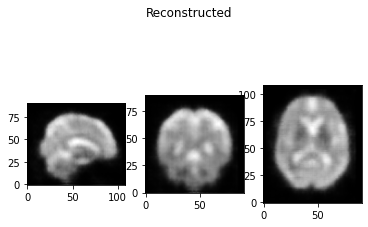

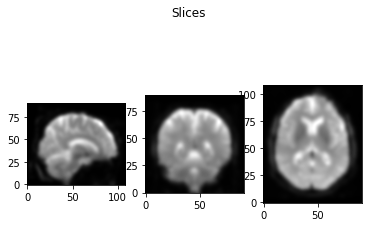

In [39]:
get_plot('Reconstructedmainimage_002_S_4225_2012-10-11.nii.gz.nii.gz', plot_name = 'Reconstructed')
get_plot_from_blue('mainimage_002_S_4225_2012-10-11.nii.gz', file_dir = 'CN')

# Evaluation

In [20]:
d_z = F.l1_loss(z_vectors, z_vectors_original, reduction='sum')
z_norm = F.l1_loss(z_vectors, torch.zeros_like(z_vectors), reduction='sum')
z_0_norm = F.l1_loss(z_vectors_original, torch.zeros_like(z_vectors_original), reduction='sum')
d_F = F.l1_loss(F_mat, F_mat_original, reduction='sum')
F_norm = F.l1_loss(F_mat, torch.zeros_like(F_mat), reduction='sum')
F_0_norm = F.l1_loss(F_mat_original, torch.zeros_like(F_mat_original), reduction='sum')
print(f'The l1 difference between z and z_0 is: {d_z}')
print(f'The l1 norm of z is: {z_norm}')
print(f'The l1 norm of z_0 is: {z_0_norm}')
print(f'The l1 difference between F and F_0 is: {d_F}')
print(f'The l1 norm of F is: {F_norm}')
print(f'The l1 norm of F_0 is: {F_0_norm}')

The l1 difference between z and z_0 is: 318.41729736328125
The l1 norm of z is: 0.6815992593765259
The l1 norm of z_0 is: 319.01409912109375
The l1 difference between F and F_0 is: 0.0
The l1 norm of F is: 55.27074432373047
The l1 norm of F_0 is: 55.27074432373047


In [37]:
F_mat = model.F.weight
num_ = 10
diff_F = torch.zeros(num_, num_)
for i in range(diff_F.shape[0]):
    for j in range(diff_F.shape[1]):
        diff_F[i,j]=F.l1_loss(F_mat[i], F_mat[j], reduction='sum')
print(diff_F)
diff_F_same_subject = []
for i in range(train_size//2):
    diff_F_same_subject.append(F.l1_loss(F_mat[2*i], F_mat[2*i+1], reduction='sum'))
print(diff_F_same_subject)
diff_F_diff_subject = []
for i in range(train_size//2-1):
    diff_F_diff_subject.append(F.l1_loss(F_mat[2*i+1], F_mat[2*i+2], reduction='sum'))
print(diff_F_diff_subject)

tensor([[0.0000, 3.0999, 2.2758, 1.6413, 1.8849, 1.9253, 2.6781, 1.6495, 1.8655,
         1.6382],
        [3.0999, 0.0000, 2.9542, 1.8592, 2.1670, 2.1598, 1.9798, 3.6034, 3.0996,
         2.5106],
        [2.2758, 2.9542, 0.0000, 2.2389, 2.9718, 3.0640, 3.1342, 1.5565, 1.5782,
         2.3256],
        [1.6413, 1.8592, 2.2389, 0.0000, 2.0787, 2.0933, 2.2422, 1.9931, 1.9074,
         2.1953],
        [1.8849, 2.1670, 2.9718, 2.0787, 0.0000, 1.6003, 1.4865, 2.0811, 3.0295,
         1.9177],
        [1.9253, 2.1598, 3.0640, 2.0933, 1.6003, 0.0000, 1.5283, 2.3870, 2.8332,
         1.6699],
        [2.6781, 1.9798, 3.1342, 2.2422, 1.4865, 1.5283, 0.0000, 2.8176, 2.6937,
         2.6007],
        [1.6495, 3.6034, 1.5565, 1.9931, 2.0811, 2.3870, 2.8176, 0.0000, 1.5824,
         1.9512],
        [1.8655, 3.0996, 1.5782, 1.9074, 3.0295, 2.8332, 2.6937, 1.5824, 0.0000,
         2.0952],
        [1.6382, 2.5106, 2.3256, 2.1953, 1.9177, 1.6699, 2.6007, 1.9512, 2.0952,
         0.0000]], grad_fn=<

IndexError: index 10 is out of bounds for dimension 0 with size 10

torch.Size([2, 10])
torch.Size([2, 10])
torch.Size([2, 10])
tensor(65.0186, grad_fn=<DistBackward0>)


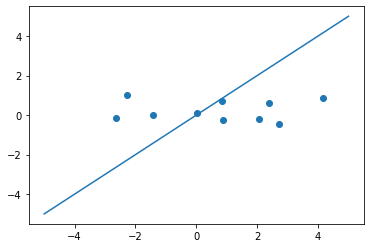

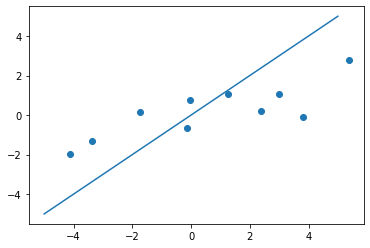

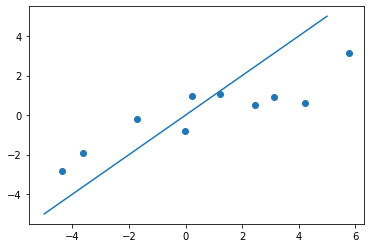

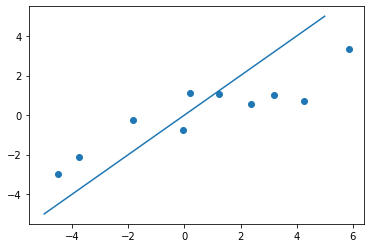

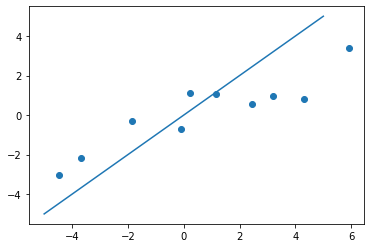

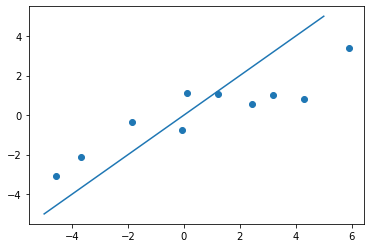

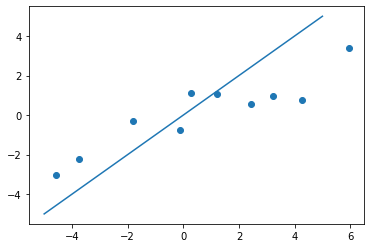

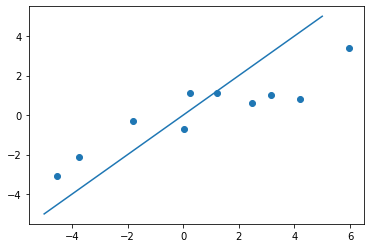

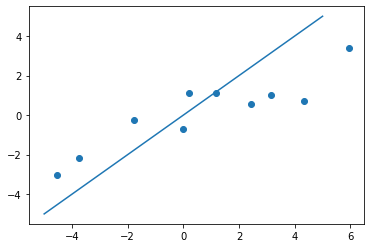

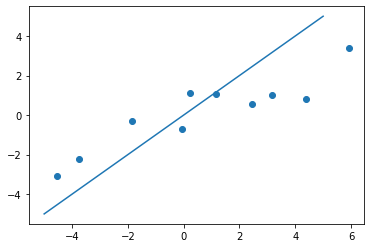

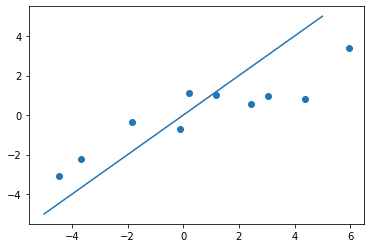

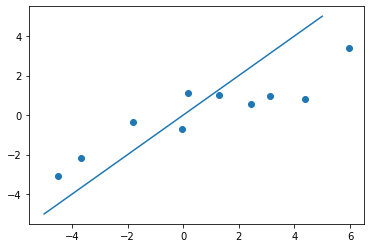

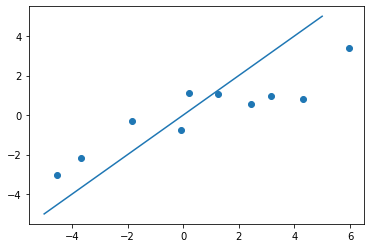

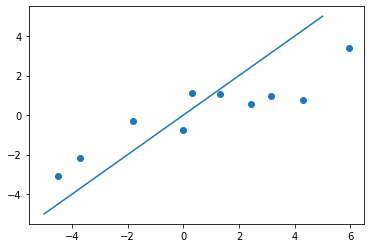

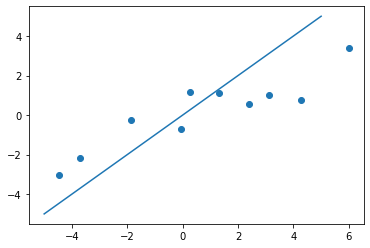

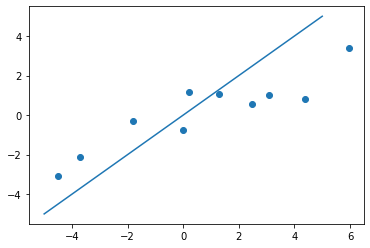

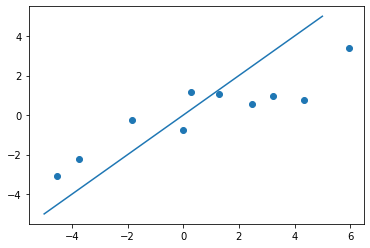

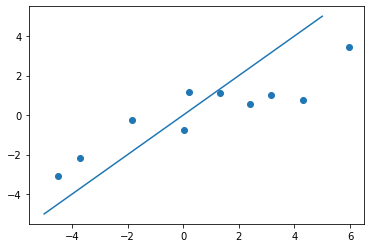

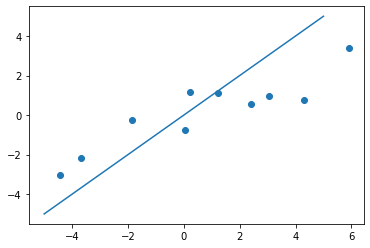

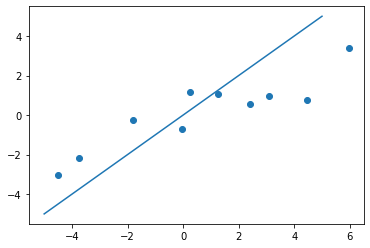

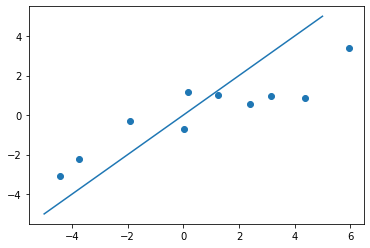

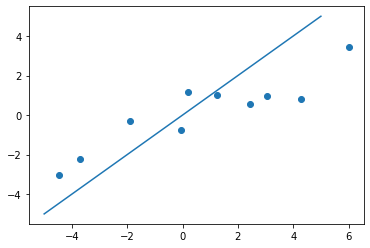

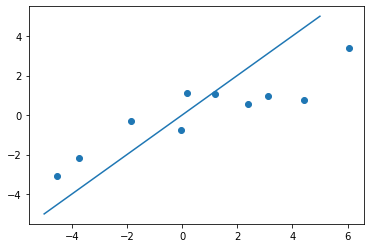

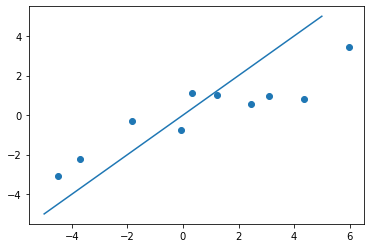

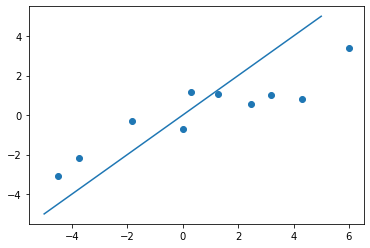

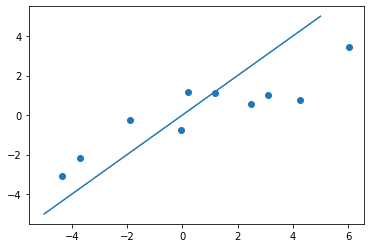

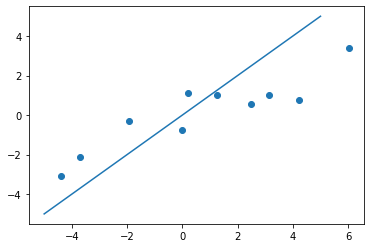

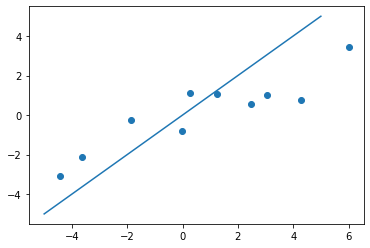

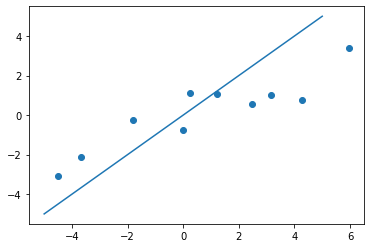

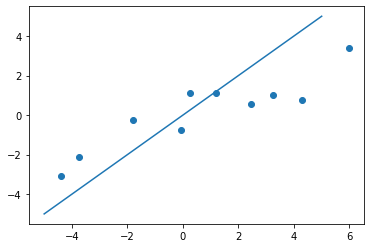

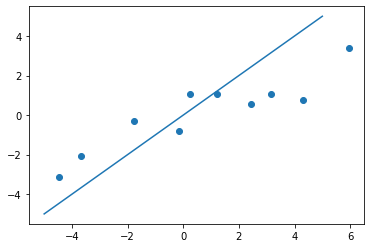

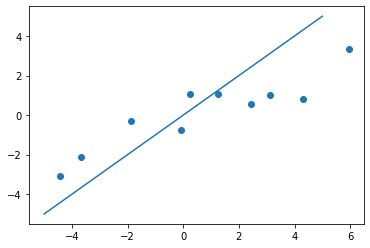

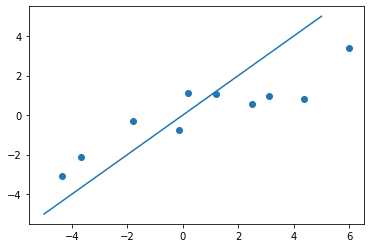

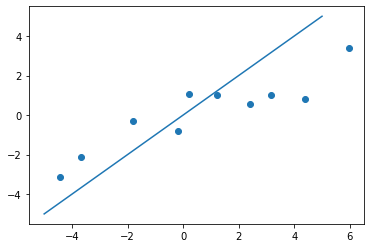

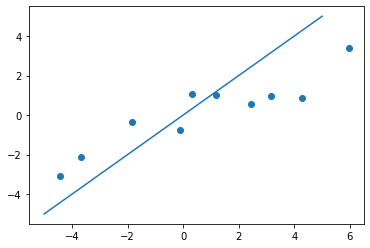

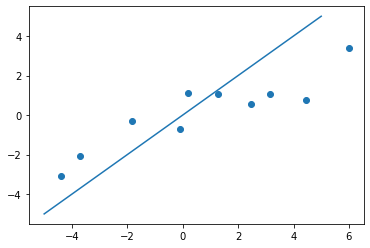

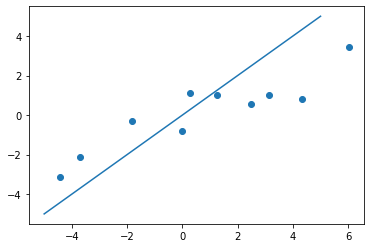

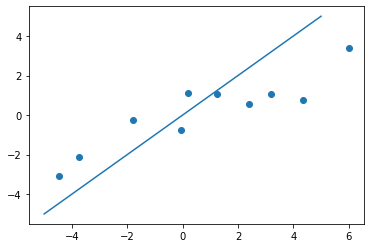

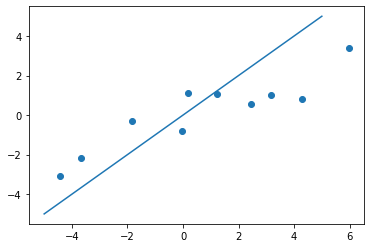

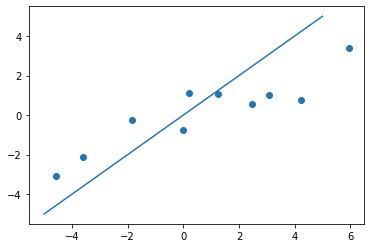

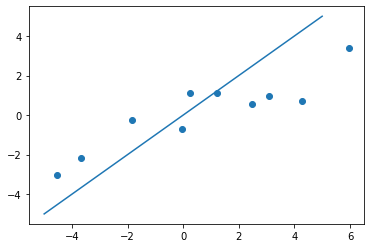

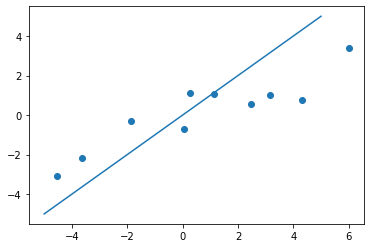

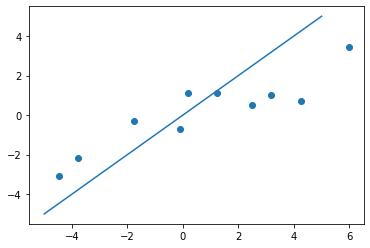

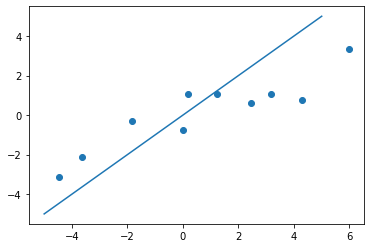

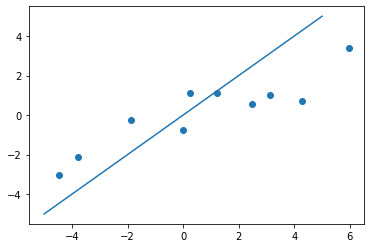

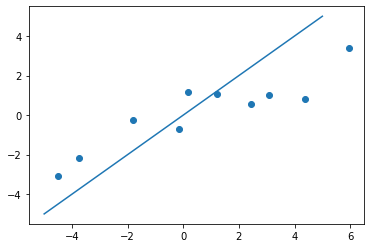

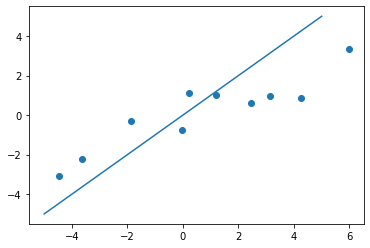

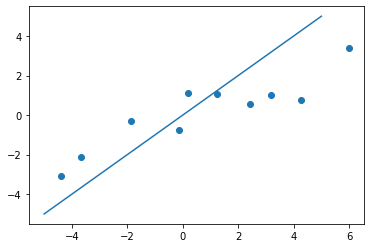

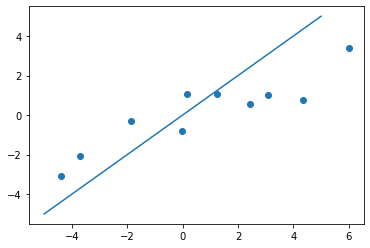

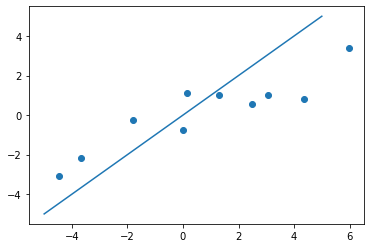

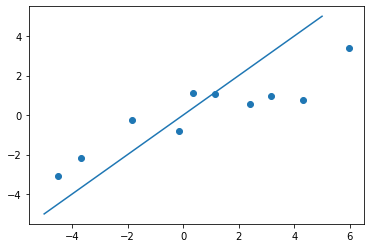

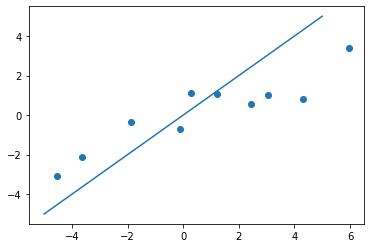

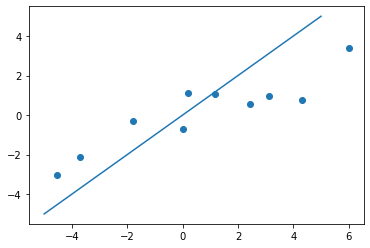

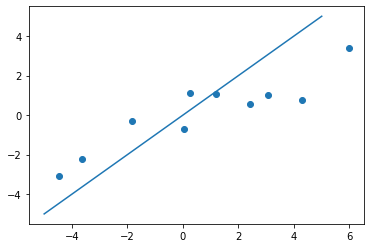

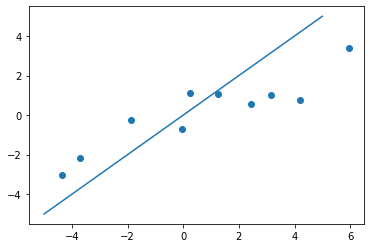

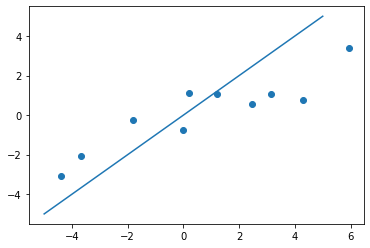

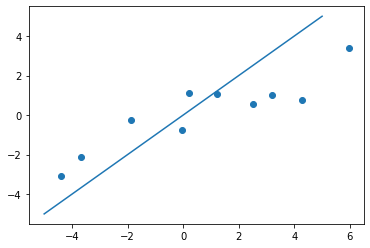

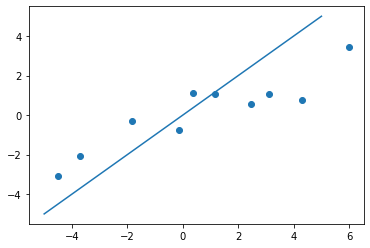

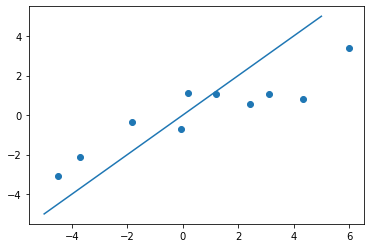

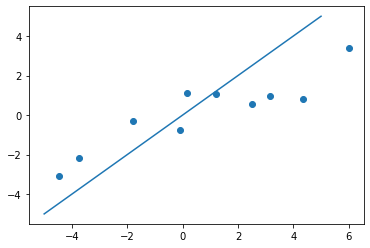

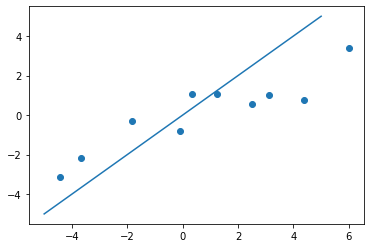

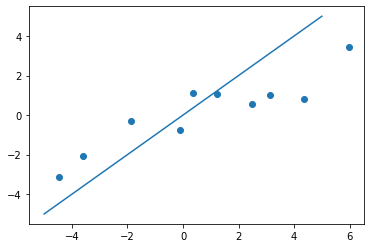

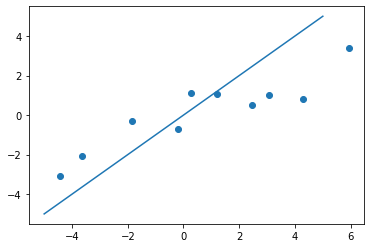

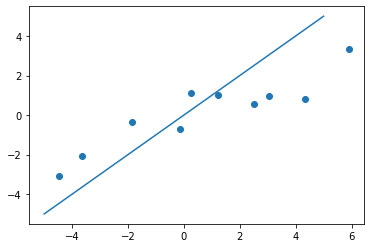

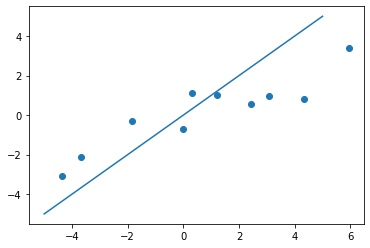

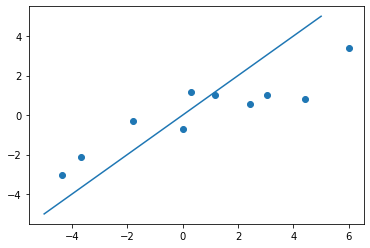

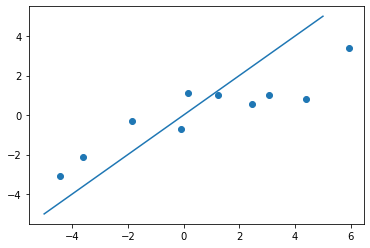

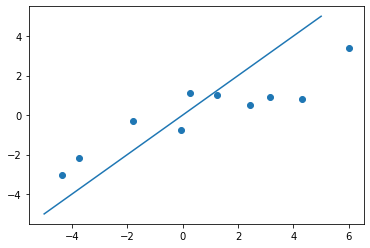

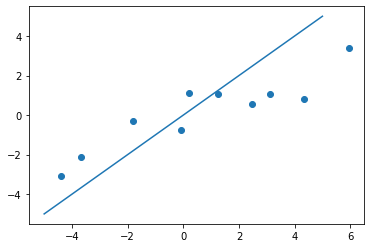

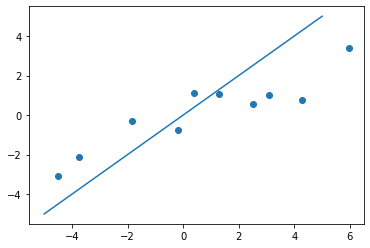

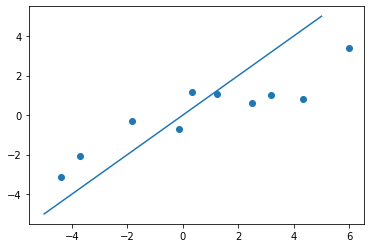

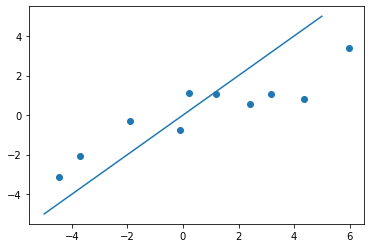

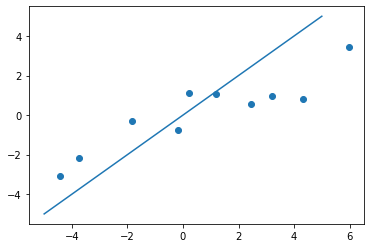

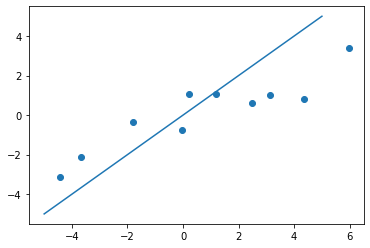

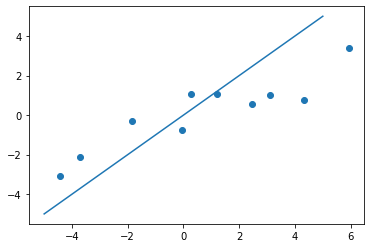

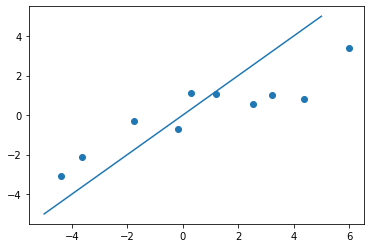

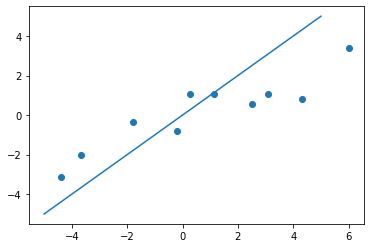

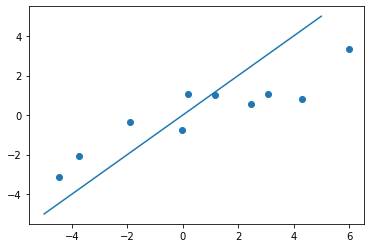

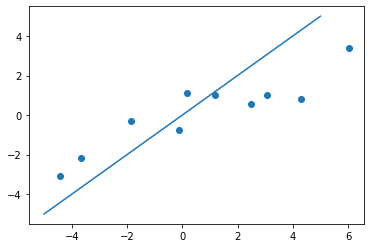

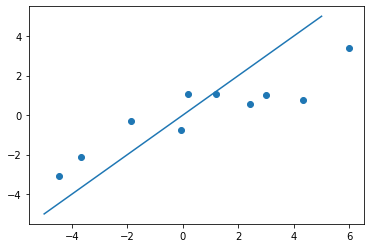

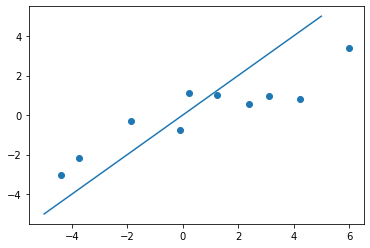

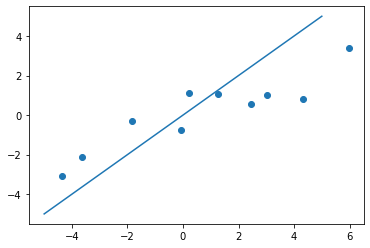

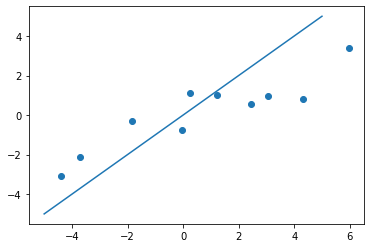

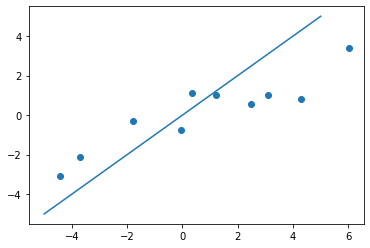

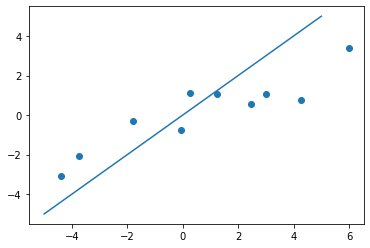

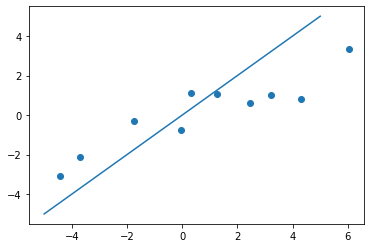

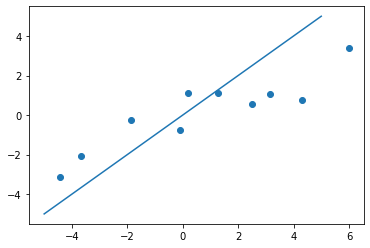

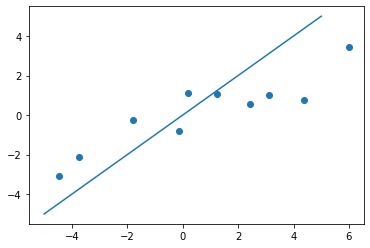

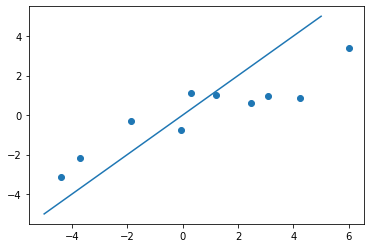

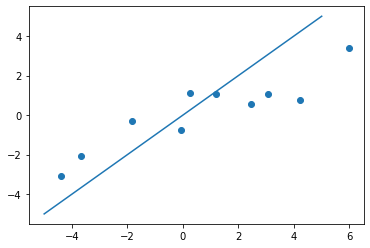

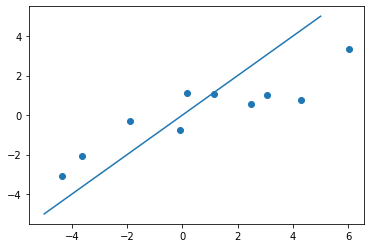

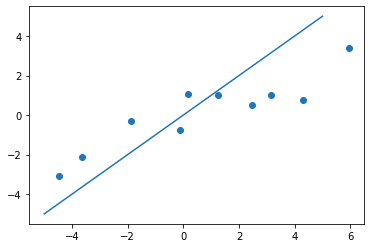

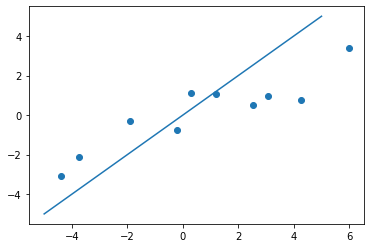

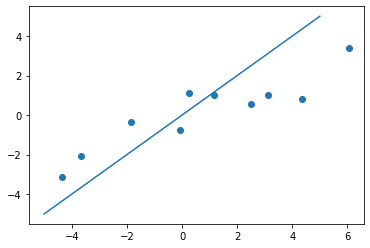

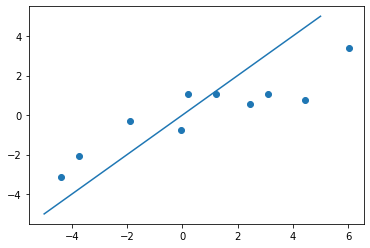

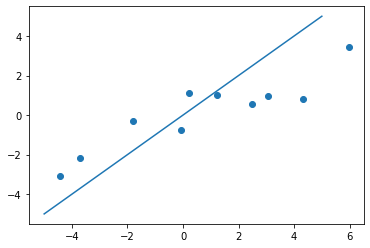

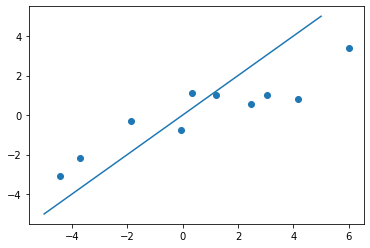

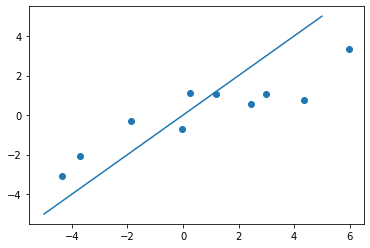

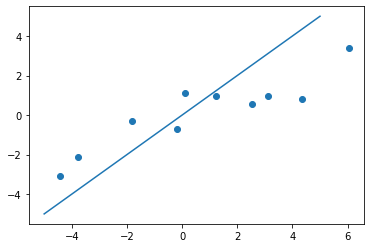

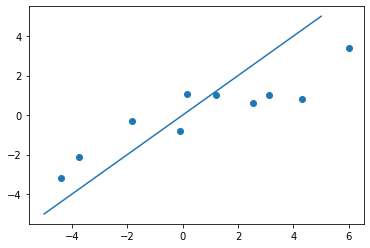

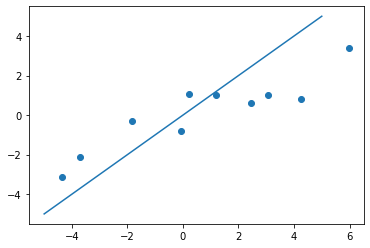

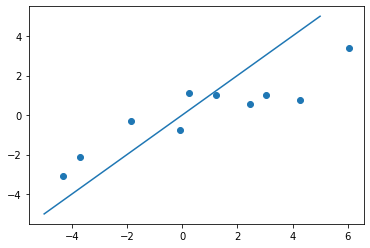

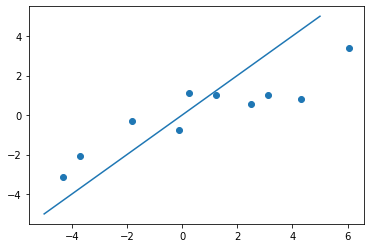

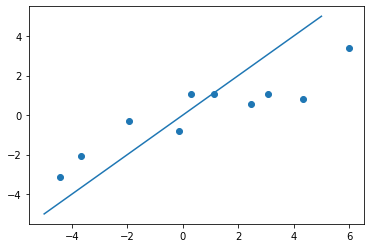

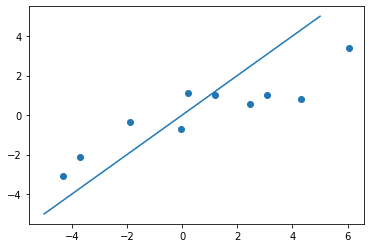

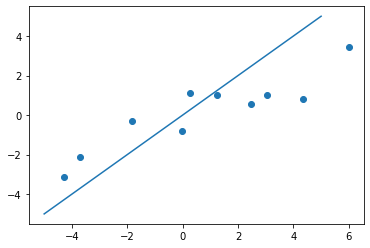

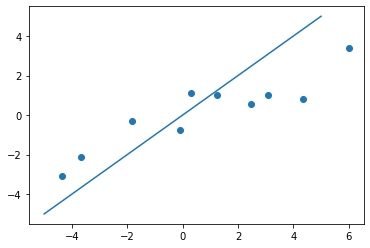

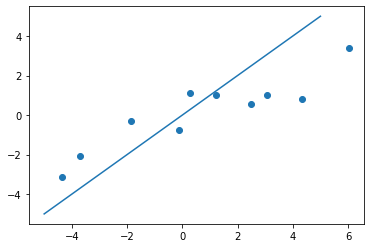

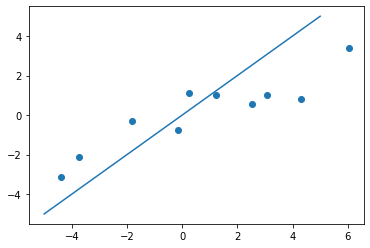

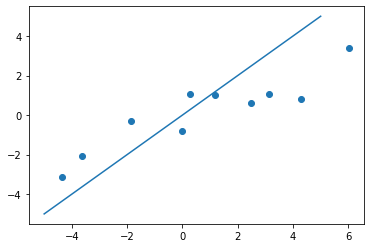

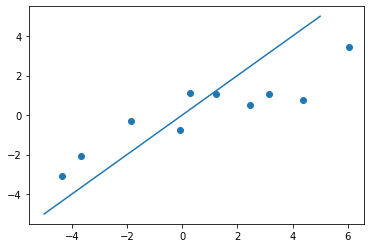

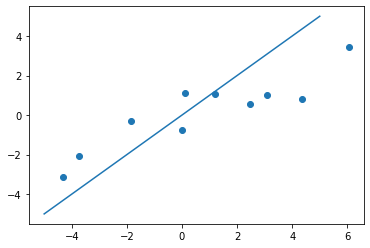

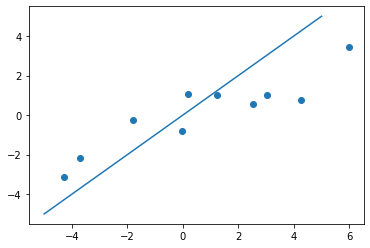

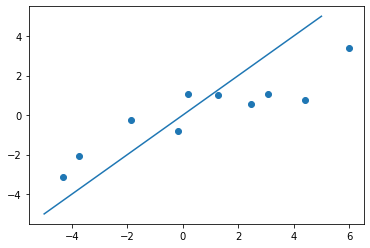

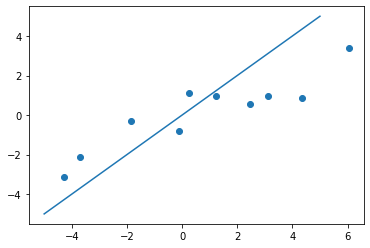

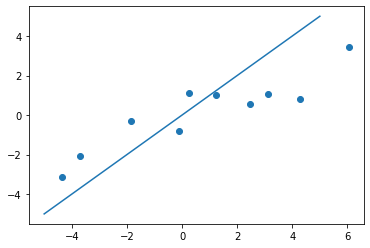

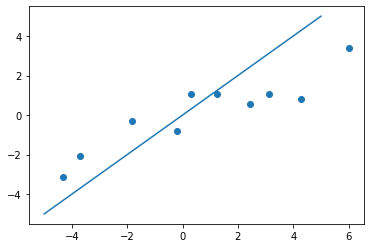

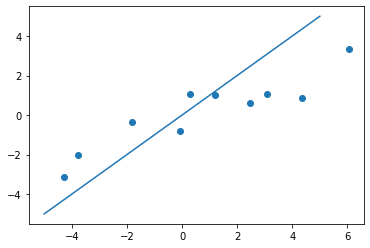

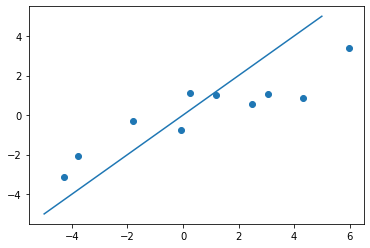

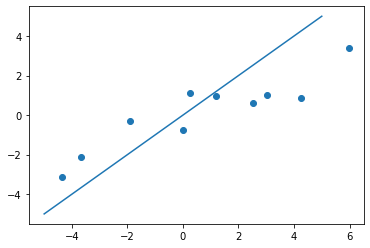

In [42]:
index_for_plot = 0
h_history = history['h_history']
print(h_history[0].shape)
print(h_history[1].shape)
h1_all = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
h1 = h1_all[index_for_plot]
h_history.pop(-1)
h_history.insert(0, h0.expand(2, -1)) # The size of expanded h0 needs to be adjusted (num_train mod batch_size)
#h_history.insert(0, h0.expand(batch_size, -1))
print(h_history[0].shape)
h2_all = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
h2 = h2_all[index_for_plot]

# index_for_plot = 1
# h1 = h1_all[index_for_plot]
# h2 = h2_all[index_for_plot]

h2 = model.F(h2)
#h2 = torch.mm(h2, F_mat)

print(torch.dist(h1, h2))
for i in range(120):
    plt.plot([-5,5],[-5,5])
    plt.scatter(h1[i].cpu().detach().numpy(),h2[i].cpu().detach().numpy())
    plt.show()

tensor(96.7866, grad_fn=<DistBackward0>)


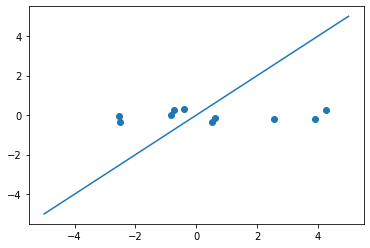

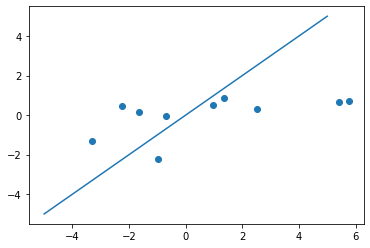

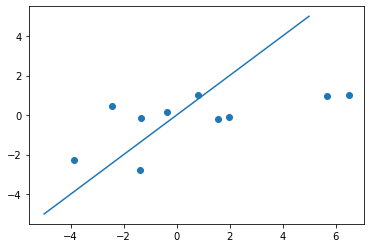

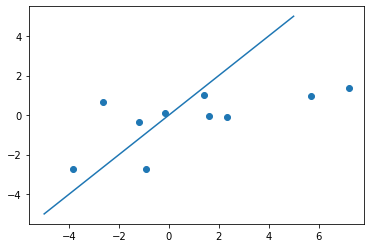

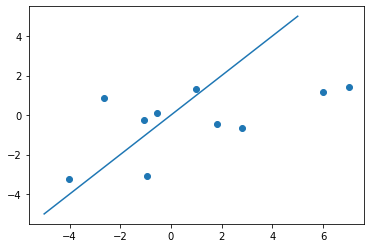

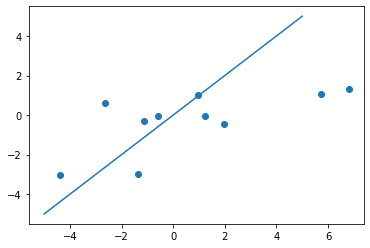

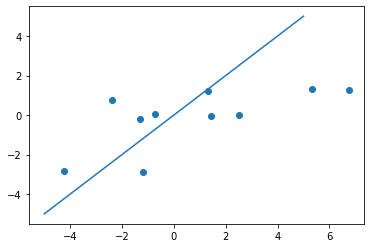

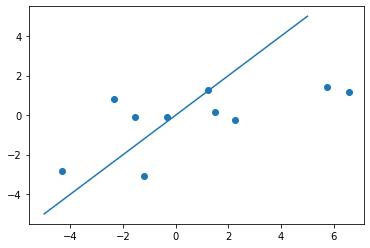

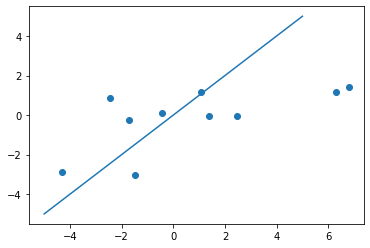

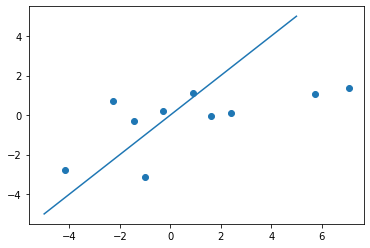

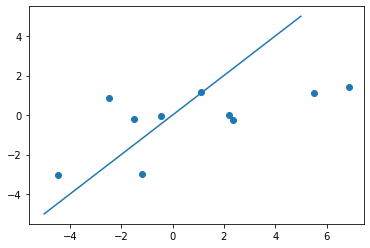

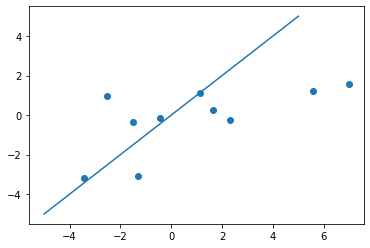

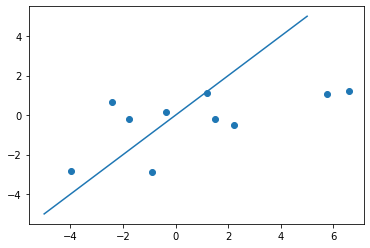

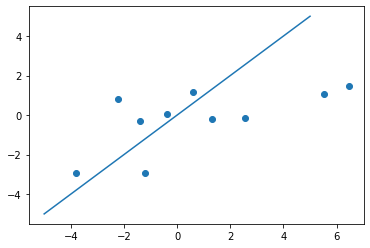

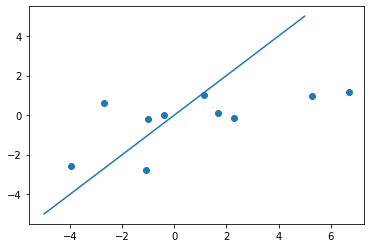

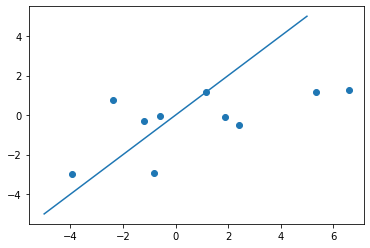

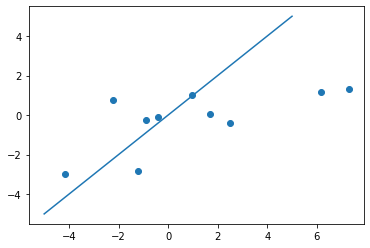

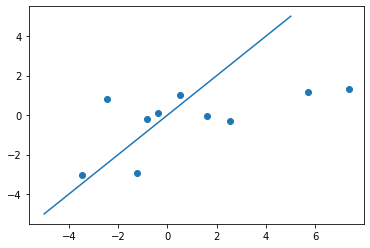

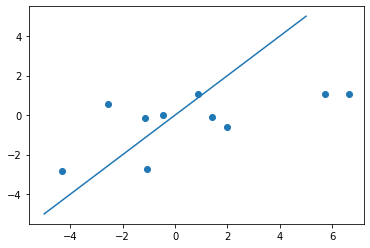

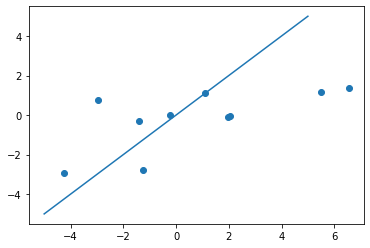

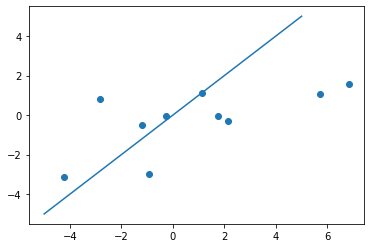

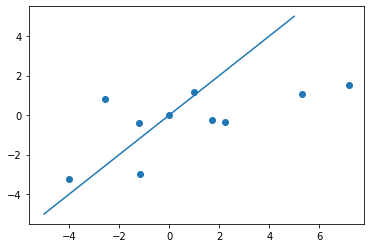

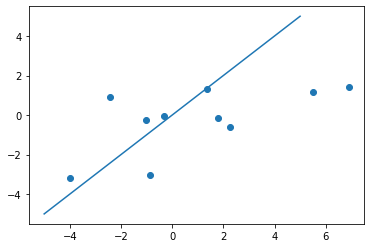

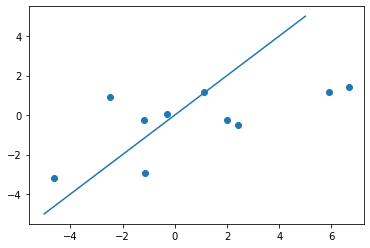

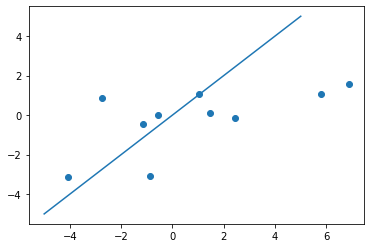

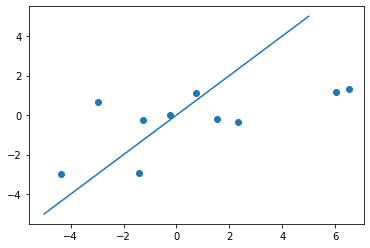

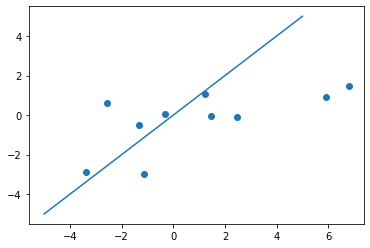

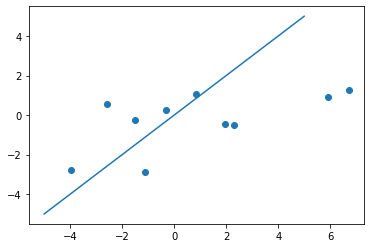

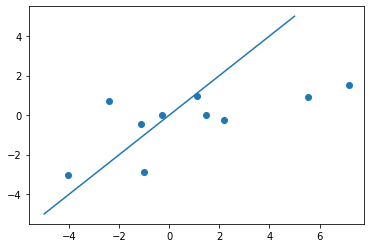

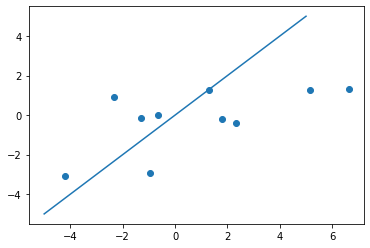

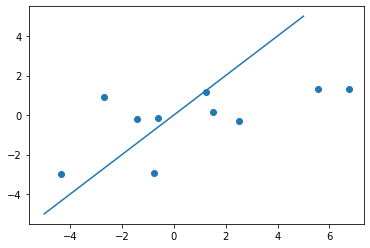

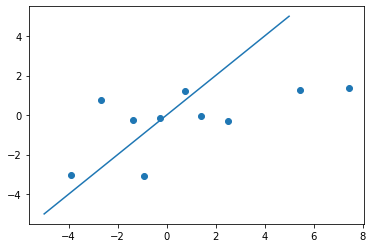

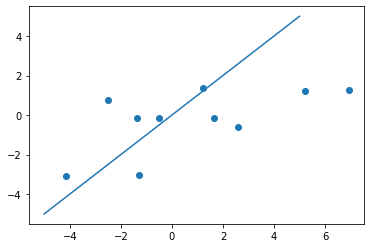

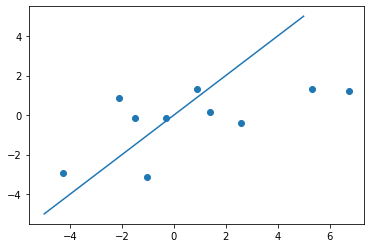

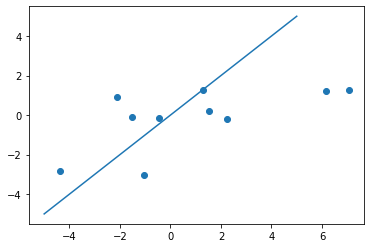

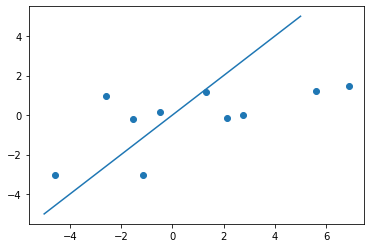

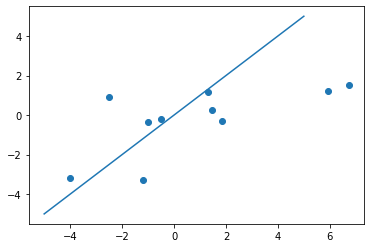

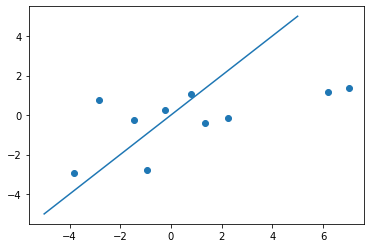

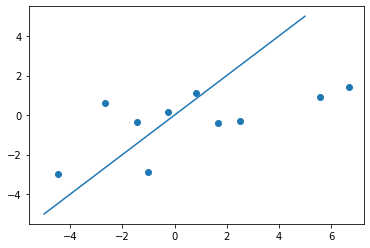

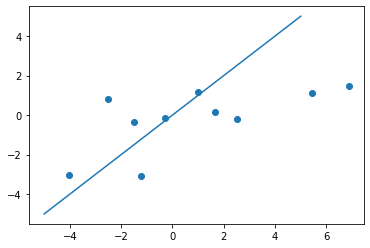

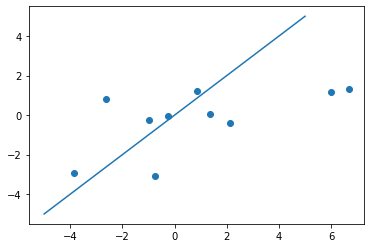

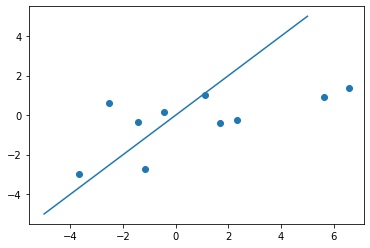

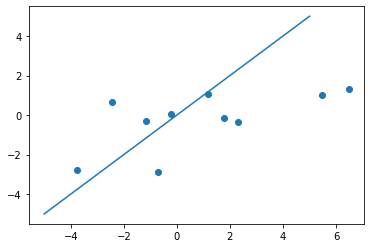

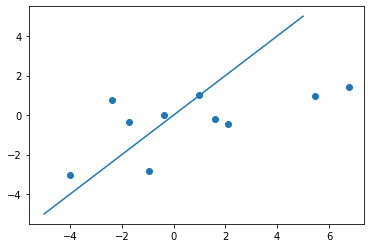

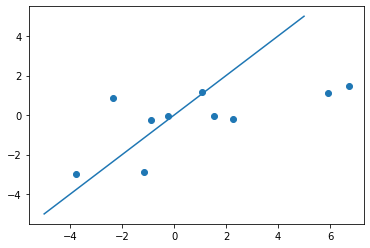

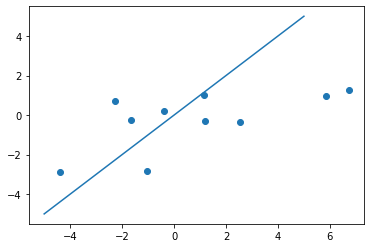

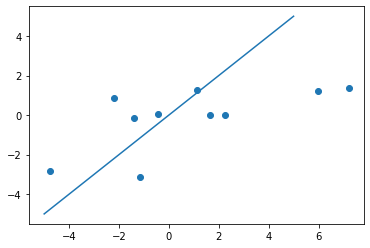

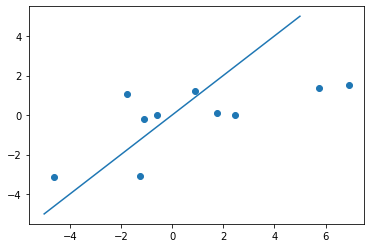

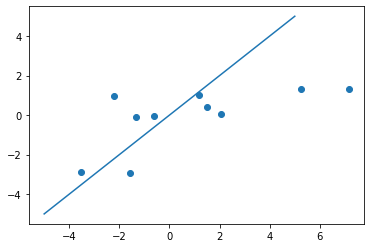

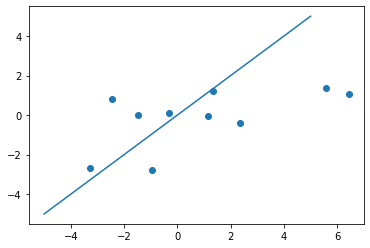

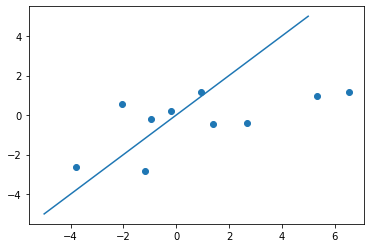

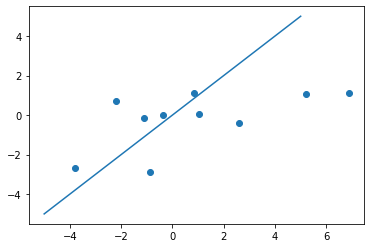

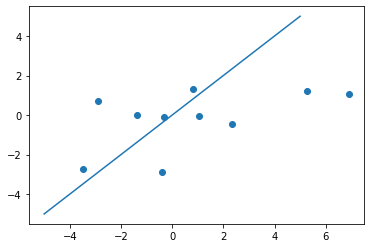

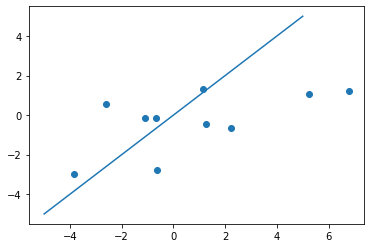

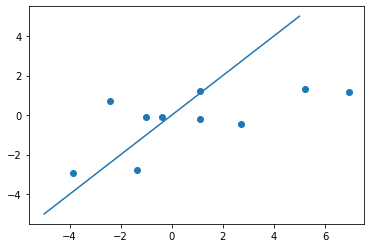

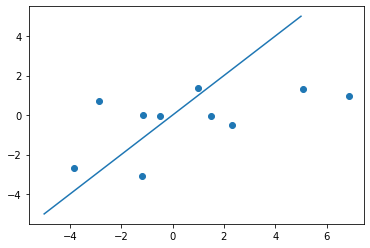

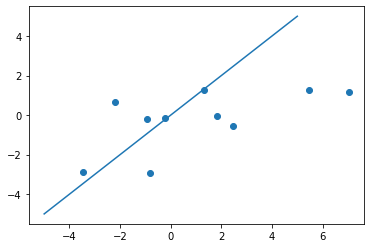

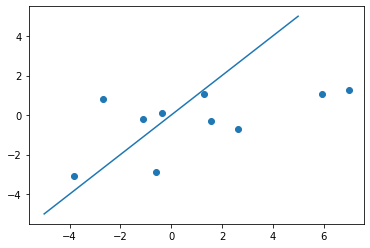

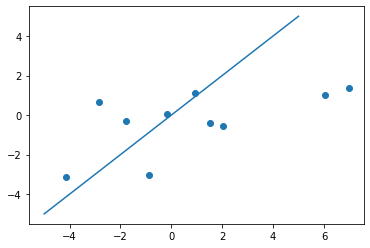

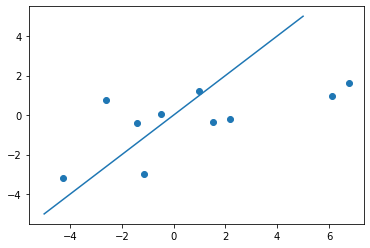

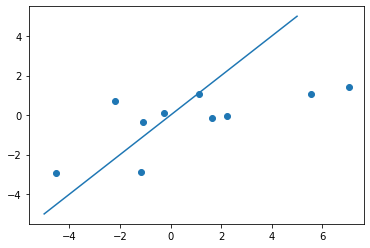

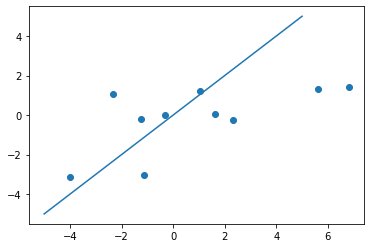

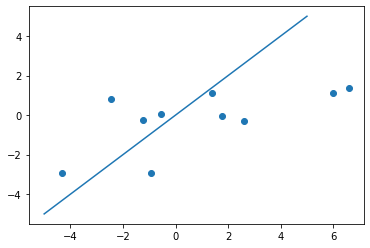

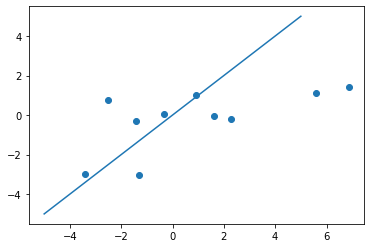

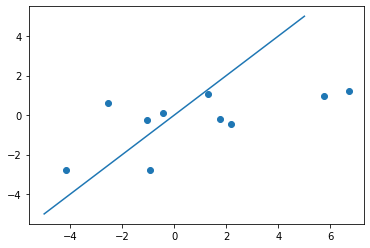

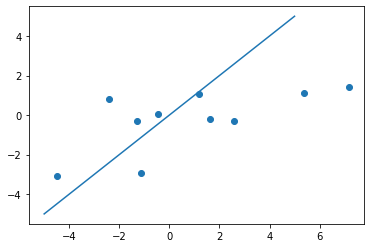

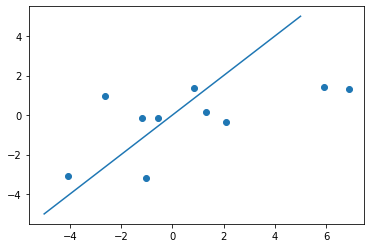

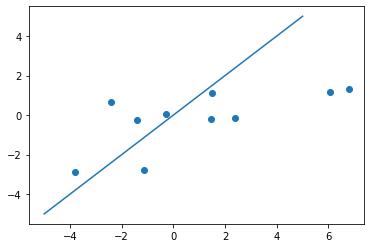

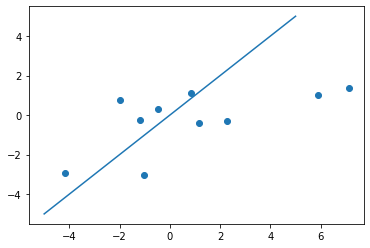

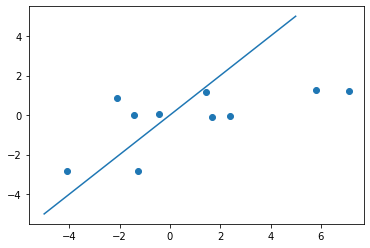

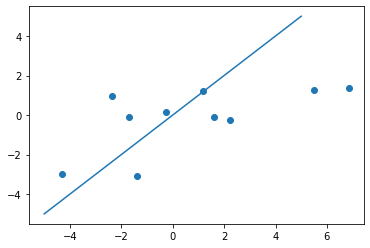

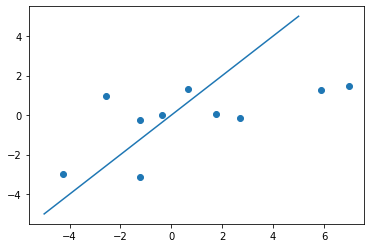

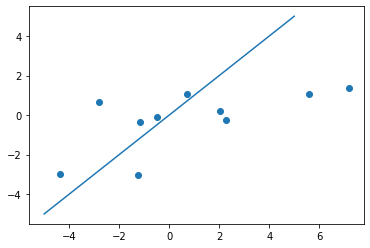

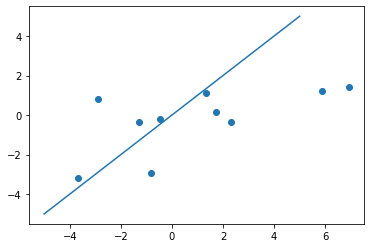

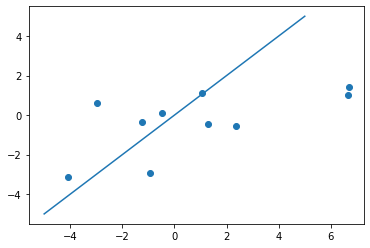

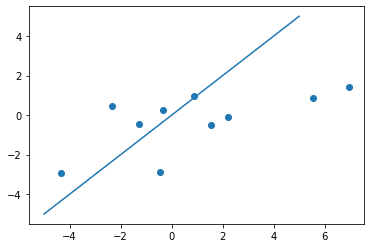

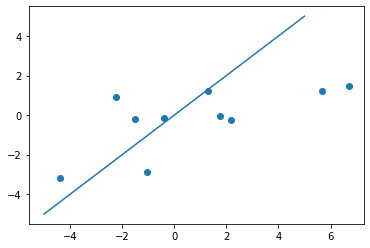

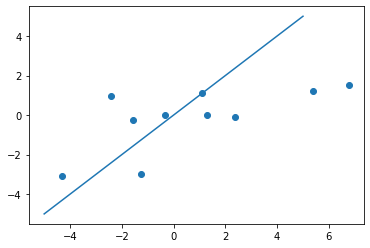

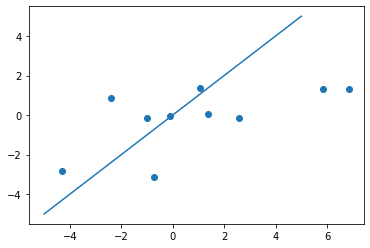

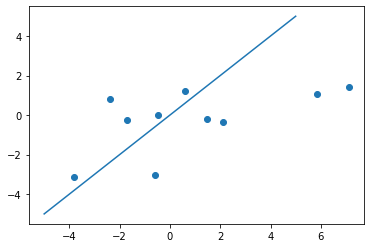

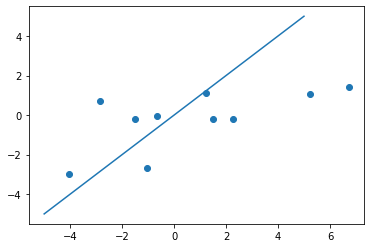

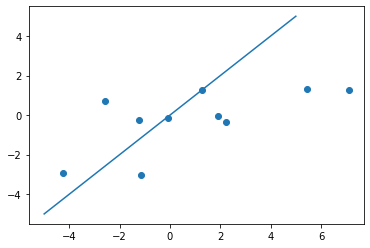

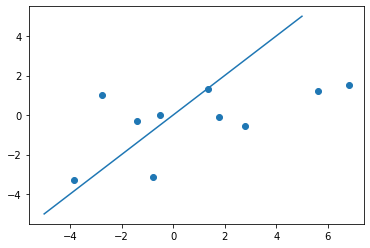

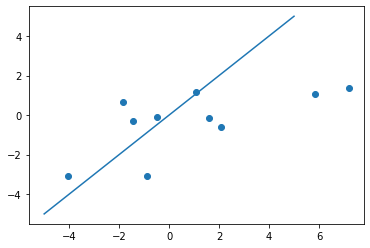

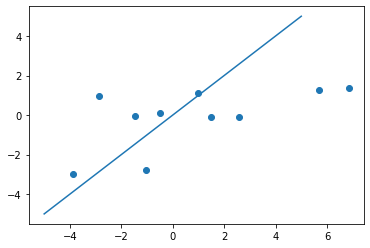

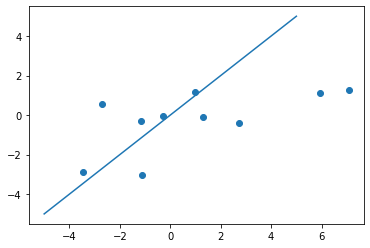

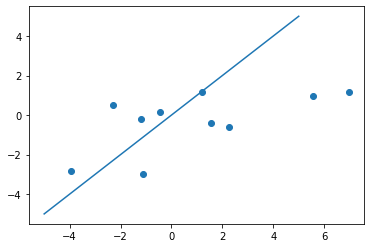

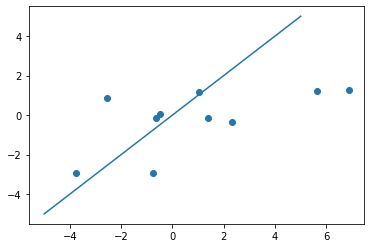

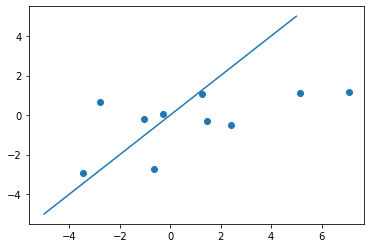

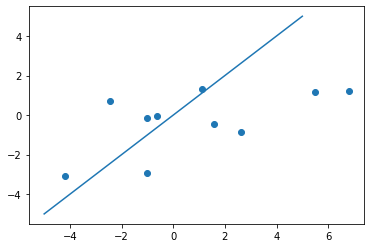

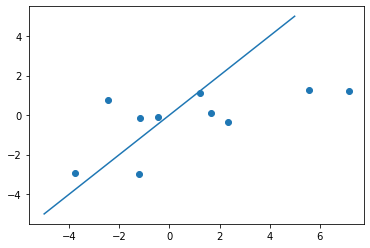

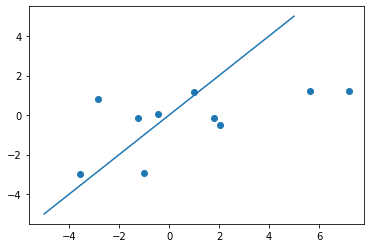

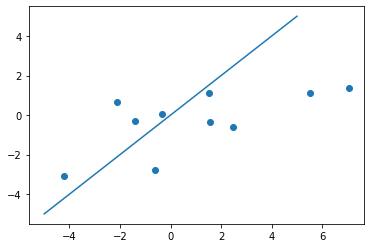

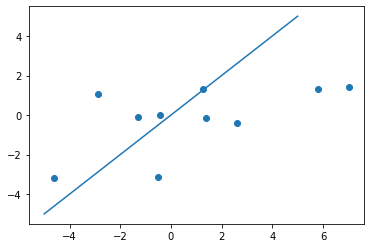

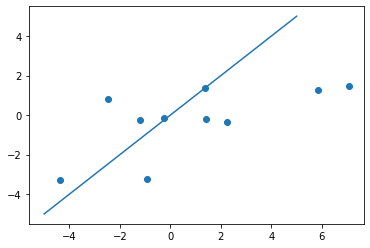

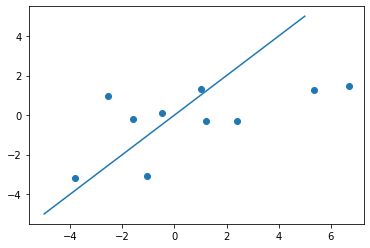

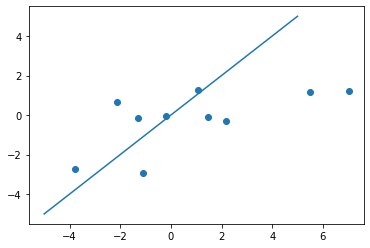

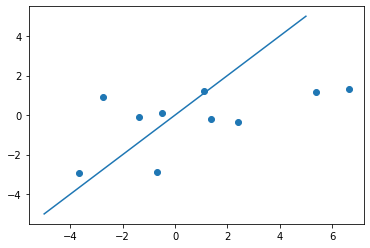

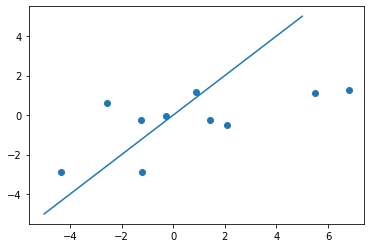

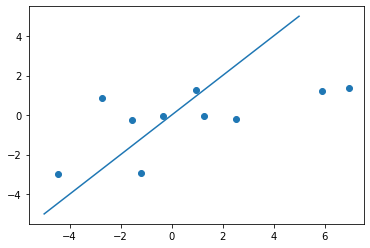

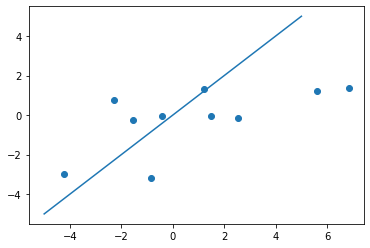

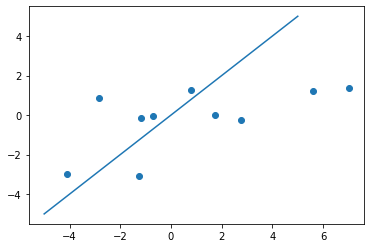

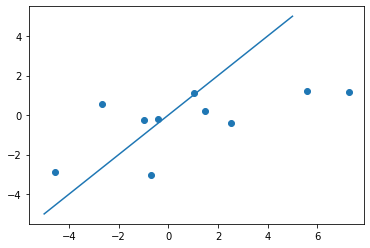

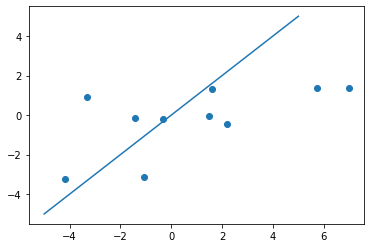

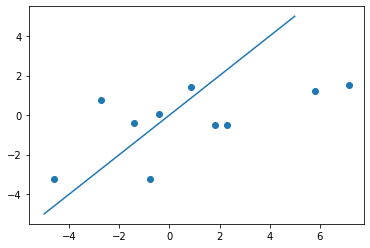

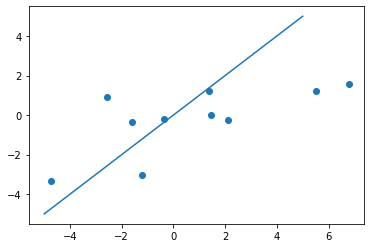

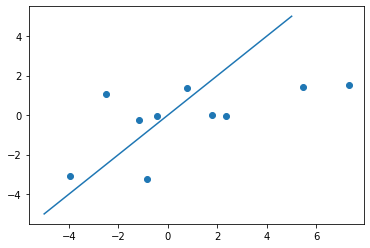

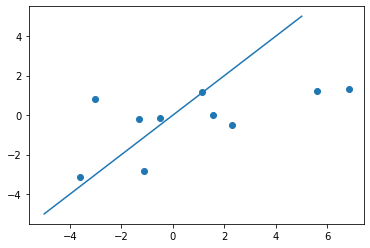

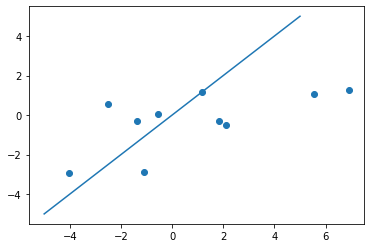

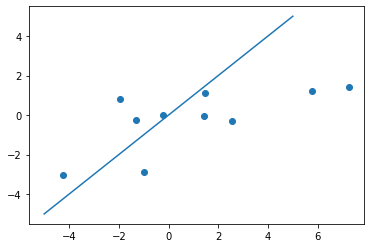

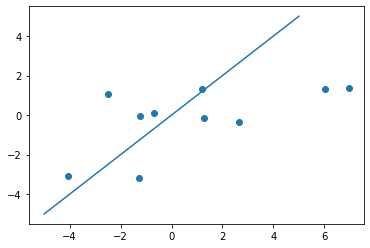

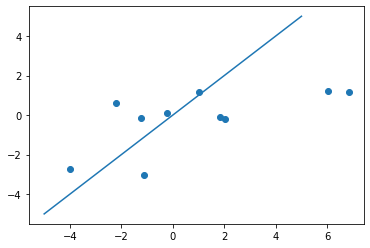

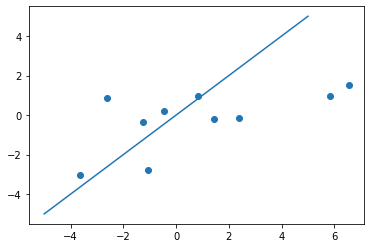

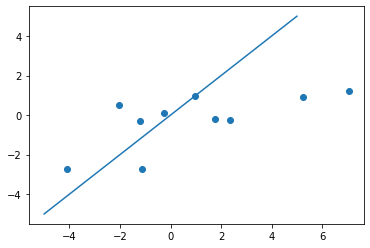

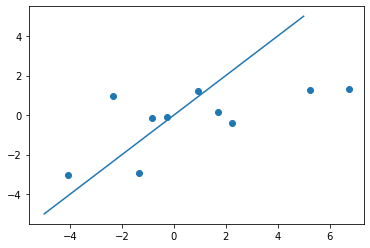

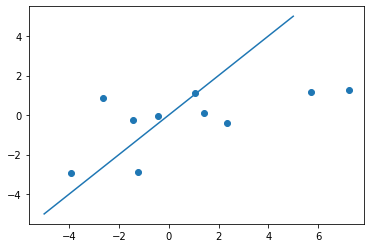

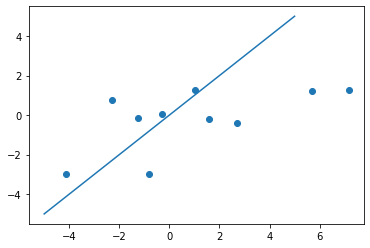

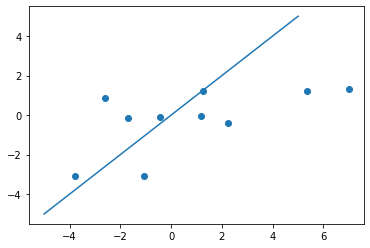

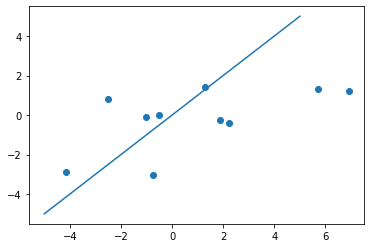

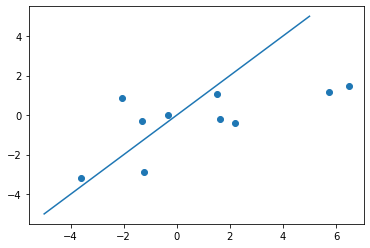

In [15]:
for batch, batch_index in train_loader:
    h_0 = h0.expand(batch.size(0), -1) # h0: 1 x latent_dim, h_0: batch_size x latent_dim
    which_ones = IDs[batch_index.to(int)]
    x, mu_his, h_his, gh_his = model(batch, h0.expand(batch.size(0), -1), which_ones)

    

index_for_plot = 0
h_all = torch.stack(h_his).transpose(0,1) # output: batch_size x tol_time x latent_dim
h = h_all[index_for_plot]

gh_all = torch.stack(gh_his).transpose(0,1) # output: batch_size x tol_time x latent_dim
gh = gh_all[index_for_plot]


print(torch.dist(h, gh))
for i in range(120):
    plt.plot([-5,5],[-5,5])
    plt.scatter(h[i].cpu().detach().numpy(),gh[i].cpu().detach().numpy())
    plt.show()

In [38]:
index_for_plot = 0
h_history = history['h_history']
print(h_history[0].shape)
print(h_history[1].shape)
h1_all = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
h1 = h1_all[index_for_plot]
h_history.pop(-1)
h_history.insert(0, h0.expand(2, -1)) # The size of expanded h0 needs to be adjusted (num_train mod batch_size)
#h_history.insert(0, h0.expand(batch_size, -1))
print(h_history[0].shape)
h2_all = torch.stack(h_history).transpose(0,1) # output: batch_size x tol_time x latent_dim
h2 = h2_all[index_for_plot]

# index_for_plot = 1
# h1 = h1_all[index_for_plot]
# h2 = h2_all[index_for_plot]

h2 = model.F(h2)
#h2 = torch.mm(h2, F_mat)

print(torch.dist(h1, h2))
for i in range(120):
    plt.plot([-5,5],[-5,5])
    plt.scatter(h1[i].cpu().detach().numpy(),h2[i].cpu().detach().numpy())
    plt.show()

Parameter containing:
tensor([[ 0.0502, -0.1544,  0.0090,  0.1795,  0.0028, -0.0952,  0.3122,  0.2974,
          0.0027,  0.0741],
        [-0.0753,  0.3236, -0.3446, -0.2651,  0.1101,  0.1307, -0.3006, -0.0774,
         -0.1338, -0.1669],
        [ 0.0773, -0.2020,  0.3404,  0.0669,  0.3373,  0.2675, -0.2668,  0.1115,
          0.1996,  0.1720],
        [ 0.2505, -0.1271, -0.2926,  0.0053,  0.0104,  0.0067, -0.0917,  0.0347,
         -0.0700, -0.0151],
        [-0.0870, -0.0312,  0.1729, -0.2432, -0.1683, -0.0145,  0.2609,  0.0689,
         -0.1334, -0.2961],
        [-0.2953,  0.1334, -0.1276, -0.0783, -0.1746,  0.2258,  0.1968,  0.2780,
         -0.0775, -0.1100],
        [-0.1031,  0.0122, -0.0532, -0.1386, -0.2878,  0.3150,  0.0637, -0.2395,
         -0.1968, -0.2180],
        [ 0.1756, -0.2598,  0.2684,  0.0493, -0.1792,  0.0562,  0.1503,  0.1679,
          0.2785,  0.2026],
        [ 0.2607, -0.2200, -0.0139,  0.2994,  0.1993,  0.2300,  0.1078, -0.0751,
          0.2067,  0.2182